<a href="https://colab.research.google.com/github/184467gianluca/wak_report/blob/main/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- Standard Data Science Libraries ---
import xarray as xr
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import glob

from scipy import stats
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
import sys

!pip install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# --- Google Colab Specific ---
from google.colab import drive

In [ ]:
# Mount your Google Drive
drive.mount('/content/drive')

# --- Define the path to your data ---
# This path points directly to the folder in your "My Drive".
base_data_directory = '/content/drive/MyDrive/selected_CMIP6_files/'

# --- Verify the path exists ---
if not os.path.isdir(base_data_directory):
    print(f"FEHLER: Das Basisverzeichnis '{base_data_directory}' wurde NICHT gefunden.")
    print("Bitte stelle sicher:")
    print("  1. Google Drive wurde korrekt eingebunden (Schritt 1 ausgeführt).")
    print("  2. Der Pfad zu 'selected_CMIP6_files' ist EXAKT korrekt (Groß-/Kleinschreibung, Leerzeichen etc.).")
    print("  3. Der Ordner 'selected_CMIP6_files' liegt direkt in deinem 'Meine Ablage' oder die Verknüpfung ist korrekt.")
    # Exit oder weitere Fehlermeldung, da ohne Basisverzeichnis nichts geladen werden kann
    raise FileNotFoundError(f"Basisverzeichnis nicht gefunden: {base_data_directory}")
else:
    print(f"Basisverzeichnis gefunden: {base_data_directory}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Basisverzeichnis gefunden: /content/drive/MyDrive/selected_CMIP6_files/


In [ ]:
# --- 1. Experiment: ssp370SST ---
experiment_name_ssp370SST = 'ssp370SST'
experiment_directory_ssp370SST = os.path.join(base_data_directory, experiment_name_ssp370SST)
file_pattern_ssp370SST = os.path.join(experiment_directory_ssp370SST, '*.nc')

# ... (Deine Print- und Prüf-Statements bleiben wie sie sind) ...

if not os.path.isdir(experiment_directory_ssp370SST):
    print(f"WARNUNG: Experiment-Verzeichnis '{experiment_directory_ssp370SST}' wurde NICHT gefunden. Überspringe dieses Experiment.")
    ds_ssp370SST = None
else:
    files_ssp370SST = glob.glob(file_pattern_ssp370SST)
    files_ssp370SST.sort()

    if not files_ssp370SST:
        print(f"WARNUNG: Keine .nc-Dateien im Verzeichnis '{experiment_directory_ssp370SST}' gefunden.")
        ds_ssp370SST = None
    else:
        # HIER IST DIE WICHTIGE ÄNDERUNG: engine='h5netcdf'
        try:
            ds_ssp370SST = xr.open_mfdataset(files_ssp370SST, combine='by_coords', engine='h5netcdf', parallel=True)
            print(f"Dataset für {experiment_name_ssp370SST} erfolgreich geladen:")
            print(ds_ssp370SST)
            if 'lwp' in ds_ssp370SST.variables and 'time' in ds_ssp370SST.dims and 'lat' in ds_ssp370SST.dims and 'lon' in ds_ssp370SST.dims:
                print("\nErste Werte der Variablen 'lwp' für ssp370SST:")
                print(ds_ssp370SST['lwp'].isel(time=0, lat=0, lon=0).values)
            else:
                print("Warnung: Variable 'lwp' oder notwendige Dimensionen (time, lat, lon) nicht im ssp370SST Dataset gefunden.")
        except Exception as e:
            print(f"FEHLER beim Laden des Datasets für {experiment_name_ssp370SST}: {e}")
            ds_ssp370SST = None


# --- 2. Experiment: ssp370SST-lowAer ---
experiment_name_ssp370SST_lowAer = 'ssp370SST-lowAer'
experiment_directory_ssp370SST_lowAer = os.path.join(base_data_directory, experiment_name_ssp370SST_lowAer)
file_pattern_ssp370SST_lowAer = os.path.join(experiment_directory_ssp370SST_lowAer, '*.nc')

# ... (Deine Print- und Prüf-Statements bleiben wie sie sind) ...

if not os.path.isdir(experiment_directory_ssp370SST_lowAer):
    print(f"WARNUNG: Experiment-Verzeichnis '{experiment_directory_ssp370SST_lowAer}' wurde NICHT gefunden. Überspringe dieses Experiment.")
    ds_ssp370SST_lowAer = None
else:
    files_ssp370SST_lowAer = glob.glob(file_pattern_ssp370SST_lowAer)
    files_ssp370SST_lowAer.sort()

    if not files_ssp370SST_lowAer:
        print(f"WARNUNG: Keine .nc-Dateien im Verzeichnis '{experiment_directory_ssp370SST_lowAer}' gefunden.")
        ds_ssp370SST_lowAer = None
    else:
        # HIER IST DIE WICHTIGE ÄNDERUNG: engine='h5netcdf'
        try:
            ds_ssp370SST_lowAer = xr.open_mfdataset(files_ssp370SST_lowAer, combine='by_coords', engine='h5netcdf', parallel=True)
            print(f"\nDataset für {experiment_name_ssp370SST_lowAer} erfolgreich geladen:")
            print(ds_ssp370SST_lowAer)
            if 'lwp' in ds_ssp370SST_lowAer.variables and 'time' in ds_ssp370SST_lowAer.dims and 'lat' in ds_ssp370SST_lowAer.dims and 'lon' in ds_ssp370SST_lowAer.dims:
                print("\nErste Werte der Variablen 'lwp' für ssp370SST-lowAer:")
                print(ds_ssp370SST_lowAer['lwp'].isel(time=0, lat=0, lon=0).values)
            else:
                print("Warnung: Variable 'lwp' oder notwendige Dimensionen (time, lat, lon) nicht im ssp370SST-lowAer Dataset gefunden.")
        except Exception as e:
            print(f"FEHLER beim Laden des Datasets für {experiment_name_ssp370SST_lowAer}: {e}")
            ds_ssp370SST_lowAer = None


Dataset für ssp370SST erfolgreich geladen:
<xarray.Dataset> Size: 254MB
Dimensions:     (time: 492, bnds: 2, lon: 192, lat: 96)
Coordinates:
  * time        (time) datetime64[ns] 4kB 2015-01-16T12:00:00 ... 2055-12-16T...
  * lon         (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * lat         (lat) float64 768B -88.57 -86.72 -84.86 ... 84.86 86.72 88.57
Dimensions without coordinates: bnds
Data variables:
    time_bnds   (time, bnds) datetime64[ns] 8kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    lon_bnds    (lon, bnds) float64 3kB dask.array<chunksize=(192, 2), meta=np.ndarray>
    lat_bnds    (lat, bnds) float64 2kB dask.array<chunksize=(96, 2), meta=np.ndarray>
    bldep       (time, lat, lon) float32 36MB dask.array<chunksize=(1, 96, 192), meta=np.ndarray>
    ccn         (time, lat, lon) float32 36MB dask.array<chunksize=(1, 96, 192), meta=np.ndarray>
    clt         (time, lat, lon) float32 36MB dask.array<chunksize=(1, 96, 192), meta=np.ndarray>
    cod

In [ ]:
# --- DETAILED LOADING DEBUG CELL ---

print("--- Attempting to load datasets with detailed error reporting ---")

# Check the first experiment
if 'files_ssp370SST' in locals() and files_ssp370SST:
    print("\nAttempting to load ssp370SST...")
    try:
        # Try to open multiple files
        test_ds_sst = xr.open_mfdataset(files_ssp370SST, combine='by_coords', engine='h5netcdf', parallel=True)
        print("-> SUCCESS: ssp370SST multi-file dataset loaded.")
    except Exception as e:
        print("\n--> ERROR loading multiple files for ssp370SST. The specific error is:")
        print(f"    {e}")

        print("\n--> Trying to load just the FIRST file to isolate the problem...")
        try:
            # Try to open just a single file
            test_single_file = xr.open_dataset(files_ssp370SST[0], engine='h5netcdf')
            print("    -> SUCCESS: The first file loaded correctly on its own.")
            print("    -> LIKELY CAUSE: The .nc files have inconsistent coordinates or dimensions, which prevents merging.")
        except Exception as e_single:
            print("\n    --> ERROR: Failed to load even a single file. The specific error is:")
            print(f"        {e_single}")

else:
    print("\n'files_ssp370SST' variable not found. Make sure Cell 3 ran.")

--- Attempting to load datasets with detailed error reporting ---

Attempting to load ssp370SST...
-> SUCCESS: ssp370SST multi-file dataset loaded.


In [ ]:
# --- Zugriff auf LWP- und CCN-Daten für beide Experimente ---
print("\n" + "="*50 + "\n")
print("Beispiel-Zugriff auf LWP- und CCN-Daten:")

# Direkter Zugriff auf die Variablen
lwp_ssp370SST = ds_ssp370SST['lwp']
ccn_ssp370SST = ds_ssp370SST['ccn']
clt_ssp370SST = ds_ssp370SST['clt']
print(f"\nLWP aus ssp370SST (Shape: {lwp_ssp370SST.shape}, Erste Werte: {lwp_ssp370SST.isel(time=0, lat=0, lon=0).values})")
print(f"CCN aus ssp370SST (Shape: {ccn_ssp370SST.shape}, Erste Werte: {ccn_ssp370SST.isel(time=0, lat=0, lon=0).values})")
print(f"CLT aus ssp370SST (Shape: {clt_ssp370SST.shape}, Erste Werte: {clt_ssp370SST.isel(time=0, lat=0, lon=0).values})")


lwp_ssp370SST_lowAer = ds_ssp370SST_lowAer['lwp']
ccn_ssp370SST_lowAer = ds_ssp370SST_lowAer['ccn']
clt_ssp370SST_lowAer = ds_ssp370SST_lowAer['clt']
print(f"\nLWP aus ssp370SST-lowAer (Shape: {lwp_ssp370SST_lowAer.shape}, Erste Werte: {lwp_ssp370SST_lowAer.isel(time=0, lat=0, lon=0).values})")
print(f"CCN aus ssp370SST-lowAer (Shape: {ccn_ssp370SST_lowAer.shape}, Erste Werte: {ccn_ssp370SST_lowAer.isel(time=0, lat=0, lon=0).values})")
print(f"CLT aus ssp370SST-lowAer (Shape: {clt_ssp370SST_lowAer.shape}, Erste Werte: {clt_ssp370SST_lowAer.isel(time=0, lat=0, lon=0).values})")



Beispiel-Zugriff auf LWP- und CCN-Daten:

LWP aus ssp370SST (Shape: (492, 96, 192), Erste Werte: 0.0006931005627848208)
CCN aus ssp370SST (Shape: (492, 96, 192), Erste Werte: 10357842.0)
CLT aus ssp370SST (Shape: (492, 96, 192), Erste Werte: 75.19795227050781)

LWP aus ssp370SST-lowAer (Shape: (492, 96, 192), Erste Werte: 0.0006931005627848208)
CCN aus ssp370SST-lowAer (Shape: (492, 96, 192), Erste Werte: 10357842.0)
CLT aus ssp370SST-lowAer (Shape: (492, 96, 192), Erste Werte: 75.19795227050781)


In [ ]:
##Berechnung und Anzeige der CCN-Mittelwerte######
print("\n" + "="*50 + "\n")
print("Berechne und zeige Mittelwerte für CCN:")


# Berechne den globalen Mittelwert für CCN für jedes Experiment
# .compute() erzwingt die Berechnung des Dask-Arrays in ein NumPy-Array,
# bevor .item() den einzelnen Skalarwert extrahiert.
mean_ccn_ssp370SST = ccn_ssp370SST.mean(skipna=True).compute().item()
mean_ccn_ssp370SST_lowAer = ccn_ssp370SST_lowAer.mean(skipna=True).compute().item()
ccn_difference = mean_ccn_ssp370SST - mean_ccn_ssp370SST_lowAer
mean_lwp_ssp370SST = lwp_ssp370SST.mean(skipna=True).compute().item()
mean_lwp_ssp370SST_lowAer = lwp_ssp370SST_lowAer.mean(skipna=True).compute().item()
mean_clt_ssp370SST = clt_ssp370SST.mean(skipna=True).compute().item()
mean_clt_ssp370SST_lowAer = clt_ssp370SST_lowAer.mean(skipna=True).compute().item()

print(f"Durchschnittliche CCN für ssp370SST (global): {mean_ccn_ssp370SST:.2f} m^-3")
print(f"Durchschnittliche CCN für ssp370SST-lowAer (global): {mean_ccn_ssp370SST_lowAer:.2f} m^-3")
print(f"Unterschied im Mittelwert der CCN zwischen beiden Experimenten: {ccn_difference:.2f} m^-3")
print(f"Unterschied im Mittelwert der CCN zwischen beiden Experimenten: {100/mean_ccn_ssp370SST*mean_ccn_ssp370SST_lowAer:.2f} ")
print("Dieser Vergleich bestätigt die geringere Aerosolbelastung im lowAer-Szenario.")
print(f"Durchschnittliche LWP für ssp370SST (global): {mean_lwp_ssp370SST} ")
print(f"Durchschnittliche LWP für ssp370SST_lowAer (global): {mean_lwp_ssp370SST_lowAer} ")
print(f"Durchschnittliche CLT für ssp370SST (global): {mean_clt_ssp370SST:.2f} ")
print(f"Durchschnittliche CLT für ssp370SST_lowAer (global): {mean_clt_ssp370SST_lowAer:.2f} ")



Berechne und zeige Mittelwerte für CCN:
Durchschnittliche CCN für ssp370SST (global): 24531110.00 m^-3
Durchschnittliche CCN für ssp370SST-lowAer (global): 22043178.00 m^-3
Unterschied im Mittelwert der CCN zwischen beiden Experimenten: 2487932.00 m^-3
Unterschied im Mittelwert der CCN zwischen beiden Experimenten: 89.86 
Dieser Vergleich bestätigt die geringere Aerosolbelastung im lowAer-Szenario.
Durchschnittliche LWP für ssp370SST (global): 0.04705142602324486 
Durchschnittliche LWP für ssp370SST_lowAer (global): 0.046466074883937836 
Durchschnittliche CLT für ssp370SST (global): 71.89 
Durchschnittliche CLT für ssp370SST_lowAer (global): 71.93 


In [ ]:
# --- Definition der Regionen ---
# Beachte: Die Longituden in CMIP6 sind oft von 0 bis 360 Grad Ost
# Umrechnung von West nach Ost: West-Lon = 360 - Abs(West-Lon)

regions = {
    'Southeast Pacific': {
        'lat_slice': slice(-30, 0),    # 0 bis 30°S
        'lon_slice': slice(360 - 110, 360 - 80) # Angepasst: 80-110°W -> 250-280°E
    },
    'Northeast Pacific': {
        'lat_slice': slice(15, 35),    # 15 bis 35°N
        'lon_slice': slice(360 - 160, 360 - 125) # Angepasst: 125-160°W -> 200-235°E
    }
}

# --- Daten beschneiden und räumliche Mittelwerte berechnen ---
#räumliche Mittelwerte reduzieren die gesamte Region auf einen einzigen Wert pro Monat
subset_data = {}

for region_name, coords in regions.items():
    print(f"\nVerarbeite Region: {region_name}")
    subset_data[region_name] = {}

    for exp_name, ds in [('ssp370SST', ds_ssp370SST), ('ssp370SST-lowAer', ds_ssp370SST_lowAer)]:
        print(f"  Beschneide Daten für {exp_name} in {region_name}...")
        # LWP beschneiden und räumliches Mittel bilden
        lwp_region = ds['lwp'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])
        lwp_spatial_mean = lwp_region.mean(dim=['lat', 'lon'], skipna=True) # skipna=True ignoriert NaN-Werte

        # CCN beschneiden und räumliches Mittel bilden
        ccn_region = ds['ccn'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])
        ccn_spatial_mean = ccn_region.mean(dim=['lat', 'lon'], skipna=True)

        subset_data[region_name][exp_name] = {
            'lwp_mean': lwp_spatial_mean,
            'ccn_mean': ccn_spatial_mean
        }
        print(f"  {exp_name} - LWP Mittelwert Shape: {lwp_spatial_mean.shape}, CCN Mittelwert Shape: {ccn_spatial_mean.shape}")






Verarbeite Region: Southeast Pacific
  Beschneide Daten für ssp370SST in Southeast Pacific...
  ssp370SST - LWP Mittelwert Shape: (492,), CCN Mittelwert Shape: (492,)
  Beschneide Daten für ssp370SST-lowAer in Southeast Pacific...
  ssp370SST-lowAer - LWP Mittelwert Shape: (492,), CCN Mittelwert Shape: (492,)

Verarbeite Region: Northeast Pacific
  Beschneide Daten für ssp370SST in Northeast Pacific...
  ssp370SST - LWP Mittelwert Shape: (492,), CCN Mittelwert Shape: (492,)
  Beschneide Daten für ssp370SST-lowAer in Northeast Pacific...
  ssp370SST-lowAer - LWP Mittelwert Shape: (492,), CCN Mittelwert Shape: (492,)


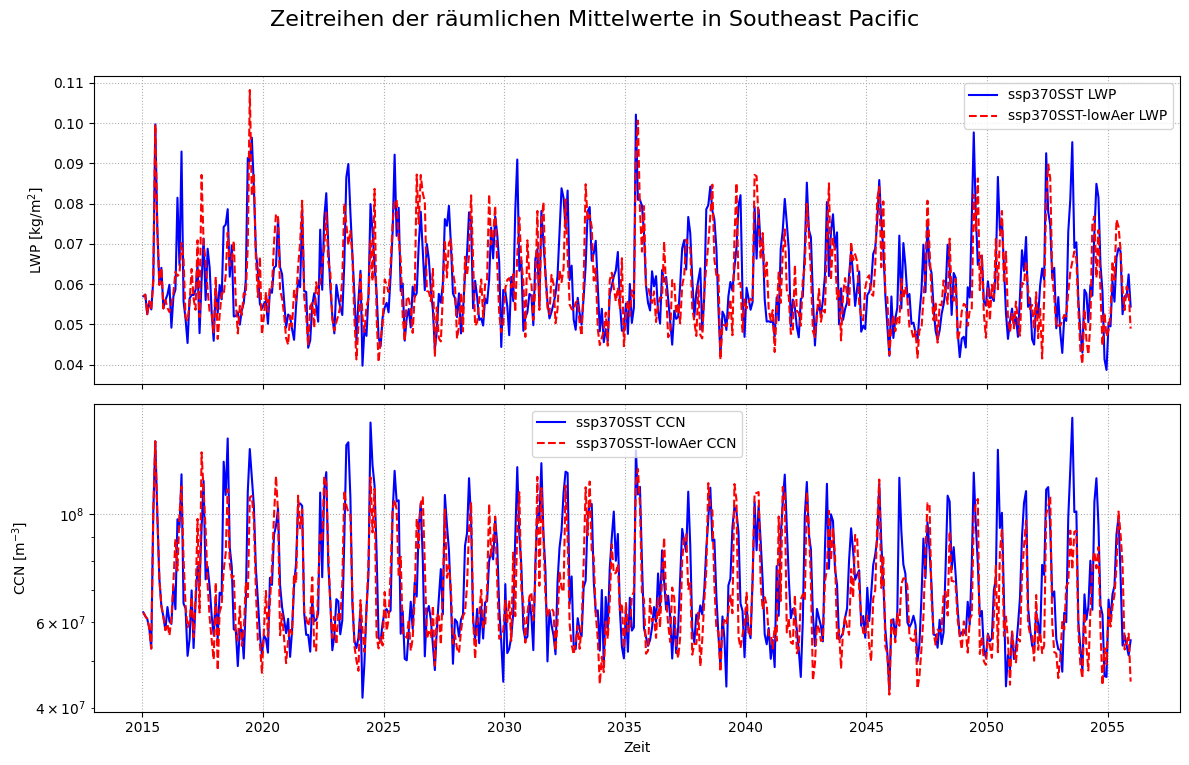

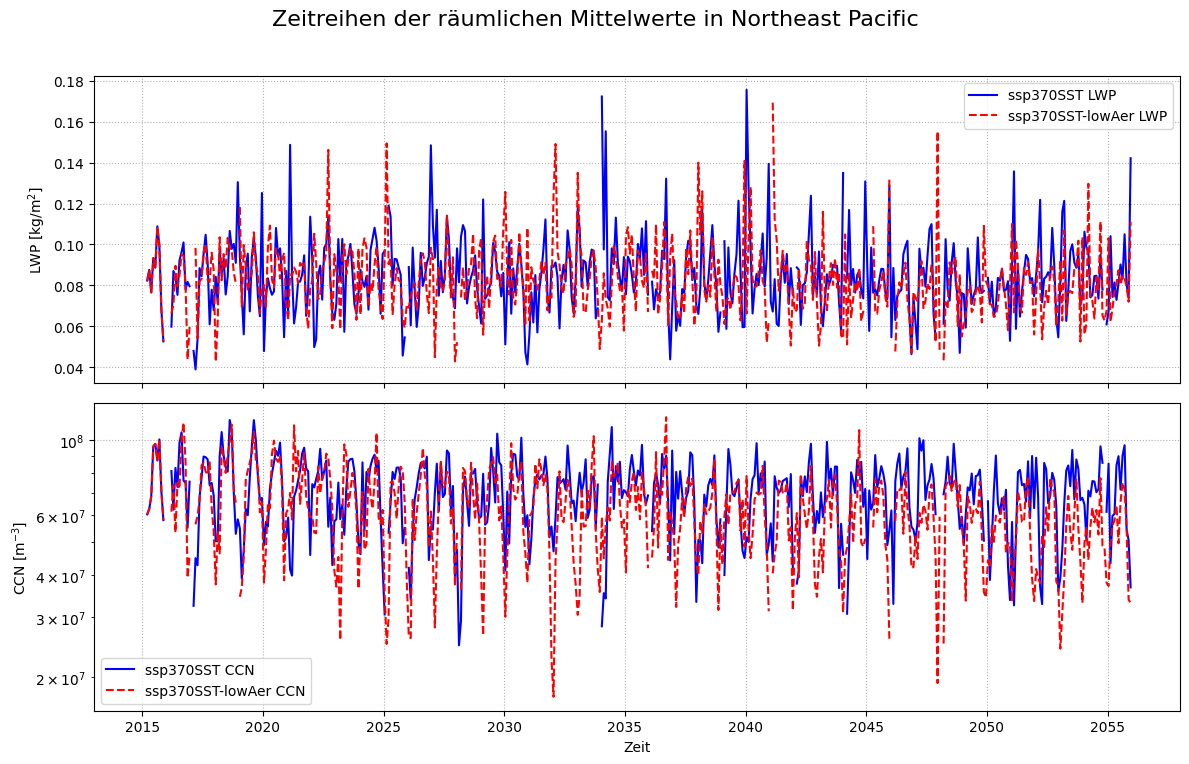

In [ ]:
# --- Plotten der ersten Zeitreihen zur Integritätsprüfung ---
for region_name, data in subset_data.items():
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    fig.suptitle(f'Zeitreihen der räumlichen Mittelwerte in {region_name}', fontsize=16)

    # Plot für LWP
    axes[0].plot(data['ssp370SST']['lwp_mean']['time'], data['ssp370SST']['lwp_mean'],
                 label='ssp370SST LWP', color='blue')
    axes[0].plot(data['ssp370SST-lowAer']['lwp_mean']['time'], data['ssp370SST-lowAer']['lwp_mean'],
                 label='ssp370SST-lowAer LWP', color='red', linestyle='--')
    axes[0].set_ylabel('LWP [kg/m$^2$]')
    axes[0].legend()
    axes[0].grid(True, linestyle=':')

    # Plot für CCN
    axes[1].plot(data['ssp370SST']['ccn_mean']['time'], data['ssp370SST']['ccn_mean'],
                 label='ssp370SST CCN', color='blue')
    axes[1].plot(data['ssp370SST-lowAer']['ccn_mean']['time'], data['ssp370SST-lowAer']['ccn_mean'],
                 label='ssp370SST-lowAer CCN', color='red', linestyle='--')
    axes[1].set_ylabel('CCN [m$^{-3}$]')
    axes[1].set_xlabel('Zeit')
    axes[1].set_yscale('log') # CCN oft logarithmisch darstellen
    axes[1].legend()
    axes[1].grid(True, linestyle=':')

    plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Anpassung für Suptitle
    plt.show()



# **southeast pacific - ssp370sst**

Schritt 1: Daten für die Region 'Southeast Pacific' auswählen...
  LWP Daten-Shape für Southeast Pacific: (492, 16, 16)
  CCN Daten-Shape für Southeast Pacific: (492, 16, 16)

Schritt 2: Daten abflachen und fehlende Werte entfernen...
  Anzahl der gültigen Datenpunkte nach NaN-Entfernung: 71551
  Anzahl der Datenpunkte nach Log-Transformation (CCN > 0): 71551

Schritt 3: Scatter Plot erstellen...


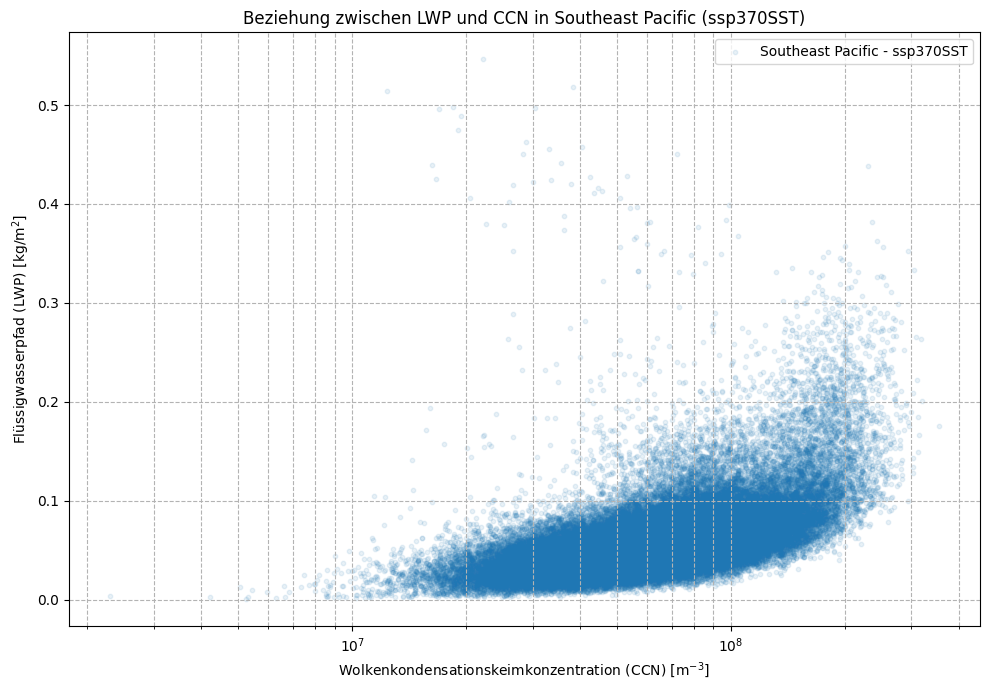


Schritt 4: Pearson-Korrelationskoeffizienten berechnen...
  Pearson-Korrelationskoeffizient (r): 0.621
  P-Wert: 0.000e+00
  Interpretation: Signifikant bei 95% Konfidenzniveau.

Schritt 5: Lineare Regression (LWP vs. log10(CCN)) durchführen...
  Steigung (Slope): 0.0906
  Achsenabschnitt (Intercept): -0.6462
  R-squared (R²): 0.3291
  P-Wert der Regression: 0.000e+00
  Standardfehler der Steigung: 0.0005


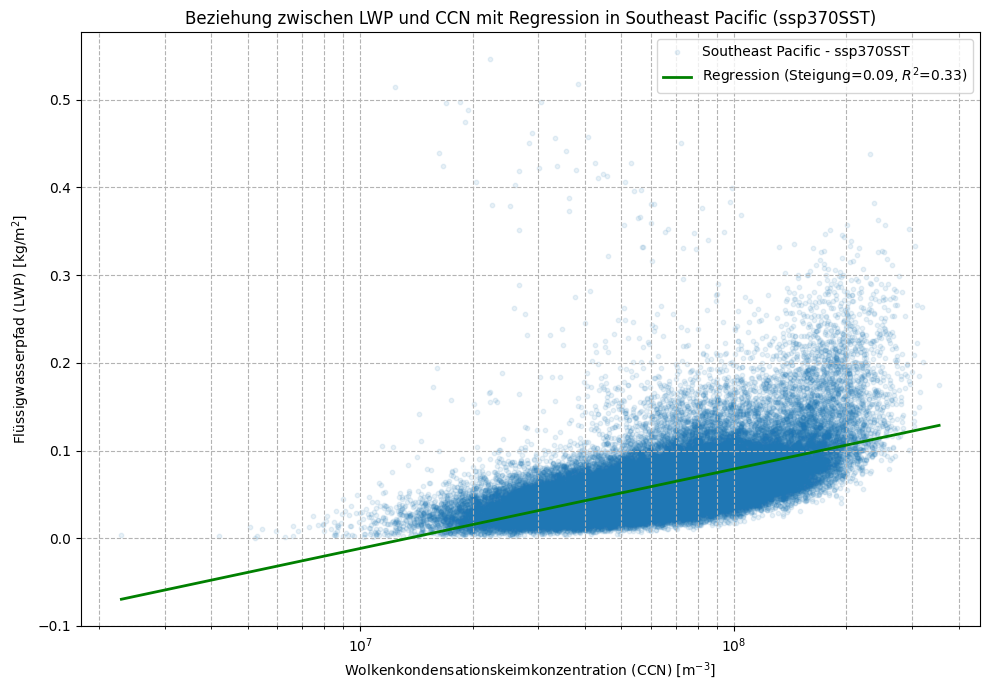

<Figure size 640x480 with 0 Axes>


Analyse für ssp370SST in 'Southeast Pacific' abgeschlossen.


In [ ]:
#Southeast Pacific
#ssp370sst
# --- 1. Daten für die spezifische Region auswählen ---
print("Schritt 1: Daten für die Region 'Southeast Pacific' auswählen...")
region_name = 'Southeast Pacific'
coords = regions[region_name] #entsprechende Koordinaten aus dem regions-dictionary rausholen

# LWP und CCN für die ausgewählte Region beschneiden
# .sel wählt die Daten innerhalb der definierten Längen- und Breitengrad-Slices aus ->daten immer noch 3dimensional (time,lat,lon)
lwp_ssp370SST_region = ds_ssp370SST['lwp'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])
ccn_ssp370SST_region = ds_ssp370SST['ccn'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])

print(f"  LWP Daten-Shape für {region_name}: {lwp_ssp370SST_region.shape}")
print(f"  CCN Daten-Shape für {region_name}: {ccn_ssp370SST_region.shape}")


# --- 2. Daten abflachen (.flatten() ) und fehlende Werte (NaNs) entfernen (np.isnan() ) ---
# Dies ist entscheidend, da wir eine 2D-Beziehung (Scatterplot) aus einem 3D-Array (Zeit, Lat, Lon) erstellen
#für scatterplot und regression braucht man eine gitterstruktur mehr, sondern liste von lwp-werten ud korrespondieren liste von ccn-werten
#.values.flatten() konvertiert xarray.dataarray in 1d-numpy-array
# und sicherstellen müssen, dass LWP- und CCN-Wertepaare korrekt zusammengehören.
print("\nSchritt 2: Daten abflachen und fehlende Werte entfernen...")

lwp_flat = lwp_ssp370SST_region.values.flatten() # Konvertiert das xarray DataArray zu einem NumPy-Array und macht es 1D
ccn_flat = ccn_ssp370SST_region.values.flatten()

# Erstelle einen booleschen Index, der True ist, wenn WEDER LWP NOCH CCN ein NaN ist.
# Wir wollen nur Punkte, für die BEIDE Werte gültig sind.
valid_indices = ~np.isnan(lwp_flat) & ~np.isnan(ccn_flat)

# Wende den Index an, um nur die gültigen Datenpunkte zu erhalten
lwp_clean = lwp_flat[valid_indices]
ccn_clean = ccn_flat[valid_indices]

print(f"  Anzahl der gültigen Datenpunkte nach NaN-Entfernung: {len(lwp_clean)}")
# Optional: Transformiere CCN auf eine logarithmische Skala für die Regression und den Plot
#da ccn-werte oft über mehrere größenskalen variieren und effekte auf wolken eher proportional sind ->logarithmisch transformieren mit np.log10
# Vermeide log(0) oder log(negative Werte)->rausfiltern
ccn_log_clean = np.log10(ccn_clean[ccn_clean > 0]) # Nur positive CCN-Werte log-transformieren
lwp_for_log_ccn = lwp_clean[ccn_clean > 0] # LWP entsprechend filtern

print(f"  Anzahl der Datenpunkte nach Log-Transformation (CCN > 0): {len(lwp_for_log_ccn)}")


# --- 3. Scatter Plot erstellen ---
#plt.scatter(...) erzeugt punktediagramm
print("\nSchritt 3: Scatter Plot erstellen...")
plt.figure(figsize=(10, 7))
plt.scatter(ccn_clean, lwp_clean, alpha=0.1, s=10, label=f'{region_name} - ssp370SST')
# Alternativ mit log-transformierter CCN-Achse:
# plt.scatter(ccn_log_clean, lwp_for_log_ccn, alpha=0.1, s=10, label=f'{region_name} - ssp370SST')

plt.xlabel('Wolkenkondensationskeimkonzentration (CCN) [m$^{-3}$]')
plt.ylabel('Flüssigwasserpfad (LWP) [kg/m$^2$]')
plt.title(f'Beziehung zwischen LWP und CCN in {region_name} (ssp370SST)')
plt.xscale('log') # CCN-Achse logarithmisch skalieren, da oft log-normal verteilt
plt.grid(True, which="both", ls="--", c='0.7')
plt.legend()
plt.tight_layout()
plt.show()
#plot_filename_scatter = f'scatter_lwp_ccn_ssp370SST_{region_name.replace(" ", "_")}.png'
#plt.savefig(plot_filename_scatter)
#plt.close()
#print(f"  Scatter Plot gespeichert als '{plot_filename_scatter}'")


# --- 4. Pearson-Korrelationskoeffizienten berechnen ---
#stats.pearsonr(ccn_clean, lwp_clean) gibt zwei werte zurück:
#correlation_coeffcicient: der r-Wert, der die stärke und richtung der linearen korrelation angibt (-1 bis 1)
#p_value: gibt an, wie wahrscheinlich es ist, dass man eine so starke oder störkere korrlation zufällig beobachten würde, wenn es in realität keine korrelation gäbe.
#p-wert kleiner 0.05 (oder 0.01) statistisch signifikant

print("\nSchritt 4: Pearson-Korrelationskoeffizienten berechnen...")
# Wir verwenden die sauberen, nicht-logarithmischen Daten für die Korrelation
correlation_coefficient, p_value = stats.pearsonr(ccn_clean, lwp_clean)

print(f"  Pearson-Korrelationskoeffizient (r): {correlation_coefficient:.3f}")
print(f"  P-Wert: {p_value:.3e}")
print(f"  Interpretation: {'Signifikant' if p_value < 0.05 else 'Nicht signifikant'} bei 95% Konfidenzniveau.")


# --- 5. Lineare Regression durchführen (LWP vs. log(CCN)) mi scipy.stats.linregress()---
# Dies ist oft die sinnvollste Art der Regression für LWP-CCN-Beziehungen
print("\nSchritt 5: Lineare Regression (LWP vs. log10(CCN)) durchführen...")

# Stellen Sie sicher, dass Sie lwp_for_log_ccn und ccn_log_clean verwenden,
# da diese die CCN-Werte > 0 filtern und transformieren.
# Erhalt wichtiger Werte:
#slope: steigung der regressionsgeraden (maß für sensitivitöt des lwp gegenüber log ccn
#intercept:achsenabschnitt der geraden
#r_value: pearson-koeffizient aus regression (identisch mit oben separater berechnung, wenn daten gleich)
#p_value_reg: p-wert für steigung der regression
#stderr: standardfehler der steigung
#r_squared: berechnet r-squared wert

#code erstellt auch zweiten scatterplot und fügt berechnete regresionslinie hinzu, um anpassung zu visualisieren
if len(ccn_log_clean) > 1: # Regression benötigt mindestens 2 Punkte
    slope, intercept, r_value, p_value_reg, stderr = stats.linregress(ccn_log_clean, lwp_for_log_ccn)

    r_squared = r_value**2
    print(f"  Steigung (Slope): {slope:.4f}")
    print(f"  Achsenabschnitt (Intercept): {intercept:.4f}")
    print(f"  R-squared (R²): {r_squared:.4f}")
    print(f"  P-Wert der Regression: {p_value_reg:.3e}")
    print(f"  Standardfehler der Steigung: {stderr:.4f}")





    # --- Regression auf dem Scatter Plot hinzufügen ---
    plt.figure(figsize=(10, 7))
    plt.scatter(ccn_clean, lwp_clean, alpha=0.1, s=10, label=f'{region_name} - ssp370SST')

    # Erstelle eine Linie für die Regression im log-Skala-Raum
    # Konvertiere CCN-Werte zurück von log10 für die Plot-Achse
    x_for_line = np.array([np.min(ccn_clean[ccn_clean > 0]), np.max(ccn_clean[ccn_clean > 0])])
    y_for_line = slope * np.log10(x_for_line) + intercept




    plt.plot(x_for_line, y_for_line, color='green', linewidth=2,
             label=f'Regression (Steigung={slope:.2f}, $R^2$={r_squared:.2f})')


    plt.xlabel('Wolkenkondensationskeimkonzentration (CCN) [m$^{-3}$]')
    plt.ylabel('Flüssigwasserpfad (LWP) [kg/m$^2$]')
    plt.title(f'Beziehung zwischen LWP und CCN mit Regression in {region_name} (ssp370SST)')
    plt.xscale('log')
    plt.grid(True, which="both", ls="--", c='0.7')
    plt.legend()
    plt.tight_layout()
    plt.show()
    plot_filename_reg = f'scatter_lwp_ccn_regression_ssp370SST_{region_name.replace(" ", "_")}.png'
    plt.savefig(plot_filename_reg)
    plt.show()
    plt.close()
    #print(f"  Scatter Plot mit Regressionslinie gespeichert als '{plot_filename_reg}'")
#else:
    #print("  Nicht genügend Datenpunkte für Regression nach Filterung (CCN > 0).")

print("\nAnalyse für ssp370SST in 'Southeast Pacific' abgeschlossen.")


Schritt 5: Lineare Regression (LWP vs. log10(CCN)) durchführen...
  Steigung (Slope): 0.0906
  Achsenabschnitt (Intercept): -0.6462
  R-squared (R²): 0.3291
  P-Wert der Regression: 0.000e+00
  Standardfehler der Steigung: 0.0005


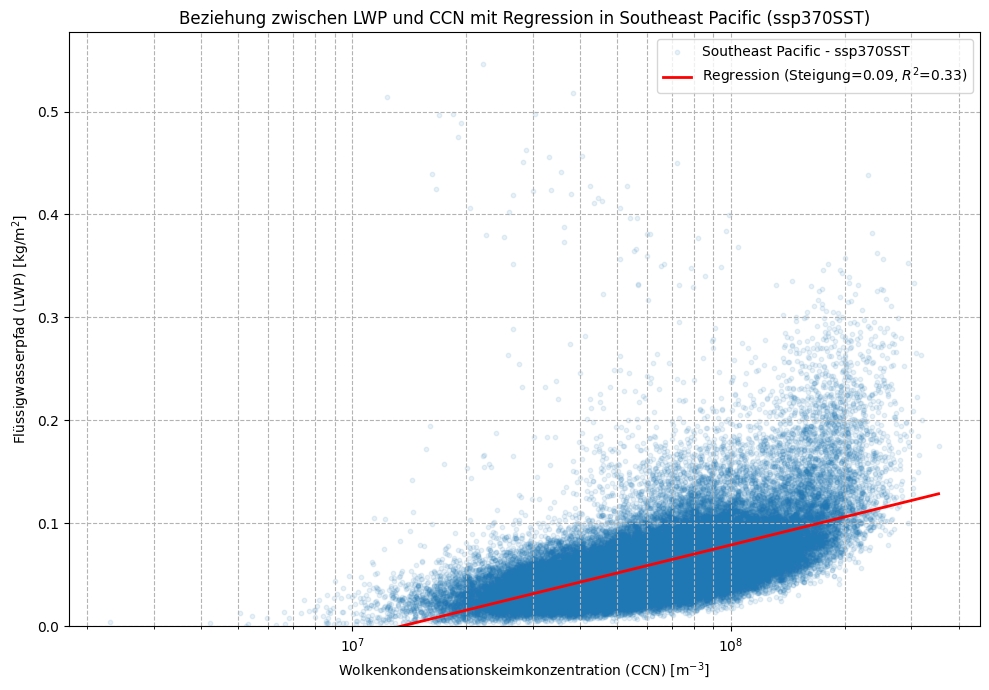


Analyse für ssp370SST-lowAer in 'Southeast Pacific' abgeschlossen.


In [ ]:
# --- 5. Lineare Regression durchführen (LWP vs. log(CCN)) ---
print("\nSchritt 5: Lineare Regression (LWP vs. log10(CCN)) durchführen...")

if len(ccn_log_clean) > 1:
    slope, intercept, r_value, p_value_reg, stderr = stats.linregress(ccn_log_clean, lwp_for_log_ccn)

    r_squared = r_value**2
    print(f"  Steigung (Slope): {slope:.4f}")
    print(f"  Achsenabschnitt (Intercept): {intercept:.4f}")
    print(f"  R-squared (R²): {r_squared:.4f}")
    print(f"  P-Wert der Regression: {p_value_reg:.3e}")
    print(f"  Standardfehler der Steigung: {stderr:.4f}")

    # --- Regression auf dem Scatter Plot hinzufügen (Angepasster Teil) ---
    plt.figure(figsize=(10, 7))
    # Label und Titel anpassen
    plt.scatter(ccn_clean, lwp_clean, alpha=0.1, s=10, label=f'{region_name} - ssp370SST')

    # Erstelle eine Linie für die Regression im log-Skala-Raum
    ccn_line = np.sort(ccn_clean[ccn_clean > 0])
    ccn_line_log10 = np.log10(ccn_line)
    lwp_line = slope * ccn_line_log10 + intercept

    # Zeichne die Regressionslinie
    plt.plot(ccn_line, lwp_line, color='red', linewidth=2,
             label=f'Regression (Steigung={slope:.2f}, $R^2$={r_squared:.2f})')

    # Achsenlimits anpassen, um negative LWP-Werte nicht zu zeigen, wenn nicht nötig
    plt.ylim(bottom=0)

    plt.xlabel('Wolkenkondensationskeimkonzentration (CCN) [m$^{-3}$]')
    plt.ylabel('Flüssigwasserpfad (LWP) [kg/m$^2$]')
    # Titel anpassen
    plt.title(f'Beziehung zwischen LWP und CCN mit Regression in {region_name} (ssp370SST)')
    plt.xscale('log')
    plt.grid(True, which="both", ls="--", c='0.7')
    plt.legend()
    plt.tight_layout()
    # Dateiname anpassen
    #plot_filename_reg = f'scatter_lwp_ccn_regression_ssp370SST-lowAer_{region_name.replace(" ", "_")}.png'
    #plt.savefig(plot_filename_reg)

    plt.show()
    #plt.close()
print(f"\nAnalyse für ssp370SST-lowAer in '{region_name}' abgeschlossen.")

# **Northeast pacific - ssp370sst**

Schritt 1: Daten für die Region 'Northeast Pacific' auswählen...
  LWP Daten-Shape für Northeast Pacific: (492, 11, 19)
  CCN Daten-Shape für Northeast Pacific: (492, 11, 19)

Schritt 2: Daten abflachen und fehlende Werte entfernen...
  Anzahl der gültigen Datenpunkte nach NaN-Entfernung: 31136
  Anzahl der Datenpunkte nach Log-Transformation (CCN > 0): 31136

Schritt 3: Scatter Plot erstellen...


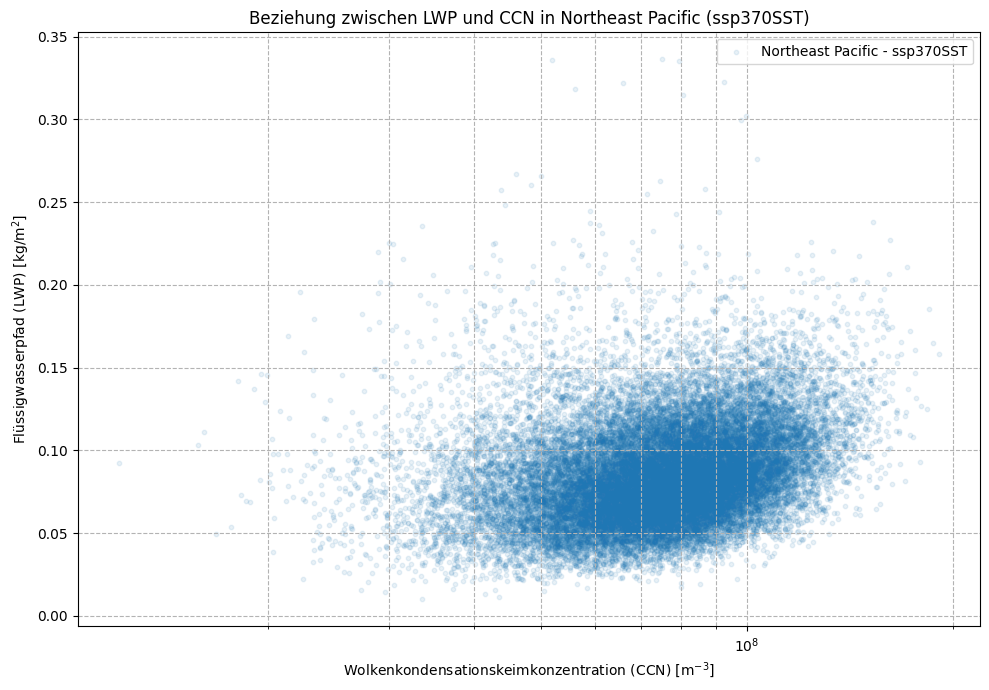


Schritt 4: Pearson-Korrelationskoeffizienten berechnen...
  Pearson-Korrelationskoeffizient (r): 0.305
  P-Wert: 0.000e+00
  Interpretation: Signifikant bei 95% Konfidenzniveau.

Schritt 5: Lineare Regression (LWP vs. log10(CCN)) durchführen...
  Steigung (Slope): 0.0601
  Achsenabschnitt (Intercept): -0.3874
  R-squared (R²): 0.0738
  P-Wert der Regression: 0.000e+00
  Standardfehler der Steigung: 0.0012


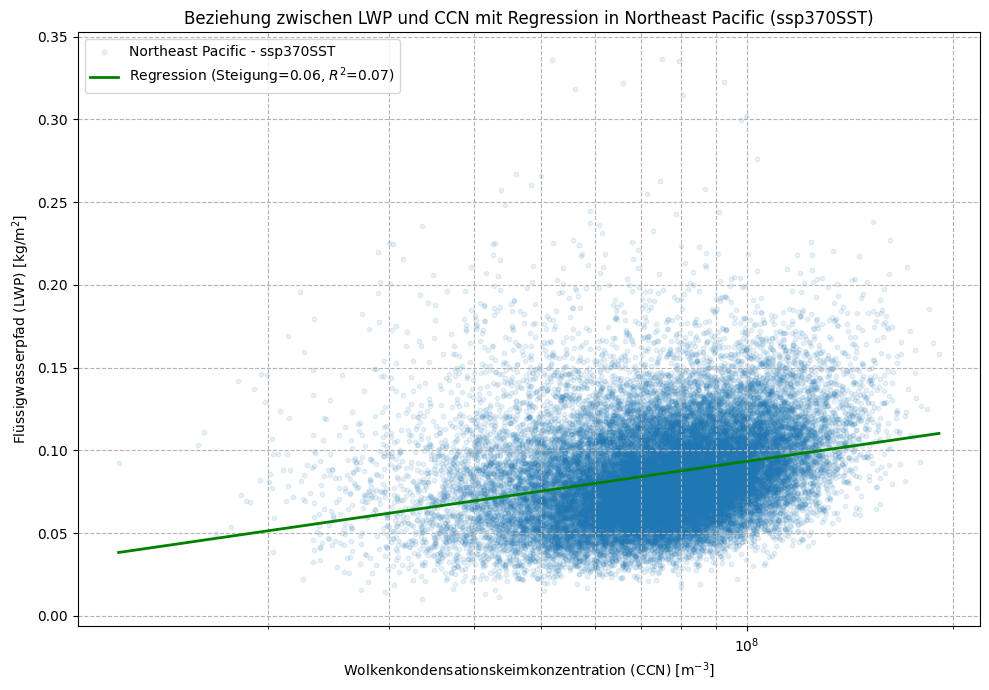


Analyse für ssp370SST in 'Northeast Pacific' abgeschlossen.


In [ ]:
#Northeast Pacific
#ssp370sst
# --- 1. Daten für die spezifische Region auswählen ---
print("Schritt 1: Daten für die Region 'Northeast Pacific' auswählen...")
region_name = 'Northeast Pacific'
coords = regions[region_name] #entsprechende Koordinaten aus dem regions-dictionary rausholen

# LWP und CCN für die ausgewählte Region beschneiden
# .sel wählt die Daten innerhalb der definierten Längen- und Breitengrad-Slices aus ->daten immer noch 3dimensional (time,lat,lon)
lwp_ssp370SST_region = ds_ssp370SST['lwp'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])
ccn_ssp370SST_region = ds_ssp370SST['ccn'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])

print(f"  LWP Daten-Shape für {region_name}: {lwp_ssp370SST_region.shape}")
print(f"  CCN Daten-Shape für {region_name}: {ccn_ssp370SST_region.shape}")


# --- 2. Daten abflachen (.flatten() ) und fehlende Werte (NaNs) entfernen (np.isnan() ) ---
# Dies ist entscheidend, da wir eine 2D-Beziehung (Scatterplot) aus einem 3D-Array (Zeit, Lat, Lon) erstellen
#für scatterplot und regression braucht man eine gitterstruktur mehr, sondern liste von lwp-werten ud korrespondieren liste von ccn-werten
#.values.flatten() konvertiert xarray.dataarray in 1d-numpy-array
# und sicherstellen müssen, dass LWP- und CCN-Wertepaare korrekt zusammengehören.
print("\nSchritt 2: Daten abflachen und fehlende Werte entfernen...")

lwp_flat = lwp_ssp370SST_region.values.flatten() # Konvertiert das xarray DataArray zu einem NumPy-Array und macht es 1D
ccn_flat = ccn_ssp370SST_region.values.flatten()

# Erstelle einen booleschen Index, der True ist, wenn WEDER LWP NOCH CCN ein NaN ist.
# Wir wollen nur Punkte, für die BEIDE Werte gültig sind.
valid_indices = ~np.isnan(lwp_flat) & ~np.isnan(ccn_flat)

# Wende den Index an, um nur die gültigen Datenpunkte zu erhalten
lwp_clean = lwp_flat[valid_indices]
ccn_clean = ccn_flat[valid_indices]

print(f"  Anzahl der gültigen Datenpunkte nach NaN-Entfernung: {len(lwp_clean)}")
# Optional: Transformiere CCN auf eine logarithmische Skala für die Regression und den Plot
#da ccn-werte oft über mehrere größenskalen variieren und effekte auf wolken eher proportional sind ->logarithmisch transformieren mit np.log10
# Vermeide log(0) oder log(negative Werte)->rausfiltern
ccn_log_clean = np.log10(ccn_clean[ccn_clean > 0]) # Nur positive CCN-Werte log-transformieren
lwp_for_log_ccn = lwp_clean[ccn_clean > 0] # LWP entsprechend filtern

print(f"  Anzahl der Datenpunkte nach Log-Transformation (CCN > 0): {len(lwp_for_log_ccn)}")


# --- 3. Scatter Plot erstellen ---
#plt.scatter(...) erzeugt punktediagramm
print("\nSchritt 3: Scatter Plot erstellen...")
plt.figure(figsize=(10, 7))
plt.scatter(ccn_clean, lwp_clean, alpha=0.1, s=10, label=f'{region_name} - ssp370SST')
# Alternativ mit log-transformierter CCN-Achse:
# plt.scatter(ccn_log_clean, lwp_for_log_ccn, alpha=0.1, s=10, label=f'{region_name} - ssp370SST')

plt.xlabel('Wolkenkondensationskeimkonzentration (CCN) [m$^{-3}$]')
plt.ylabel('Flüssigwasserpfad (LWP) [kg/m$^2$]')
plt.title(f'Beziehung zwischen LWP und CCN in {region_name} (ssp370SST)')
plt.xscale('log') # CCN-Achse logarithmisch skalieren, da oft log-normal verteilt
plt.grid(True, which="both", ls="--", c='0.7')
plt.legend()
plt.tight_layout()
plt.show()
#plot_filename_scatter = f'scatter_lwp_ccn_ssp370SST_{region_name.replace(" ", "_")}.png'
#plt.savefig(plot_filename_scatter)
#plt.close()
#print(f"  Scatter Plot gespeichert als '{plot_filename_scatter}'")


# --- 4. Pearson-Korrelationskoeffizienten berechnen ---
#stats.pearsonr(ccn_clean, lwp_clean) gibt zwei werte zurück:
#correlation_coeffcicient: der r-Wert, der die stärke und richtung der linearen korrelation angibt (-1 bis 1)
#p_value: gibt an, wie wahrscheinlich es ist, dass man eine so starke oder störkere korrlation zufällig beobachten würde, wenn es in realität keine korrelation gäbe.
#p-wert kleiner 0.05 (oder 0.01) statistisch signifikant

print("\nSchritt 4: Pearson-Korrelationskoeffizienten berechnen...")
# Wir verwenden die sauberen, nicht-logarithmischen Daten für die Korrelation
correlation_coefficient, p_value = stats.pearsonr(ccn_clean, lwp_clean)

print(f"  Pearson-Korrelationskoeffizient (r): {correlation_coefficient:.3f}")
print(f"  P-Wert: {p_value:.3e}")
print(f"  Interpretation: {'Signifikant' if p_value < 0.05 else 'Nicht signifikant'} bei 95% Konfidenzniveau.")


# --- 5. Lineare Regression durchführen (LWP vs. log(CCN)) mi scipy.stats.linregress()---
# Dies ist oft die sinnvollste Art der Regression für LWP-CCN-Beziehungen
print("\nSchritt 5: Lineare Regression (LWP vs. log10(CCN)) durchführen...")

# Stellen Sie sicher, dass Sie lwp_for_log_ccn und ccn_log_clean verwenden,
# da diese die CCN-Werte > 0 filtern und transformieren.
# Erhalt wichtiger Werte:
#slope: steigung der regressionsgeraden (maß für sensitivitöt des lwp gegenüber log ccn
#intercept:achsenabschnitt der geraden
#r_value: pearson-koeffizient aus regression (identisch mit oben separater berechnung, wenn daten gleich)
#p_value_reg: p-wert für steigung der regression
#stderr: standardfehler der steigung
#r_squared: berechnet r-squared wert

#code erstellt auch zweiten scatterplot und fügt berechnete regresionslinie hinzu, um anpassung zu visualisieren
if len(ccn_log_clean) > 1: # Regression benötigt mindestens 2 Punkte
    slope, intercept, r_value, p_value_reg, stderr = stats.linregress(ccn_log_clean, lwp_for_log_ccn)

    r_squared = r_value**2
    print(f"  Steigung (Slope): {slope:.4f}")
    print(f"  Achsenabschnitt (Intercept): {intercept:.4f}")
    print(f"  R-squared (R²): {r_squared:.4f}")
    print(f"  P-Wert der Regression: {p_value_reg:.3e}")
    print(f"  Standardfehler der Steigung: {stderr:.4f}")

    # --- Regression auf dem Scatter Plot hinzufügen ---
    plt.figure(figsize=(10, 7))
    plt.scatter(ccn_clean, lwp_clean, alpha=0.1, s=10, label=f'{region_name} - ssp370SST')

    # Erstelle eine Linie für die Regression im log-Skala-Raum
    # Konvertiere CCN-Werte zurück von log10 für die Plot-Achse
    x_for_line = np.array([np.min(ccn_clean[ccn_clean > 0]), np.max(ccn_clean[ccn_clean > 0])])
    y_for_line = slope * np.log10(x_for_line) + intercept
    plt.plot(x_for_line, y_for_line, color='green', linewidth=2,
             label=f'Regression (Steigung={slope:.2f}, $R^2$={r_squared:.2f})')


    plt.xlabel('Wolkenkondensationskeimkonzentration (CCN) [m$^{-3}$]')
    plt.ylabel('Flüssigwasserpfad (LWP) [kg/m$^2$]')
    plt.title(f'Beziehung zwischen LWP und CCN mit Regression in {region_name} (ssp370SST)')
    plt.xscale('log')
    plt.grid(True, which="both", ls="--", c='0.7')
    plt.legend()
    plt.tight_layout()
    plt.show()
    #plot_filename_reg = f'scatter_lwp_ccn_regression_ssp370SST_{region_name.replace(" ", "_")}.png'
    #plt.savefig(plot_filename_reg)
    #plt.close()
    #print(f"  Scatter Plot mit Regressionslinie gespeichert als '{plot_filename_reg}'")
#else:
    #print("  Nicht genügend Datenpunkte für Regression nach Filterung (CCN > 0).")

print("\nAnalyse für ssp370SST in 'Northeast Pacific' abgeschlossen.")

  Steigung (Slope): 0.0601
  Achsenabschnitt (Intercept): -0.3874
  R-squared (R²): 0.0738
  P-Wert der Regression: 0.000e+00
  Standardfehler der Steigung: 0.0012


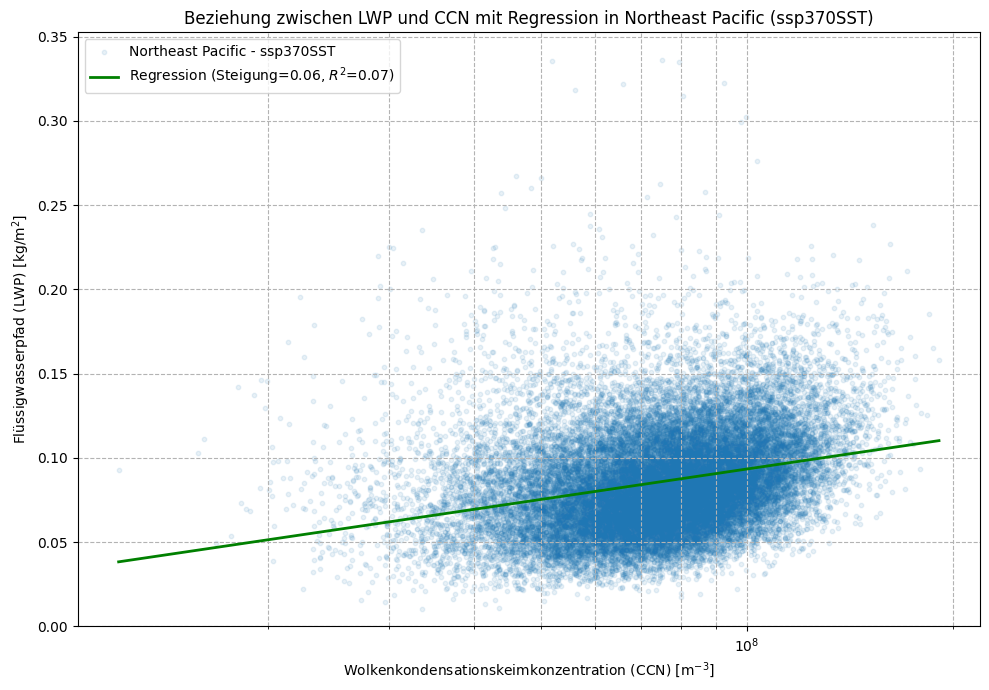


Analyse für ssp370SST in 'Northeast Pacific' abgeschlossen.


In [ ]:
region_name = 'Northeast Pacific' # Region ändern
coords = regions[region_name]

# Verwende das Dataset für das ssp370SST Experiment
lwp_ssp370SST_region = ds_ssp370SST['lwp'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])
ccn_ssp370SST_region = ds_ssp370SST['ccn'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])

lwp_flat = lwp_ssp370SST_region.values.flatten()
ccn_flat = ccn_ssp370SST_region.values.flatten()

valid_indices = ~np.isnan(lwp_flat) & ~np.isnan(ccn_flat)

lwp_clean = lwp_flat[valid_indices]
ccn_clean = ccn_flat[valid_indices]

ccn_log_clean = np.log10(ccn_clean[ccn_clean > 0])
lwp_for_log_ccn = lwp_clean[ccn_clean > 0]

if len(ccn_log_clean) > 1:
    slope, intercept, r_value, p_value_reg, stderr = stats.linregress(ccn_log_clean, lwp_for_log_ccn)

    r_squared = r_value**2
    print(f"  Steigung (Slope): {slope:.4f}")
    print(f"  Achsenabschnitt (Intercept): {intercept:.4f}")
    print(f"  R-squared (R²): {r_squared:.4f}")
    print(f"  P-Wert der Regression: {p_value_reg:.3e}")
    print(f"  Standardfehler der Steigung: {stderr:.4f}")

    # --- Regression auf dem Scatter Plot hinzufügen (Angepasster Teil) ---
    plt.figure(figsize=(10, 7))
    # Label und Titel anpassen
    plt.scatter(ccn_clean, lwp_clean, alpha=0.1, s=10, label=f'{region_name} - ssp370SST') # Experiment-Label anpassen

    # Erstelle eine Linie für die Regression im log-Skala-Raum
    ccn_line = np.sort(ccn_clean[ccn_clean > 0])
    ccn_line_log10 = np.log10(ccn_line)
    lwp_line = slope * ccn_line_log10 + intercept

    # Zeichne die Regressionslinie
    plt.plot(ccn_line, lwp_line, color='green', linewidth=2,
             label=f'Regression (Steigung={slope:.2f}, $R^2$={r_squared:.2f})')

    # Achsenlimits anpassen, um negative LWP-Werte nicht zu zeigen, wenn nicht nötig
    plt.ylim(bottom=0)

    plt.xlabel('Wolkenkondensationskeimkonzentration (CCN) [m$^{-3}$]')
    plt.ylabel('Flüssigwasserpfad (LWP) [kg/m$^2$]')
    # Titel anpassen
    plt.title(f'Beziehung zwischen LWP und CCN mit Regression in {region_name} (ssp370SST)') # Titel anpassen
    plt.xscale('log')
    plt.grid(True, which="both", ls="--", c='0.7')
    plt.legend()
    plt.tight_layout()
    # Dateiname anpassen
    #plot_filename_reg = f'scatter_lwp_ccn_regression_ssp370SST_{region_name.replace(" ", "_")}.png' # Dateiname anpassen
    #plt.savefig(plot_filename_reg)
    #plt.close()
    plt.show()

print(f"\nAnalyse für ssp370SST in '{region_name}' abgeschlossen.") # Letzte Ausgabe anpassen

# **Southeast pacific - ssp370-lowAer**

Schritt 1: Daten für die Region 'Southeast Pacific' auswählen (lowAer)...
  LWP Daten-Shape für Southeast Pacific (ssp370SST-lowAer): (492, 16, 16)
  CCN Daten-Shape für Southeast Pacific (ssp370SST-lowAer): (492, 16, 16)

Schritt 2: Daten abflachen und fehlende Werte entfernen...
  Anzahl der gültigen Datenpunkte nach NaN-Entfernung: 70614
  Anzahl der Datenpunkte nach Log-Transformation (CCN > 0): 70614

Schritt 3: Scatter Plot erstellen...


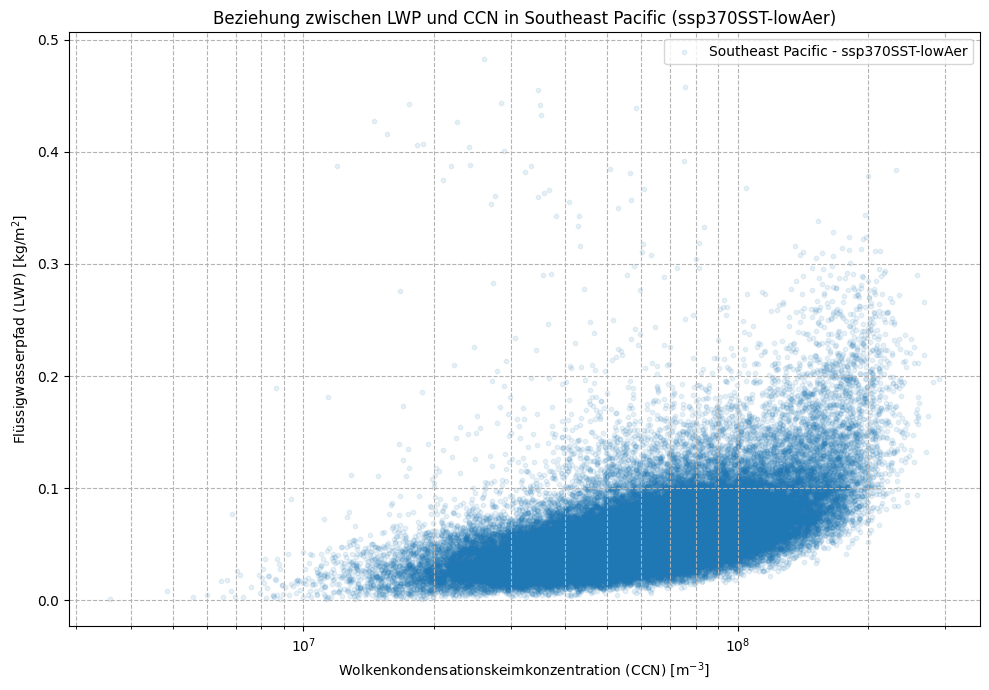


Schritt 4: Pearson-Korrelationskoeffizienten berechnen...
  Pearson-Korrelationskoeffizient (r): 0.611
  P-Wert: 0.000e+00
  Interpretation: Signifikant bei 95% Konfidenzniveau.

Schritt 5: Lineare Regression (LWP vs. log10(CCN)) durchführen...
  Steigung (Slope): 0.0877
  Achsenabschnitt (Intercept): -0.6227
  R-squared (R²): 0.3168
  P-Wert der Regression: 0.000e+00
  Standardfehler der Steigung: 0.0005


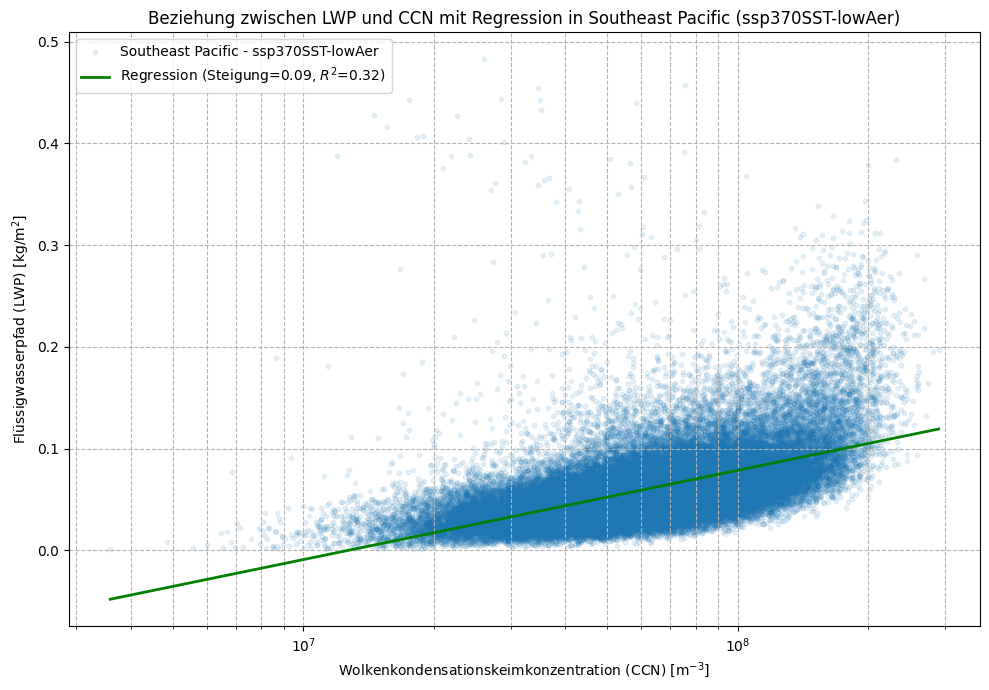


Analyse für ssp370SST in 'Southeast Pacific' abgeschlossen.


In [ ]:
#Southeast Pacific
#ssp370sst_lowAer
# --- 1. Daten für die spezifische Region auswählen ---
print("Schritt 1: Daten für die Region 'Southeast Pacific' auswählen (lowAer)...")
region_name = 'Southeast Pacific'
coords = regions[region_name] #entsprechende Koordinaten aus dem regions-dictionary rausholen

# LWP und CCN für die ausgewählte Region beschneiden
# .sel wählt die Daten innerhalb der definierten Längen- und Breitengrad-Slices aus ->daten immer noch 3dimensional (time,lat,lon)
# Verwende das Dataset für das ssp370SST-lowAer Experiment
lwp_ssp370SST_lowAer_region = ds_ssp370SST_lowAer['lwp'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])
ccn_ssp370SST_lowAer_region = ds_ssp370SST_lowAer['ccn'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])

print(f"  LWP Daten-Shape für {region_name} (ssp370SST-lowAer): {lwp_ssp370SST_lowAer_region.shape}")
print(f"  CCN Daten-Shape für {region_name} (ssp370SST-lowAer): {ccn_ssp370SST_lowAer_region.shape}")



# --- 2. Daten abflachen (.flatten() ) und fehlende Werte (NaNs) entfernen (np.isnan() ) ---
# Dies ist entscheidend, da wir eine 2D-Beziehung (Scatterplot) aus einem 3D-Array (Zeit, Lat, Lon) erstellen
#für scatterplot und regression braucht man eine gitterstruktur mehr, sondern liste von lwp-werten ud korrespondieren liste von ccn-werten
#.values.flatten() konvertiert xarray.dataarray in 1d-numpy-array
# und sicherstellen müssen, dass LWP- und CCN-Wertepaare korrekt zusammengehören.
print("\nSchritt 2: Daten abflachen und fehlende Werte entfernen...")

lwp_flat = lwp_ssp370SST_lowAer_region.values.flatten()
ccn_flat = ccn_ssp370SST_lowAer_region.values.flatten()

# Erstelle einen booleschen Index, der True ist, wenn WEDER LWP NOCH CCN ein NaN ist.
# Wir wollen nur Punkte, für die BEIDE Werte gültig sind.
valid_indices = ~np.isnan(lwp_flat) & ~np.isnan(ccn_flat)

# Wende den Index an, um nur die gültigen Datenpunkte zu erhalten
lwp_clean = lwp_flat[valid_indices]
ccn_clean = ccn_flat[valid_indices]

print(f"  Anzahl der gültigen Datenpunkte nach NaN-Entfernung: {len(lwp_clean)}")
# Optional: Transformiere CCN auf eine logarithmische Skala für die Regression und den Plot
#da ccn-werte oft über mehrere größenskalen variieren und effekte auf wolken eher proportional sind ->logarithmisch transformieren mit np.log10
# Vermeide log(0) oder log(negative Werte)->rausfiltern
ccn_log_clean = np.log10(ccn_clean[ccn_clean > 0]) # Nur positive CCN-Werte log-transformieren
lwp_for_log_ccn = lwp_clean[ccn_clean > 0] # LWP entsprechend filtern

print(f"  Anzahl der Datenpunkte nach Log-Transformation (CCN > 0): {len(lwp_for_log_ccn)}")


# --- 3. Scatter Plot erstellen ---
#plt.scatter(...) erzeugt punktediagramm
print("\nSchritt 3: Scatter Plot erstellen...")
plt.figure(figsize=(10, 7))
plt.scatter(ccn_clean, lwp_clean, alpha=0.1, s=10, label=f'{region_name} - ssp370SST-lowAer')
# Alternativ mit log-transformierter CCN-Achse:
# plt.scatter(ccn_log_clean, lwp_for_log_ccn, alpha=0.1, s=10, label=f'{region_name} - ssp370SST')

plt.xlabel('Wolkenkondensationskeimkonzentration (CCN) [m$^{-3}$]')
plt.ylabel('Flüssigwasserpfad (LWP) [kg/m$^2$]')
plt.title(f'Beziehung zwischen LWP und CCN in {region_name} (ssp370SST-lowAer)')
plt.xscale('log') # CCN-Achse logarithmisch skalieren, da oft log-normal verteilt
plt.grid(True, which="both", ls="--", c='0.7')
plt.legend()
plt.tight_layout()
plt.show()
#plot_filename_scatter = f'scatter_lwp_ccn_ssp370SST_{region_name.replace(" ", "_")}.png'
#plt.savefig(plot_filename_scatter)
#plt.close()
#print(f"  Scatter Plot gespeichert als '{plot_filename_scatter}'")


# --- 4. Pearson-Korrelationskoeffizienten berechnen ---
#stats.pearsonr(ccn_clean, lwp_clean) gibt zwei werte zurück:
#correlation_coeffcicient: der r-Wert, der die stärke und richtung der linearen korrelation angibt (-1 bis 1)
#p_value: gibt an, wie wahrscheinlich es ist, dass man eine so starke oder störkere korrlation zufällig beobachten würde, wenn es in realität keine korrelation gäbe.
#p-wert kleiner 0.05 (oder 0.01) statistisch signifikant

print("\nSchritt 4: Pearson-Korrelationskoeffizienten berechnen...")
# Wir verwenden die sauberen, nicht-logarithmischen Daten für die Korrelation
correlation_coefficient, p_value = stats.pearsonr(ccn_clean, lwp_clean)

print(f"  Pearson-Korrelationskoeffizient (r): {correlation_coefficient:.3f}")
print(f"  P-Wert: {p_value:.3e}")
print(f"  Interpretation: {'Signifikant' if p_value < 0.05 else 'Nicht signifikant'} bei 95% Konfidenzniveau.")


# --- 5. Lineare Regression durchführen (LWP vs. log(CCN)) mi scipy.stats.linregress()---
# Dies ist oft die sinnvollste Art der Regression für LWP-CCN-Beziehungen
print("\nSchritt 5: Lineare Regression (LWP vs. log10(CCN)) durchführen...")

# Stellen Sie sicher, dass Sie lwp_for_log_ccn und ccn_log_clean verwenden,
# da diese die CCN-Werte > 0 filtern und transformieren.
# Erhalt wichtiger Werte:
#slope: steigung der regressionsgeraden (maß für sensitivitöt des lwp gegenüber log ccn
#intercept:achsenabschnitt der geraden
#r_value: pearson-koeffizient aus regression (identisch mit oben separater berechnung, wenn daten gleich)
#p_value_reg: p-wert für steigung der regression
#stderr: standardfehler der steigung
#r_squared: berechnet r-squared wert

#code erstellt auch zweiten scatterplot und fügt berechnete regresionslinie hinzu, um anpassung zu visualisieren
if len(ccn_log_clean) > 1: # Regression benötigt mindestens 2 Punkte
    slope, intercept, r_value, p_value_reg, stderr = stats.linregress(ccn_log_clean, lwp_for_log_ccn)

    r_squared = r_value**2
    print(f"  Steigung (Slope): {slope:.4f}")
    print(f"  Achsenabschnitt (Intercept): {intercept:.4f}")
    print(f"  R-squared (R²): {r_squared:.4f}")
    print(f"  P-Wert der Regression: {p_value_reg:.3e}")
    print(f"  Standardfehler der Steigung: {stderr:.4f}")

    # --- Regression auf dem Scatter Plot hinzufügen ---
    plt.figure(figsize=(10, 7))
    plt.scatter(ccn_clean, lwp_clean, alpha=0.1, s=10, label=f'{region_name} - ssp370SST-lowAer')

    # Erstelle eine Linie für die Regression im log-Skala-Raum
    # Konvertiere CCN-Werte zurück von log10 für die Plot-Achse
    x_for_line = np.array([np.min(ccn_clean[ccn_clean > 0]), np.max(ccn_clean[ccn_clean > 0])])
    y_for_line = slope * np.log10(x_for_line) + intercept
    plt.plot(x_for_line, y_for_line, color='green', linewidth=2,
             label=f'Regression (Steigung={slope:.2f}, $R^2$={r_squared:.2f})')


    plt.xlabel('Wolkenkondensationskeimkonzentration (CCN) [m$^{-3}$]')
    plt.ylabel('Flüssigwasserpfad (LWP) [kg/m$^2$]')
    plt.title(f'Beziehung zwischen LWP und CCN mit Regression in {region_name} (ssp370SST-lowAer)')
    plt.xscale('log')
    plt.grid(True, which="both", ls="--", c='0.7')
    plt.legend()
    plt.tight_layout()
    plt.show()
    #plot_filename_reg = f'scatter_lwp_ccn_regression_ssp370SST_{region_name.replace(" ", "_")}.png'
    #plt.savefig(plot_filename_reg)
    #plt.close()
    #print(f"  Scatter Plot mit Regressionslinie gespeichert als '{plot_filename_reg}'")
#else:
    #print("  Nicht genügend Datenpunkte für Regression nach Filterung (CCN > 0).")

print("\nAnalyse für ssp370SST in 'Southeast Pacific' abgeschlossen.")

  Steigung (Slope): 0.0877
  Achsenabschnitt (Intercept): -0.6227
  R-squared (R²): 0.3168
  P-Wert der Regression: 0.000e+00
  Standardfehler der Steigung: 0.0005


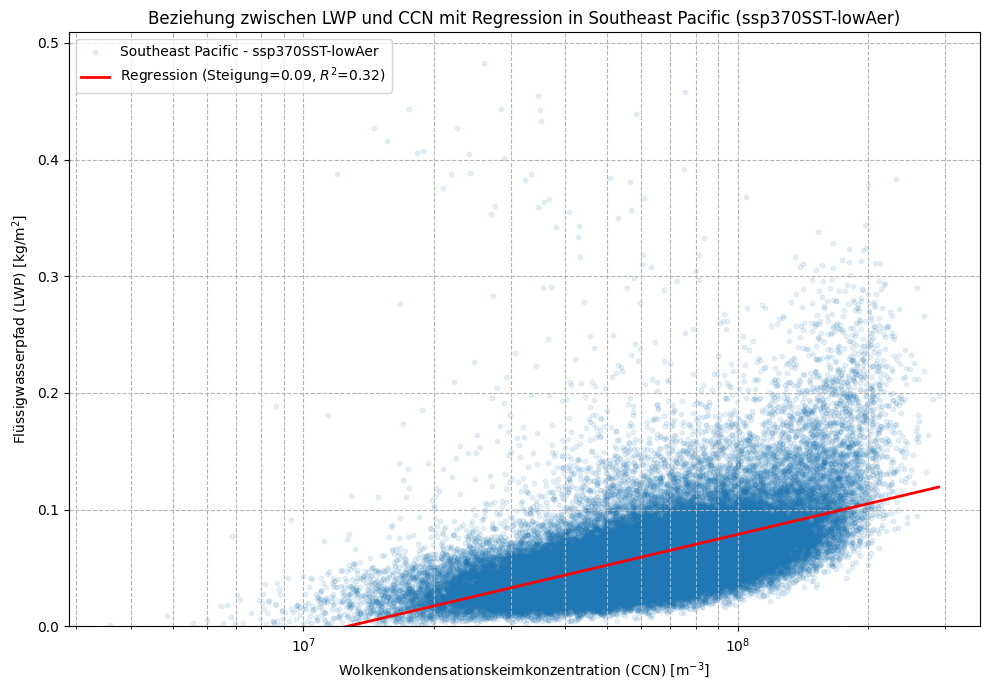


Analyse für ssp370SST-lowAer in 'Southeast Pacific' abgeschlossen.


In [ ]:
region_name = 'Southeast Pacific' # Region ändern
coords = regions[region_name]

# Verwende das Dataset für das ssp370SST-lowAer Experiment
lwp_current_experiment_region = ds_ssp370SST_lowAer['lwp'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])
ccn_current_experiment_region = ds_ssp370SST_lowAer['ccn'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])

lwp_flat = lwp_current_experiment_region.values.flatten()
ccn_flat = ccn_current_experiment_region.values.flatten()

valid_indices = ~np.isnan(lwp_flat) & ~np.isnan(ccn_flat)

lwp_clean = lwp_flat[valid_indices]
ccn_clean = ccn_flat[valid_indices]

ccn_log_clean = np.log10(ccn_clean[ccn_clean > 0])
lwp_for_log_ccn = lwp_clean[ccn_clean > 0]

if len(ccn_log_clean) > 1: # Regression benötigt mindestens 2 Punkte
    slope, intercept, r_value, p_value_reg, stderr = stats.linregress(ccn_log_clean, lwp_for_log_ccn)

    r_squared = r_value**2
    print(f"  Steigung (Slope): {slope:.4f}")
    print(f"  Achsenabschnitt (Intercept): {intercept:.4f}")
    print(f"  R-squared (R²): {r_squared:.4f}")
    print(f"  P-Wert der Regression: {p_value_reg:.3e}")
    print(f"  Standardfehler der Steigung: {stderr:.4f}")

    # --- Regression auf dem Scatter Plot hinzufügen ---
    plt.figure(figsize=(10, 7))
    # Label und Titel anpassen
    plt.scatter(ccn_clean, lwp_clean, alpha=0.1, s=10, label=f'{region_name} - ssp370SST-lowAer') # Experiment-Label anpassen

    # Erstelle eine Linie für die Regression im log-Skala-Raum
    # Verwende den Bereich der BEOBACHTETEN CCN-Werte für die Regressionslinie
    ccn_line = np.sort(ccn_clean[ccn_clean > 0])
    ccn_line_log10 = np.log10(ccn_line)
    lwp_line = slope * ccn_line_log10 + intercept

    # Zeichne die Regressionslinie
    plt.plot(ccn_line, lwp_line, color='red', linewidth=2,
             label=f'Regression (Steigung={slope:.2f}, $R^2$={r_squared:.2f})')

    # Achsenlimits anpassen, um negative LWP-Werte nicht zu zeigen, wenn nicht nötig
    plt.ylim(bottom=0)

    plt.xlabel('Wolkenkondensationskeimkonzentration (CCN) [m$^{-3}$]')
    plt.ylabel('Flüssigwasserpfad (LWP) [kg/m$^2$]')
    # Titel anpassen
    plt.title(f'Beziehung zwischen LWP und CCN mit Regression in {region_name} (ssp370SST-lowAer)') # Titel anpassen
    plt.xscale('log')
    plt.grid(True, which="both", ls="--", c='0.7')
    plt.legend()
    plt.tight_layout()
    # Dateiname anpassen
    #plot_filename_reg = f'scatter_lwp_ccn_regression_ssp370SST-lowAer_{region_name.replace(" ", "_")}.png' # Dateiname anpassen
    #plt.savefig(plot_filename_reg)
    #plt.close()
    plt.show()

print(f"\nAnalyse für ssp370SST-lowAer in '{region_name}' abgeschlossen.") # Letzte Ausgabe anpassen

# **Northeast pacific - ssp370sst-lowAer**

Schritt 1: Daten für die Region 'Northeast Pacific' auswählen (lowAer)...
  LWP Daten-Shape für Northeast Pacific (ssp370SST-lowAer): (492, 11, 19)
  CCN Daten-Shape für Northeast Pacific (ssp370SST-lowAer): (492, 11, 19)

Schritt 2: Daten abflachen und fehlende Werte entfernen...
  Anzahl der gültigen Datenpunkte nach NaN-Entfernung: 31820
  Anzahl der Datenpunkte nach Log-Transformation (CCN > 0): 31820

Schritt 3: Scatter Plot erstellen...


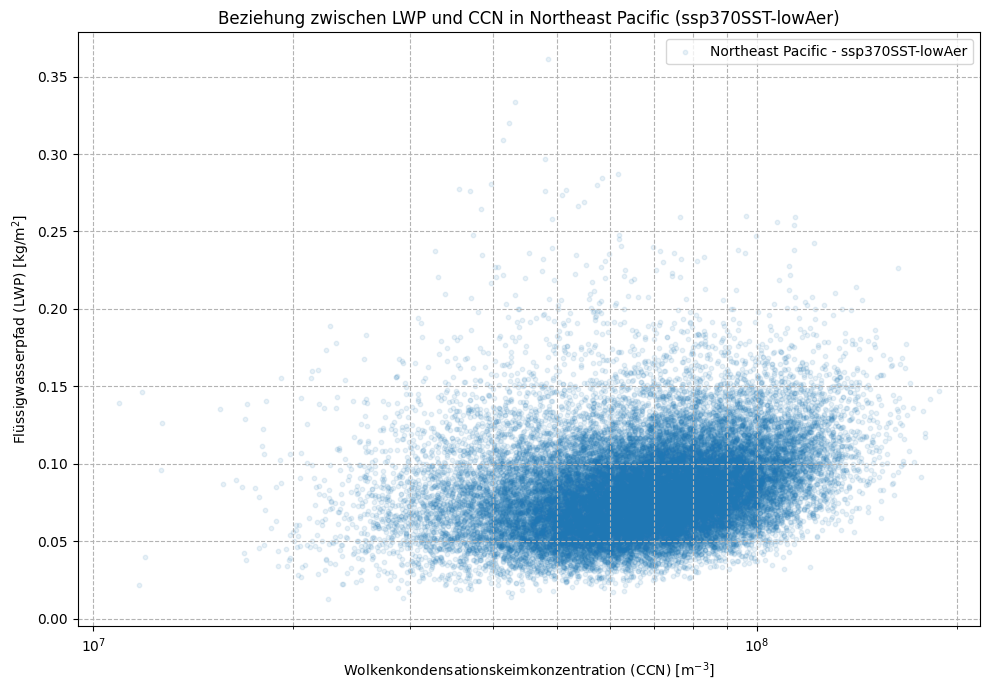


Schritt 4: Pearson-Korrelationskoeffizienten berechnen...
  Pearson-Korrelationskoeffizient (r): 0.297
  P-Wert: 0.000e+00
  Interpretation: Signifikant bei 95% Konfidenzniveau.

Schritt 5: Lineare Regression (LWP vs. log10(CCN)) durchführen...
  Steigung (Slope): 0.0534
  Achsenabschnitt (Intercept): -0.3342
  R-squared (R²): 0.0698
  P-Wert der Regression: 0.000e+00
  Standardfehler der Steigung: 0.0011


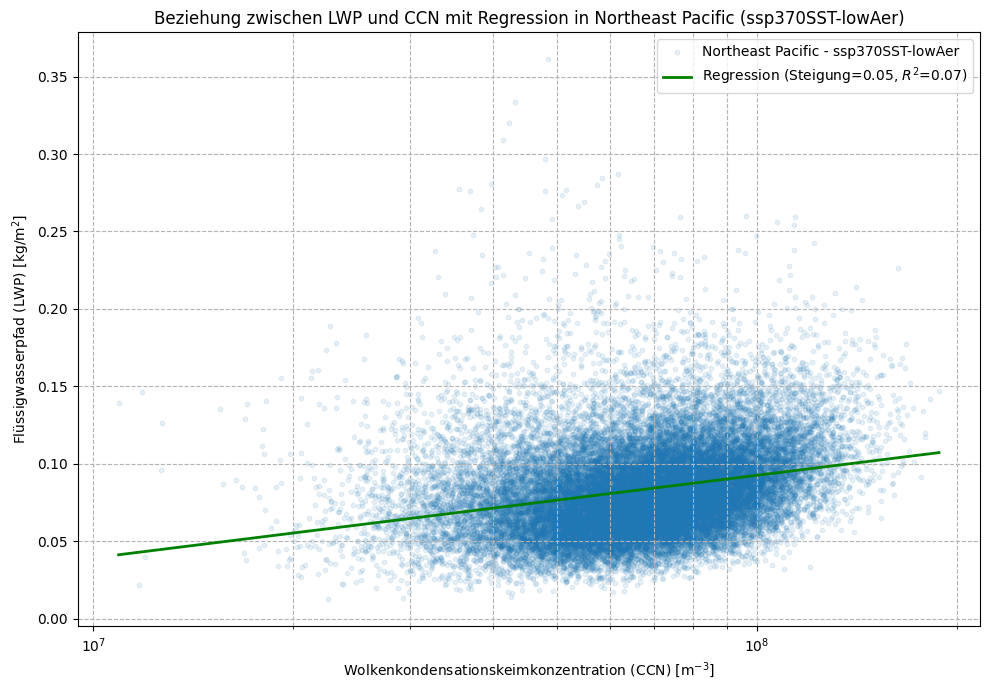


Analyse für ssp370SST in 'Northeast Pacific' abgeschlossen.


In [ ]:
#Northeast Pacific
#ssp370sst_lowAer
# --- 1. Daten für die spezifische Region auswählen ---
print("Schritt 1: Daten für die Region 'Northeast Pacific' auswählen (lowAer)...")
region_name = 'Northeast Pacific'
coords = regions[region_name] #entsprechende Koordinaten aus dem regions-dictionary rausholen

# LWP und CCN für die ausgewählte Region beschneiden
# .sel wählt die Daten innerhalb der definierten Längen- und Breitengrad-Slices aus ->daten immer noch 3dimensional (time,lat,lon)
# Verwende das Dataset für das ssp370SST-lowAer Experiment
lwp_ssp370SST_lowAer_region = ds_ssp370SST_lowAer['lwp'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])
ccn_ssp370SST_lowAer_region = ds_ssp370SST_lowAer['ccn'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])

print(f"  LWP Daten-Shape für {region_name} (ssp370SST-lowAer): {lwp_ssp370SST_lowAer_region.shape}")
print(f"  CCN Daten-Shape für {region_name} (ssp370SST-lowAer): {ccn_ssp370SST_lowAer_region.shape}")



# --- 2. Daten abflachen (.flatten() ) und fehlende Werte (NaNs) entfernen (np.isnan() ) ---
# Dies ist entscheidend, da wir eine 2D-Beziehung (Scatterplot) aus einem 3D-Array (Zeit, Lat, Lon) erstellen
#für scatterplot und regression braucht man eine gitterstruktur mehr, sondern liste von lwp-werten ud korrespondieren liste von ccn-werten
#.values.flatten() konvertiert xarray.dataarray in 1d-numpy-array
# und sicherstellen müssen, dass LWP- und CCN-Wertepaare korrekt zusammengehören.
print("\nSchritt 2: Daten abflachen und fehlende Werte entfernen...")

lwp_flat = lwp_ssp370SST_lowAer_region.values.flatten()
ccn_flat = ccn_ssp370SST_lowAer_region.values.flatten()

# Erstelle einen booleschen Index, der True ist, wenn WEDER LWP NOCH CCN ein NaN ist.
# Wir wollen nur Punkte, für die BEIDE Werte gültig sind.
valid_indices = ~np.isnan(lwp_flat) & ~np.isnan(ccn_flat)

# Wende den Index an, um nur die gültigen Datenpunkte zu erhalten
lwp_clean = lwp_flat[valid_indices]
ccn_clean = ccn_flat[valid_indices]

print(f"  Anzahl der gültigen Datenpunkte nach NaN-Entfernung: {len(lwp_clean)}")
# Optional: Transformiere CCN auf eine logarithmische Skala für die Regression und den Plot
#da ccn-werte oft über mehrere größenskalen variieren und effekte auf wolken eher proportional sind ->logarithmisch transformieren mit np.log10
# Vermeide log(0) oder log(negative Werte)->rausfiltern
ccn_log_clean = np.log10(ccn_clean[ccn_clean > 0]) # Nur positive CCN-Werte log-transformieren
lwp_for_log_ccn = lwp_clean[ccn_clean > 0] # LWP entsprechend filtern

print(f"  Anzahl der Datenpunkte nach Log-Transformation (CCN > 0): {len(lwp_for_log_ccn)}")


# --- 3. Scatter Plot erstellen ---
#plt.scatter(...) erzeugt punktediagramm
print("\nSchritt 3: Scatter Plot erstellen...")
plt.figure(figsize=(10, 7))
plt.scatter(ccn_clean, lwp_clean, alpha=0.1, s=10, label=f'{region_name} - ssp370SST-lowAer')
# Alternativ mit log-transformierter CCN-Achse:
# plt.scatter(ccn_log_clean, lwp_for_log_ccn, alpha=0.1, s=10, label=f'{region_name} - ssp370SST')

plt.xlabel('Wolkenkondensationskeimkonzentration (CCN) [m$^{-3}$]')
plt.ylabel('Flüssigwasserpfad (LWP) [kg/m$^2$]')
plt.title(f'Beziehung zwischen LWP und CCN in {region_name} (ssp370SST-lowAer)')
plt.xscale('log') # CCN-Achse logarithmisch skalieren, da oft log-normal verteilt
plt.grid(True, which="both", ls="--", c='0.7')
plt.legend()
plt.tight_layout()
plt.show()
#plot_filename_scatter = f'scatter_lwp_ccn_ssp370SST_{region_name.replace(" ", "_")}.png'
#plt.savefig(plot_filename_scatter)
#plt.close()
#print(f"  Scatter Plot gespeichert als '{plot_filename_scatter}'")


# --- 4. Pearson-Korrelationskoeffizienten berechnen ---
#stats.pearsonr(ccn_clean, lwp_clean) gibt zwei werte zurück:
#correlation_coeffcicient: der r-Wert, der die stärke und richtung der linearen korrelation angibt (-1 bis 1)
#p_value: gibt an, wie wahrscheinlich es ist, dass man eine so starke oder störkere korrlation zufällig beobachten würde, wenn es in realität keine korrelation gäbe.
#p-wert kleiner 0.05 (oder 0.01) statistisch signifikant

print("\nSchritt 4: Pearson-Korrelationskoeffizienten berechnen...")
# Wir verwenden die sauberen, nicht-logarithmischen Daten für die Korrelation
correlation_coefficient, p_value = stats.pearsonr(ccn_clean, lwp_clean)

print(f"  Pearson-Korrelationskoeffizient (r): {correlation_coefficient:.3f}")
print(f"  P-Wert: {p_value:.3e}")
print(f"  Interpretation: {'Signifikant' if p_value < 0.05 else 'Nicht signifikant'} bei 95% Konfidenzniveau.")


# --- 5. Lineare Regression durchführen (LWP vs. log(CCN)) mi scipy.stats.linregress()---
# Dies ist oft die sinnvollste Art der Regression für LWP-CCN-Beziehungen
print("\nSchritt 5: Lineare Regression (LWP vs. log10(CCN)) durchführen...")

# Stellen Sie sicher, dass Sie lwp_for_log_ccn und ccn_log_clean verwenden,
# da diese die CCN-Werte > 0 filtern und transformieren.
# Erhalt wichtiger Werte:
#slope: steigung der regressionsgeraden (maß für sensitivitöt des lwp gegenüber log ccn
#intercept:achsenabschnitt der geraden
#r_value: pearson-koeffizient aus regression (identisch mit oben separater berechnung, wenn daten gleich)
#p_value_reg: p-wert für steigung der regression
#stderr: standardfehler der steigung
#r_squared: berechnet r-squared wert

#code erstellt auch zweiten scatterplot und fügt berechnete regresionslinie hinzu, um anpassung zu visualisieren
if len(ccn_log_clean) > 1: # Regression benötigt mindestens 2 Punkte
    slope, intercept, r_value, p_value_reg, stderr = stats.linregress(ccn_log_clean, lwp_for_log_ccn)

    r_squared = r_value**2
    print(f"  Steigung (Slope): {slope:.4f}")
    print(f"  Achsenabschnitt (Intercept): {intercept:.4f}")
    print(f"  R-squared (R²): {r_squared:.4f}")
    print(f"  P-Wert der Regression: {p_value_reg:.3e}")
    print(f"  Standardfehler der Steigung: {stderr:.4f}")

    # --- Regression auf dem Scatter Plot hinzufügen ---
    plt.figure(figsize=(10, 7))
    plt.scatter(ccn_clean, lwp_clean, alpha=0.1, s=10, label=f'{region_name} - ssp370SST-lowAer')

    # Erstelle eine Linie für die Regression im log-Skala-Raum
    # Konvertiere CCN-Werte zurück von log10 für die Plot-Achse
    x_for_line = np.array([np.min(ccn_clean[ccn_clean > 0]), np.max(ccn_clean[ccn_clean > 0])])
    y_for_line = slope * np.log10(x_for_line) + intercept
    plt.plot(x_for_line, y_for_line, color='green', linewidth=2,
             label=f'Regression (Steigung={slope:.2f}, $R^2$={r_squared:.2f})')


    plt.xlabel('Wolkenkondensationskeimkonzentration (CCN) [m$^{-3}$]')
    plt.ylabel('Flüssigwasserpfad (LWP) [kg/m$^2$]')
    plt.title(f'Beziehung zwischen LWP und CCN mit Regression in {region_name} (ssp370SST-lowAer)')
    plt.xscale('log')
    plt.grid(True, which="both", ls="--", c='0.7')
    plt.legend()
    plt.tight_layout()
    plt.show()
    #plot_filename_reg = f'scatter_lwp_ccn_regression_ssp370SST_{region_name.replace(" ", "_")}.png'
    #plt.savefig(plot_filename_reg)
    #plt.close()
    #print(f"  Scatter Plot mit Regressionslinie gespeichert als '{plot_filename_reg}'")
#else:
    #print("  Nicht genügend Datenpunkte für Regression nach Filterung (CCN > 0).")

print("\nAnalyse für ssp370SST in 'Northeast Pacific' abgeschlossen.")

  Steigung (Slope): 0.0534
  Achsenabschnitt (Intercept): -0.3342
  R-squared (R²): 0.0698
  P-Wert der Regression: 0.000e+00
  Standardfehler der Steigung: 0.0011


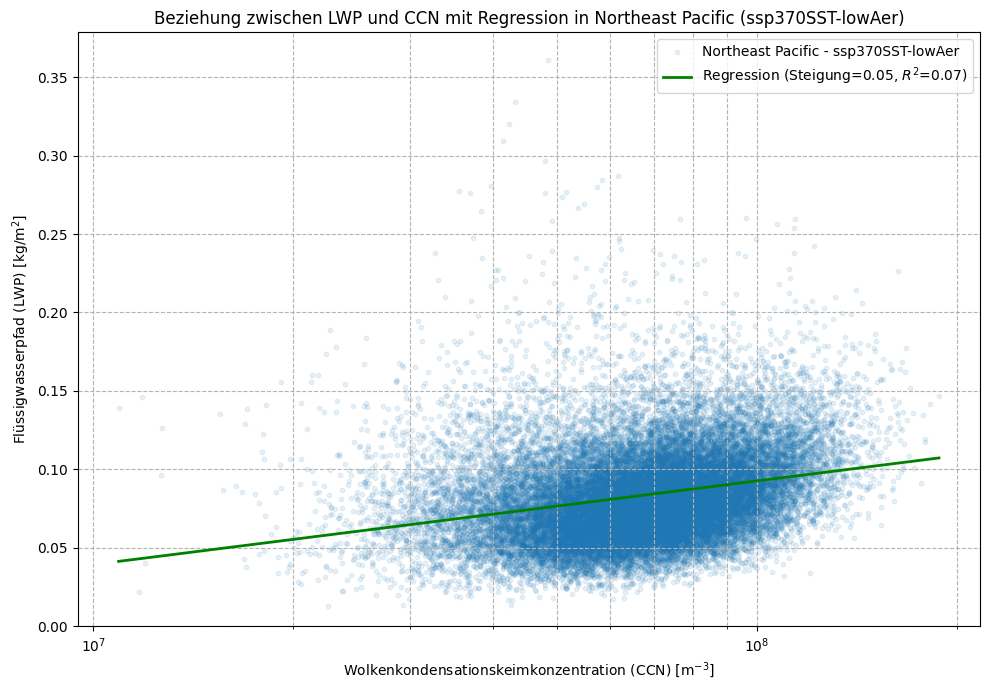


Analyse für ssp370SST-lowAer in 'Northeast Pacific' abgeschlossen.


In [ ]:
region_name = 'Northeast Pacific' # Region ändern
coords = regions[region_name]

# Verwende das Dataset für das ssp370SST-lowAer Experiment
lwp_current_experiment_region = ds_ssp370SST_lowAer['lwp'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])
ccn_current_experiment_region = ds_ssp370SST_lowAer['ccn'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])

lwp_flat = lwp_current_experiment_region.values.flatten()
ccn_flat = ccn_current_experiment_region.values.flatten()

valid_indices = ~np.isnan(lwp_flat) & ~np.isnan(ccn_flat)

lwp_clean = lwp_flat[valid_indices]
ccn_clean = ccn_flat[valid_indices]

ccn_log_clean = np.log10(ccn_clean[ccn_clean > 0])
lwp_for_log_ccn = lwp_clean[ccn_clean > 0]

if len(ccn_log_clean) > 1: # Regression benötigt mindestens 2 Punkte
    slope, intercept, r_value, p_value_reg, stderr = stats.linregress(ccn_log_clean, lwp_for_log_ccn)

    r_squared = r_value**2
    print(f"  Steigung (Slope): {slope:.4f}")
    print(f"  Achsenabschnitt (Intercept): {intercept:.4f}")
    print(f"  R-squared (R²): {r_squared:.4f}")
    print(f"  P-Wert der Regression: {p_value_reg:.3e}")
    print(f"  Standardfehler der Steigung: {stderr:.4f}")

    # --- Regression auf dem Scatter Plot hinzufügen ---
    plt.figure(figsize=(10, 7))
    # Label und Titel anpassen
    plt.scatter(ccn_clean, lwp_clean, alpha=0.1, s=10, label=f'{region_name} - ssp370SST-lowAer') # Experiment-Label anpassen

    # Erstelle eine Linie für die Regression im log-Skala-Raum
    # Verwende den Bereich der BEOBACHTETEN CCN-Werte für die Regressionslinie
    ccn_line = np.sort(ccn_clean[ccn_clean > 0])
    ccn_line_log10 = np.log10(ccn_line)
    lwp_line = slope * ccn_line_log10 + intercept

    # Zeichne die Regressionslinie
    plt.plot(ccn_line, lwp_line, color='green', linewidth=2,
             label=f'Regression (Steigung={slope:.2f}, $R^2$={r_squared:.2f})')

    # Achsenlimits anpassen, um negative LWP-Werte nicht zu zeigen, wenn nicht nötig
    plt.ylim(bottom=0)

    plt.xlabel('Wolkenkondensationskeimkonzentration (CCN) [m$^{-3}$]')
    plt.ylabel('Flüssigwasserpfad (LWP) [kg/m$^2$]')
    # Titel anpassen
    plt.title(f'Beziehung zwischen LWP und CCN mit Regression in {region_name} (ssp370SST-lowAer)') # Titel anpassen
    plt.xscale('log')
    plt.grid(True, which="both", ls="--", c='0.7')
    plt.legend()
    plt.tight_layout()
    # Dateiname anpassen
    #plot_filename_reg = f'scatter_lwp_ccn_regression_ssp370SST-lowAer_{region_name.replace(" ", "_")}.png' # Dateiname anpassen
    #plt.savefig(plot_filename_reg)
    #plt.close()
    plt.show()

print(f"\nAnalyse für ssp370SST-lowAer in '{region_name}' abgeschlossen.") # Letzte Ausgabe anpassen

#Regressionen und Plots für beide Regionen und Experimente zur Übersicht


Verarbeite ssp370SST in Southeast Pacific...

Verarbeite ssp370SST-lowAer in Southeast Pacific...

Verarbeite ssp370SST in Northeast Pacific...

Verarbeite ssp370SST-lowAer in Northeast Pacific...


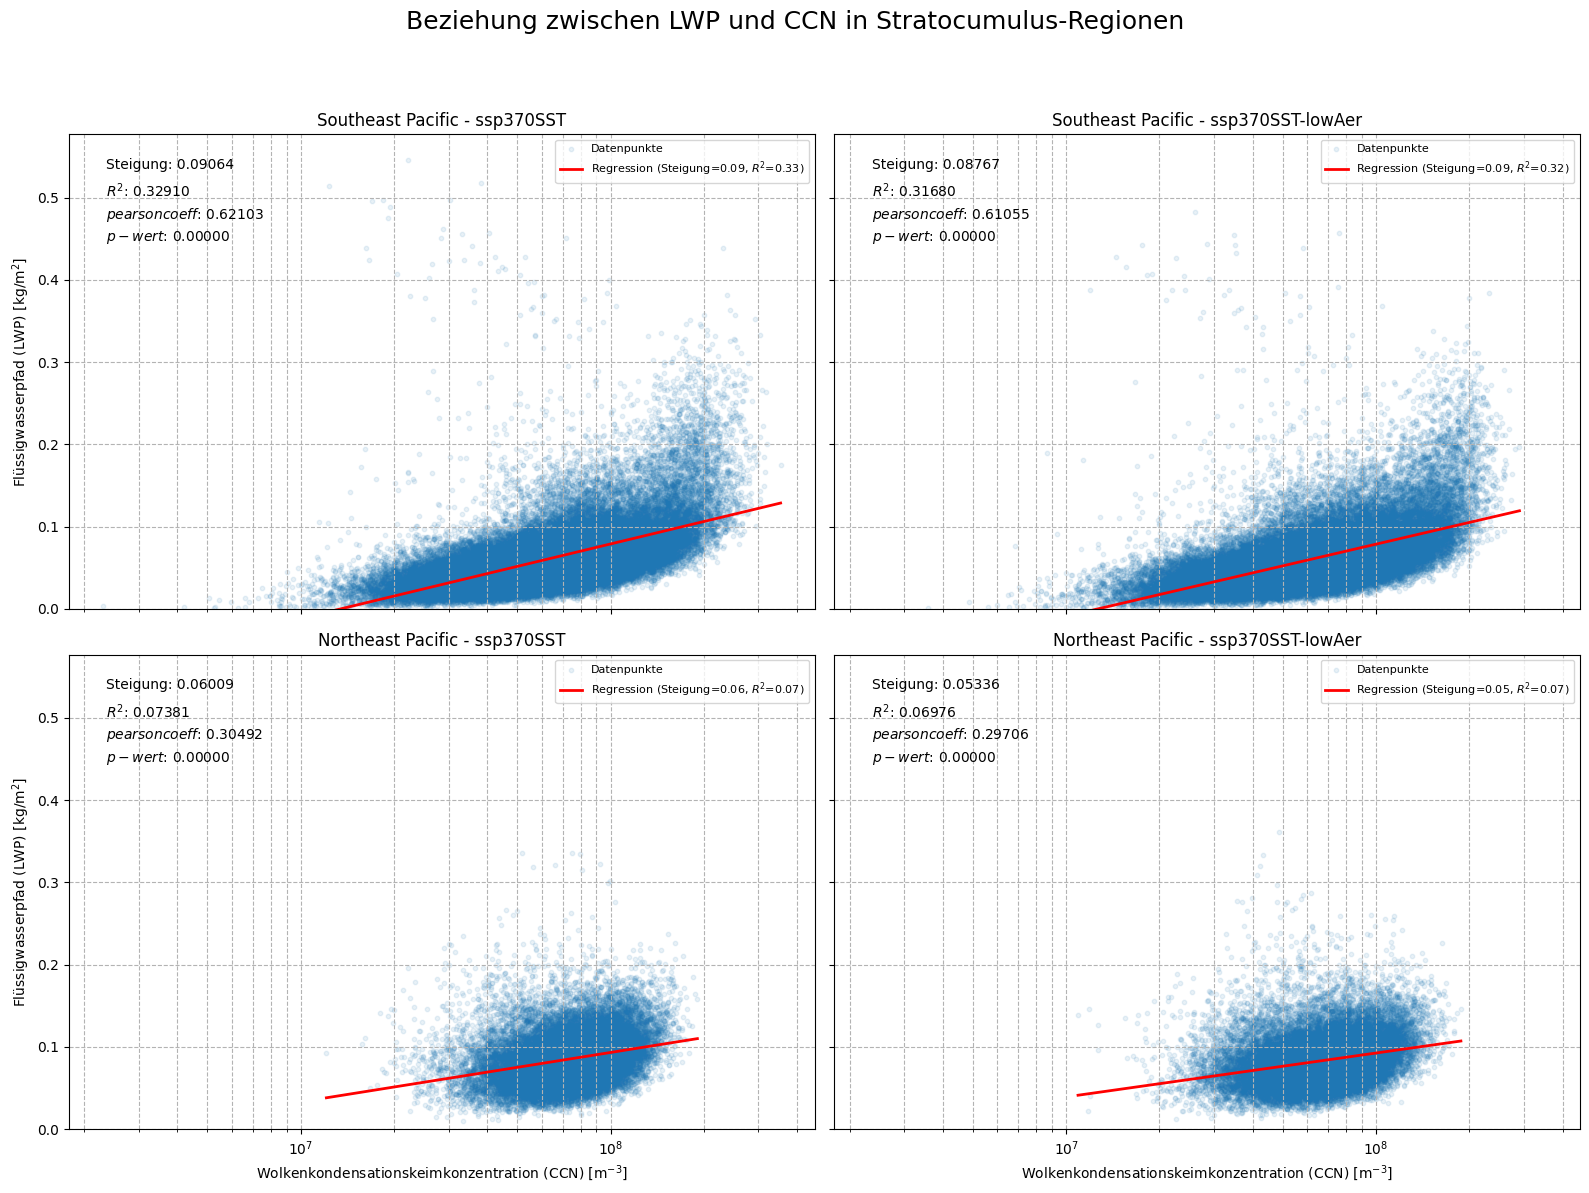

Alle Analysen abgeschlossen.


<Figure size 640x480 with 0 Axes>

In [ ]:

# --- Experimente zum Iterieren ---
experiments = {
    'ssp370SST': ds_ssp370SST,
    'ssp370SST-lowAer': ds_ssp370SST_lowAer
}
# --- Erstelle die 2x2 Plot-Figur ---
# Eine Figur und 4 Subplots in einem 2x2 Raster
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)
fig.suptitle('Beziehung zwischen LWP und CCN in Stratocumulus-Regionen', fontsize=18, y=1.02) # Haupttitel

# Ordne die Regionen und Experimente den Subplots zu
plot_order = [
    ('Southeast Pacific', 'ssp370SST'),
    ('Southeast Pacific', 'ssp370SST-lowAer'),
    ('Northeast Pacific', 'ssp370SST'),
    ('Northeast Pacific', 'ssp370SST-lowAer')
]

# Flache die 'axes'-Array ab, um einfacher darauf zugreifen zu können (0,0), (0,1), (1,0), (1,1)
axes_flat = axes.flatten()

# --- Iteriere durch Regionen und Experimente und erstelle Subplots ---
for i, (region_name, exp_name) in enumerate(plot_order):
    ax = axes_flat[i] # Wähle den aktuellen Subplot
    ds_current = experiments[exp_name] # Wähle das aktuelle Dataset

    print(f"\nVerarbeite {exp_name} in {region_name}...")

    # 1. Daten für die spezifische Region auswählen
    coords = regions[region_name]
    lwp_region = ds_current['lwp'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])
    ccn_region = ds_current['ccn'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])

    # 2. Daten abflachen und fehlende Werte (NaNs) entfernen
    lwp_flat = lwp_region.values.flatten()
    ccn_flat = ccn_region.values.flatten()

    valid_indices = ~np.isnan(lwp_flat) & ~np.isnan(ccn_flat)
    lwp_clean = lwp_flat[valid_indices]
    ccn_clean = ccn_flat[valid_indices]

    # Transformiere CCN auf eine logarithmische Skala für die Regression
    ccn_log_clean = np.log10(ccn_clean[ccn_clean > 0])
    lwp_for_log_ccn = lwp_clean[ccn_clean > 0]

    # 3. Scatter Plot erstellen
    ax.scatter(ccn_clean, lwp_clean, alpha=0.1, s=10, label=f'Datenpunkte')

    # 4. Lineare Regression durchführen
    if len(ccn_log_clean) > 1: # Sicherstellen, dass genügend Daten für Regression vorhanden sind
        slope, intercept, r_value, p_value_reg, stderr = stats.linregress(ccn_log_clean, lwp_for_log_ccn)
        r_squared = r_value**2
        correlation_coefficient, p_value = stats.pearsonr(ccn_clean, lwp_clean)
        # --- 4.1 Pearson-Korrelationskoeffizienten berechnen ---
#stats.pearsonr(ccn_clean, lwp_clean) gibt zwei werte zurück:
#correlation_coeffcicient: der r-Wert, der die stärke und richtung der linearen korrelation angibt (-1 bis 1)
#p_value: gibt an, wie wahrscheinlich es ist, dass man eine so starke oder störkere korrlation zufällig beobachten würde, wenn es in realität keine korrelation gäbe.
#p-wert kleiner 0.05 (oder 0.01) statistisch signifikant


        # 5. Regressionslinie hinzufügen
        # Erstelle eine Linie für die Regression im log-Skala-Raum
        ccn_line = np.sort(ccn_clean[ccn_clean > 0])
        ccn_line_log10 = np.log10(ccn_line)
        lwp_line = slope * ccn_line_log10 + intercept

        ax.plot(ccn_line, lwp_line, color='red', linewidth=2,
                label=f'Regression (Steigung={slope:.2f}, $R^2$={r_squared:.2f})')

        # Füge die Steigung und R² direkt in den Plot ein
        ax.text(0.05, 0.95, f'Steigung: {slope:.5f}', transform=ax.transAxes, fontsize=10, verticalalignment='top')
        ax.text(0.05, 0.90, f'$R^2$: {r_squared:.5f}', transform=ax.transAxes, fontsize=10, verticalalignment='top')
        ax.text(0.05, 0.85, f'$pearson coeff$: {correlation_coefficient:.5f}', transform=ax.transAxes, fontsize=10, verticalalignment='top')
        ax.text(0.05, 0.80, f'$p-wert$: {p_value_reg:.5f}', transform=ax.transAxes, fontsize=10, verticalalignment='top')


    # --- Subplot-Einstellungen ---
    ax.set_title(f'{region_name} - {exp_name}')
    ax.set_xscale('log') # CCN-Achse logarithmisch skalieren
    ax.grid(True, which="both", ls="--", c='0.7')
    ax.legend(fontsize=8)
    ax.set_ylim(bottom=0) # LWP-Achse bei 0 starten

    # Achsenbeschriftungen nur an den äußeren Rändern
    if i % 2 == 0: # Linke Spalte
        ax.set_ylabel('Flüssigwasserpfad (LWP) [kg/m$^2$]')
    if i >= 2: # Untere Reihe
        ax.set_xlabel('Wolkenkondensationskeimkonzentration (CCN) [m$^{-3}$]')

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Anpassung für Suptitle und Achsenbeschriftungen
plt.show()
plot_filename = 'combined_lwp_ccn_regression_2x2.png'
plt.savefig(plot_filename, dpi=300) # Speichere in höherer Auflösung
plt.close(fig)

#print(f"Kombinierter Plot '{plot_filename}' erfolgreich erstellt und gespeichert.")
print("Alle Analysen abgeschlossen.")


Verarbeite ssp370SST in Southeast Pacific...

Verarbeite ssp370SST-lowAer in Southeast Pacific...

Verarbeite ssp370SST in Northeast Pacific...

Verarbeite ssp370SST-lowAer in Northeast Pacific...


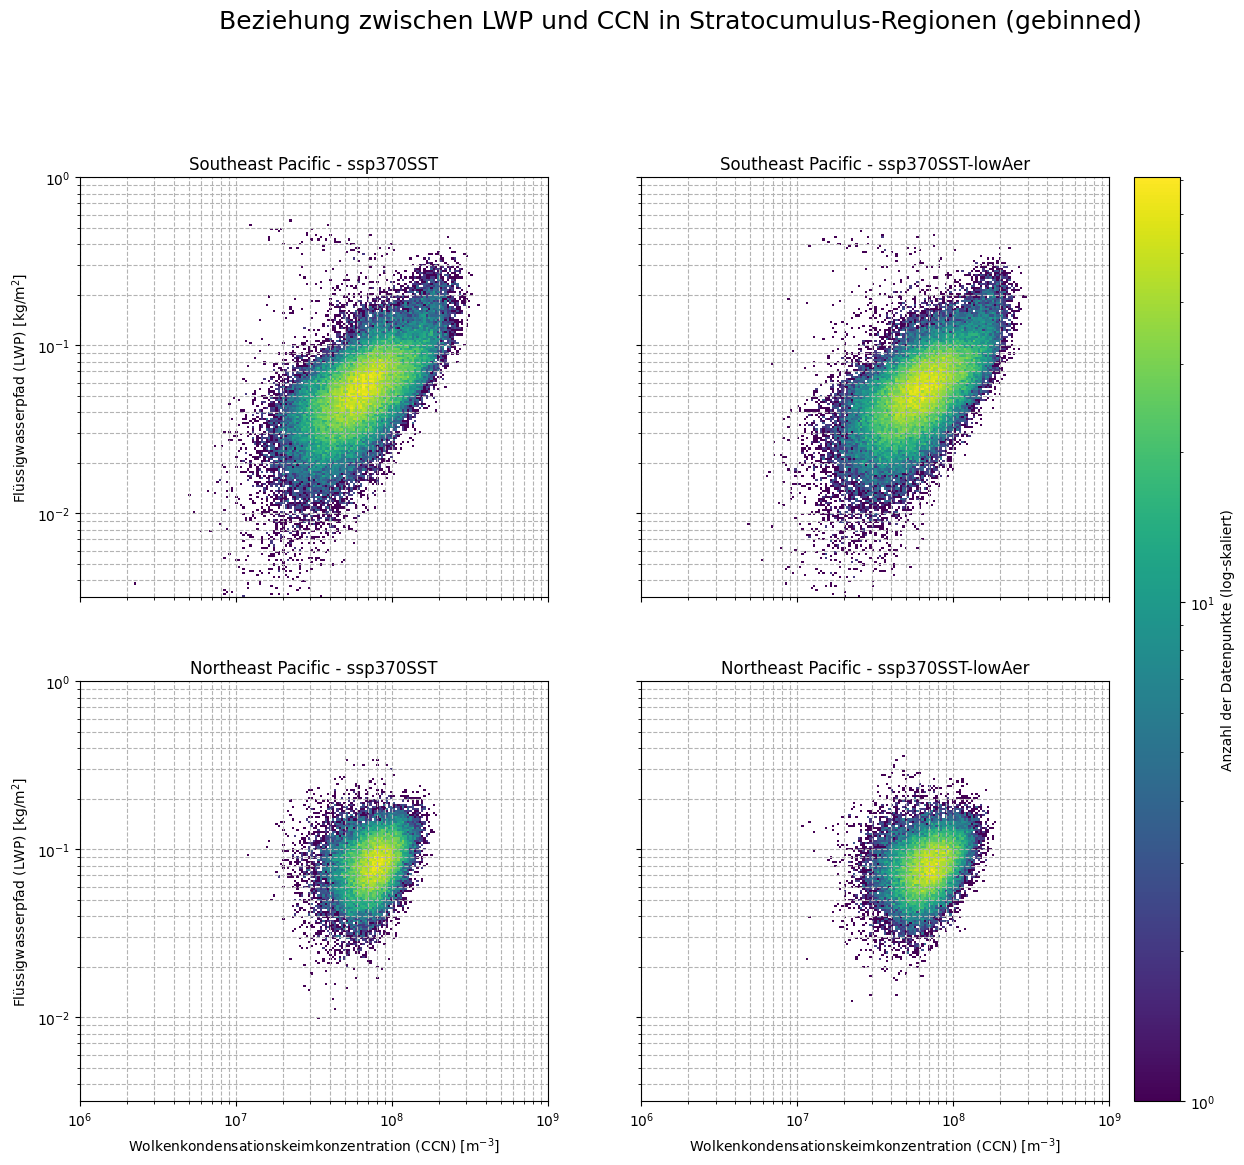

In [ ]:
# --- Erstelle die 2x2 Plot-Figur ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)
fig.suptitle('Beziehung zwischen LWP und CCN in Stratocumulus-Regionen (gebinned)', fontsize=18, y=1.02) # Haupttitel anpassen

# Ordne die Regionen und Experimente den Subplots zu
plot_order = [
    ('Southeast Pacific', 'ssp370SST'),
    ('Southeast Pacific', 'ssp370SST-lowAer'),
    ('Northeast Pacific', 'ssp370SST'),
    ('Northeast Pacific', 'ssp370SST-lowAer')
]

axes_flat = axes.flatten()

# --- Globale Bins für gebinnte Plots definieren (um Konsistenz zu gewährleisten) ---
# CCN (x-Achse): Logarithmisch
# LWP (y-Achse): Logarithmisch
ccn_bins = np.logspace(6, 9, 200) # Von 1 bis 10^4 (10000) m^-3, 500 Bins
# LWP kann sehr klein sein, aber nicht Null. Untergrenze für Log-Skala
lwp_bins = np.logspace(-2.5, 0, 200) # Von 10^-4 bis 10^0 (1) kg/m^2, 500 Bins


# --- Iteriere durch Regionen und Experimente und erstelle Subplots ---
for i, (region_name, exp_name) in enumerate(plot_order):
    ax = axes_flat[i]
    ds_current = experiments[exp_name]

    print(f"\nVerarbeite {exp_name} in {region_name}...")

    # 1. Daten für die spezifische Region auswählen
    coords = regions[region_name]
    lwp_region = ds_current['lwp'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])
    ccn_region = ds_current['ccn'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])

    # 2. Daten abflachen und fehlende Werte (NaNs) entfernen
    lwp_flat = lwp_region.values.flatten()
    ccn_flat = ccn_region.values.flatten()

    # Maske für gültige (nicht-NaN) und POSITIVE CCN/LWP-Werte für Log-Skala
    valid_mask = ~np.isnan(lwp_flat) & ~np.isnan(ccn_flat) & (ccn_flat > 0) & (lwp_flat > 0)
    lwp_clean = lwp_flat[valid_mask]
    ccn_clean = ccn_flat[valid_mask]

    # --- 3. Gebinnter Plot (2D-Histogramm) erstellen ---
    # norm=LogNorm() für die Farbintensität (Dichte) der Bins
    h = ax.hist2d(ccn_clean, lwp_clean, bins=[ccn_bins, lwp_bins], cmap='viridis', norm=LogNorm())

    # --- Subplot-Einstellungen ---
    ax.set_title(f'{region_name} - {exp_name}')
    ax.set_xscale('log') # CCN-Achse logarithmisch skalieren
    ax.set_yscale('log') # LWP-Achse logarithmisch skalieren
    ax.grid(True, which="both", ls="--", c='0.7')

    # Setze explizite Achsenlimits basierend auf den definierten Bins
    ax.set_xlim(ccn_bins.min(), ccn_bins.max())
    ax.set_ylim(lwp_bins.min(), lwp_bins.max())

    # Achsenbeschriftungen nur an den äußeren Rändern
    if i % 2 == 0: # Linke Spalte
        ax.set_ylabel('Flüssigwasserpfad (LWP) [kg/m$^2$]')
    if i >= 2: # Untere Reihe
        ax.set_xlabel('Wolkenkondensationskeimkonzentration (CCN) [m$^{-3}$]')

# Füge eine Colorbar für die Heatmaps hinzu (eine für alle Subplots)
fig.colorbar(h[3], ax=axes_flat.tolist(), label='Anzahl der Datenpunkte (log-skaliert)', orientation='vertical', pad=0.02)

#plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

# Wenn Sie den Plot speichern möchten, entfernen Sie die Kommentarzeichen der folgenden Zeilen:
# plot_filename = 'combined_lwp_ccn_binned_2x2_log_axes.png'
# plt.savefig(plot_filename, dpi=300)
# plt.close(fig)


# Tests zu Signifikanz
wie viel unterschied zwischen den experimenten überhaupt besteht

Verarbeite LWP Verteilung für Southeast Pacific...
Verarbeite LWP Verteilung für Northeast Pacific...


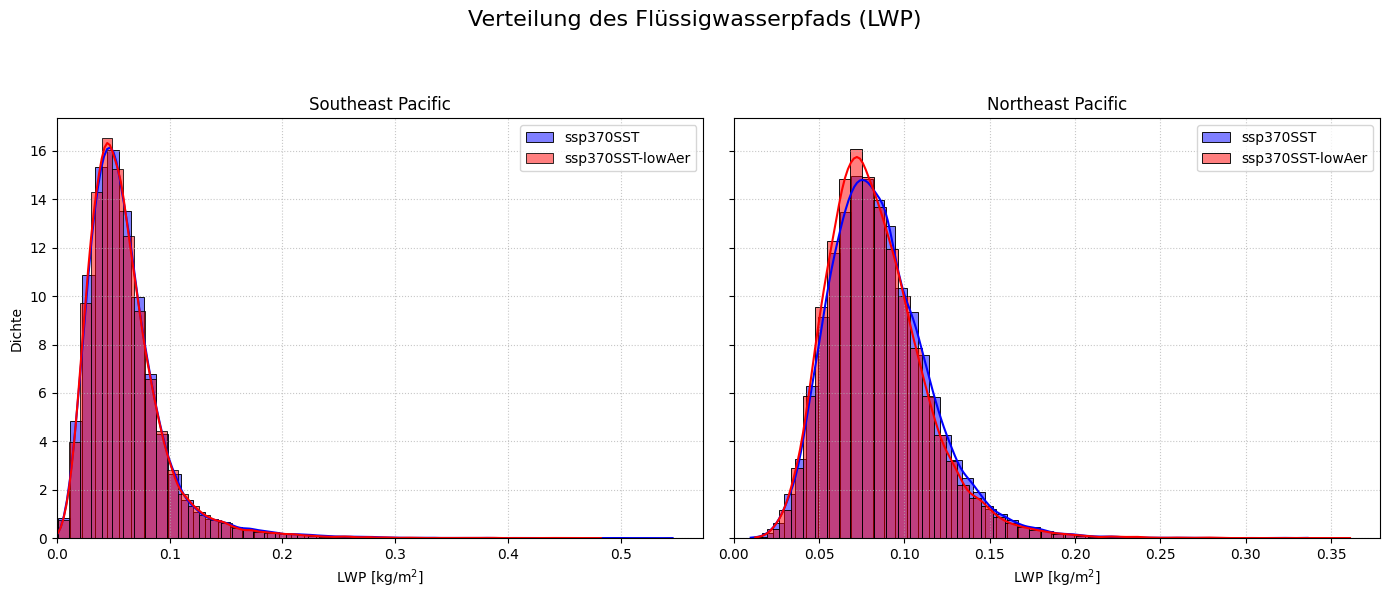

Verarbeite CCN Verteilung für Southeast Pacific...
Verarbeite CCN Verteilung für Northeast Pacific...


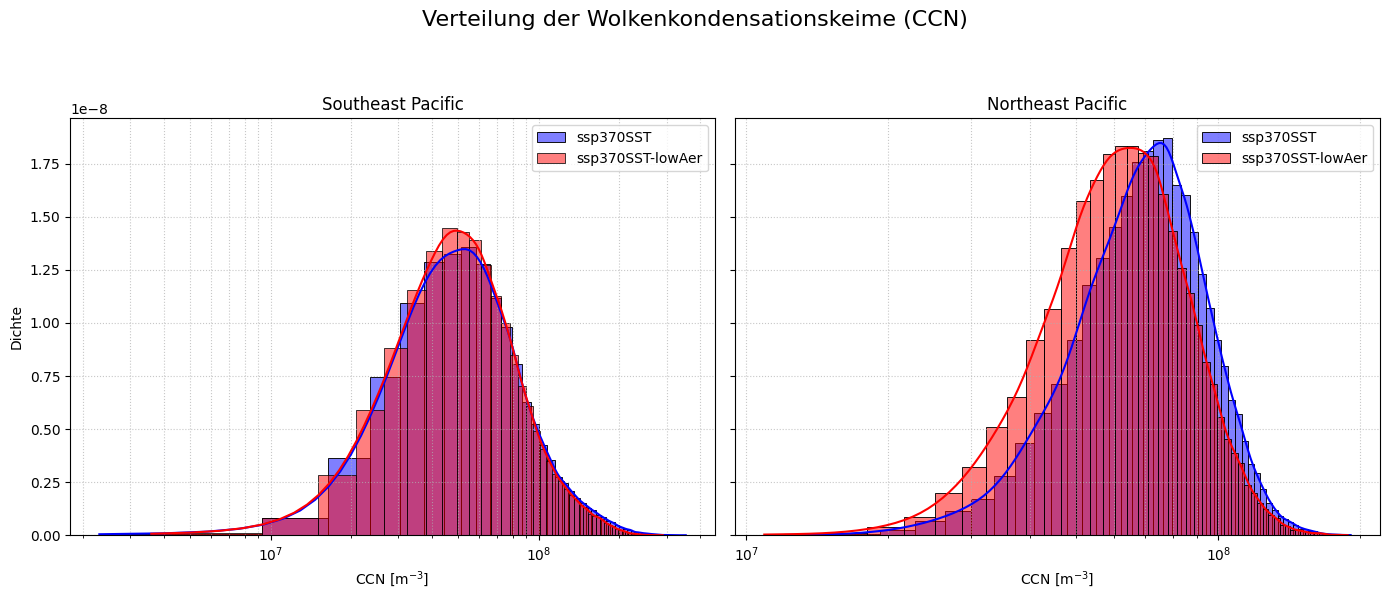


Alle Verteilungs-Analysen abgeschlossen.


In [ ]:
######test
# --- LWP Verteilungen ---
fig_lwp, axes_lwp = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig_lwp.suptitle('Verteilung des Flüssigwasserpfads (LWP)', fontsize=16, y=1.02)
axes_lwp_flat = axes_lwp.flatten()

for i, region_name in enumerate(regions.keys()):
    ax = axes_lwp_flat[i]
    print(f"Verarbeite LWP Verteilung für {region_name}...")

    # Daten für ssp370SST
    lwp_ssp370SST_region = experiments['ssp370SST']['lwp'].sel(
        lat=regions[region_name]['lat_slice'], lon=regions[region_name]['lon_slice']
    ).values.flatten()
    lwp_ssp370SST_clean = lwp_ssp370SST_region[~np.isnan(lwp_ssp370SST_region)]

    # Daten für ssp370SST-lowAer
    lwp_ssp370SST_lowAer_region = experiments['ssp370SST-lowAer']['lwp'].sel(
        lat=regions[region_name]['lat_slice'], lon=regions[region_name]['lon_slice']
    ).values.flatten()
    lwp_ssp370SST_lowAer_clean = lwp_ssp370SST_lowAer_region[~np.isnan(lwp_ssp370SST_lowAer_region)]

    # Histogramm/KDE plotten
    sns.histplot(lwp_ssp370SST_clean, ax=ax, color='blue', label='ssp370SST', kde=True, stat='density', bins=50)
    sns.histplot(lwp_ssp370SST_lowAer_clean, ax=ax, color='red', label='ssp370SST-lowAer', kde=True, stat='density', bins=50)

    ax.set_title(region_name)
    ax.set_xlabel('LWP [kg/m$^2$]')
    ax.set_ylabel('Dichte')
    ax.legend()
    ax.grid(True, linestyle=':', alpha=0.7)
    ax.set_xlim(left=0) # LWP kann nicht negativ sein

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()
#plot_filename_lwp_dist = 'lwp_distributions.png'
#plt.savefig(plot_filename_lwp_dist, dpi=300)
#plt.close(fig_lwp)
#print(f"Plot '{plot_filename_lwp_dist}' erfolgreich erstellt und gespeichert.")


# --- CCN Verteilungen ---
fig_ccn, axes_ccn = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig_ccn.suptitle('Verteilung der Wolkenkondensationskeime (CCN)', fontsize=16, y=1.02)
axes_ccn_flat = axes_ccn.flatten()

for i, region_name in enumerate(regions.keys()):
    ax = axes_ccn_flat[i]
    print(f"Verarbeite CCN Verteilung für {region_name}...")

    # Daten für ssp370SST
    ccn_ssp370SST_region = experiments['ssp370SST']['ccn'].sel(
        lat=regions[region_name]['lat_slice'], lon=regions[region_name]['lon_slice']
    ).values.flatten()
    ccn_ssp370SST_clean = ccn_ssp370SST_region[~np.isnan(ccn_ssp370SST_region) & (ccn_ssp370SST_region > 0)]

    # Daten für ssp370SST-lowAer
    ccn_ssp370SST_lowAer_region = experiments['ssp370SST-lowAer']['ccn'].sel(
        lat=regions[region_name]['lat_slice'], lon=regions[region_name]['lon_slice']
    ).values.flatten()
    ccn_ssp370SST_lowAer_clean = ccn_ssp370SST_lowAer_region[~np.isnan(ccn_ssp370SST_lowAer_region) & (ccn_ssp370SST_lowAer_region > 0)]

    # Histogramm/KDE plotten
    sns.histplot(ccn_ssp370SST_clean, ax=ax, color='blue', label='ssp370SST', kde=True, stat='density', bins=50)
    sns.histplot(ccn_ssp370SST_lowAer_clean, ax=ax, color='red', label='ssp370SST-lowAer', kde=True, stat='density', bins=50)

    ax.set_title(region_name)
    ax.set_xlabel('CCN [m$^{-3}$]')
    ax.set_ylabel('Dichte')
    ax.set_xscale('log') # CCN oft logarithmisch darstellen
    ax.legend()
    ax.grid(True, which="both", linestyle=':', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()
#plot_filename_ccn_dist = 'ccn_distributions.png'
#plt.savefig(plot_filename_ccn_dist, dpi=300)
#plt.close(fig_ccn)
#print(f"Plot '{plot_filename_ccn_dist}' erfolgreich erstellt und gespeichert.")

print("\nAlle Verteilungs-Analysen abgeschlossen.")



Erstelle Verteilungs-Plots für CCN...
Verarbeite CCN Verteilung für Southeast Pacific...
Verarbeite CCN Verteilung für Northeast Pacific...


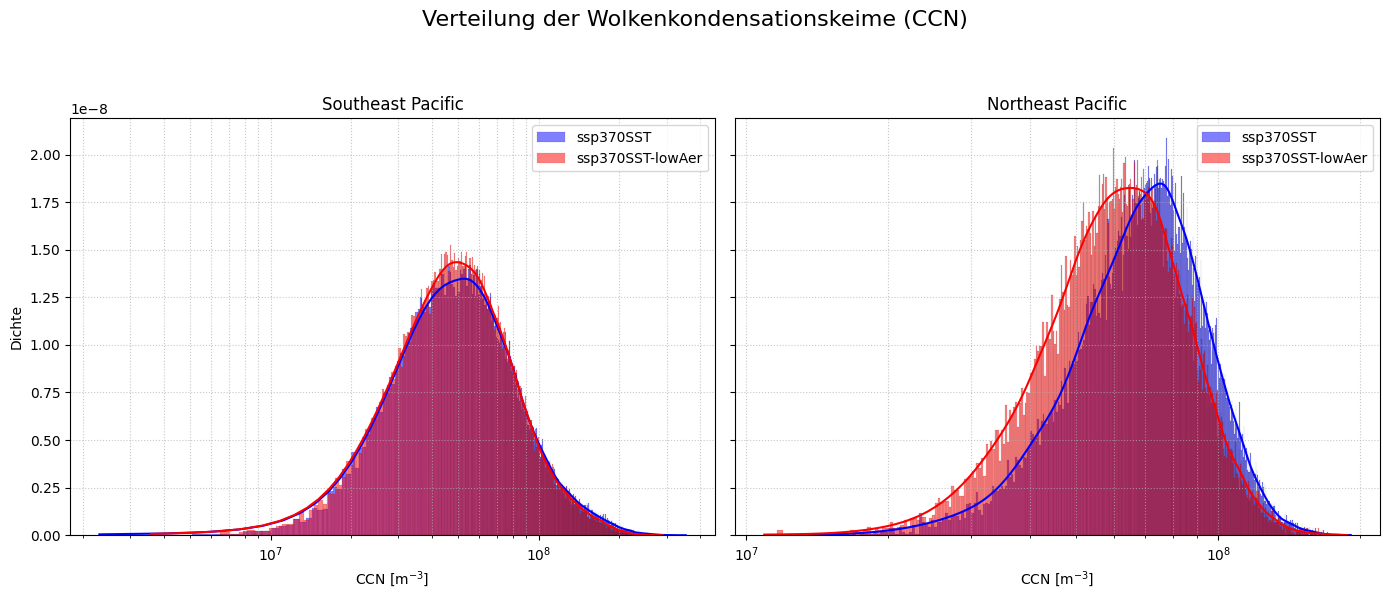


Alle Verteilungs-Analysen abgeschlossen.


In [ ]:
# --- CCN Verteilungen ---
print("\nErstelle Verteilungs-Plots für CCN...")

fig_ccn, axes_ccn = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig_ccn.suptitle('Verteilung der Wolkenkondensationskeime (CCN)', fontsize=16, y=1.02)
axes_ccn_flat = axes_ccn.flatten()

for i, region_name in enumerate(regions.keys()):
    ax = axes_ccn_flat[i]
    print(f"Verarbeite CCN Verteilung für {region_name}...")

    # Daten für ssp370SST
    ccn_ssp370SST_region = experiments['ssp370SST']['ccn'].sel(
        lat=regions[region_name]['lat_slice'], lon=regions[region_name]['lon_slice']
    ).values.flatten()
    ccn_ssp370SST_clean = ccn_ssp370SST_region[~np.isnan(ccn_ssp370SST_region) & (ccn_ssp370SST_region > 0)]

    # Daten für ssp370SST-lowAer
    ccn_ssp370SST_lowAer_region = experiments['ssp370SST-lowAer']['ccn'].sel(
        lat=regions[region_name]['lat_slice'], lon=regions[region_name]['lon_slice']
    ).values.flatten()
    ccn_ssp370SST_lowAer_clean = ccn_ssp370SST_lowAer_region[~np.isnan(ccn_ssp370SST_lowAer_region) & (ccn_ssp370SST_lowAer_region > 0)]

    # Histogramm/KDE plotten
    sns.histplot(ccn_ssp370SST_clean, ax=ax, color='blue', label='ssp370SST', kde=True, stat='density', bins=500)
    sns.histplot(ccn_ssp370SST_lowAer_clean, ax=ax, color='red', label='ssp370SST-lowAer', kde=True, stat='density', bins=500)

    ax.set_title(region_name)
    ax.set_xlabel('CCN [m$^{-3}$]')
    ax.set_ylabel('Dichte')
    ax.set_xscale('log') # CCN oft logarithmisch darstellen
    ax.legend()
    ax.grid(True, which="both", linestyle=':', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()
#plot_filename_ccn_dist = 'ccn_distributions.png'
#plt.savefig(plot_filename_ccn_dist, dpi=300)
#plt.close(fig_ccn)
#print(f"Plot '{plot_filename_ccn_dist}' erfolgreich erstellt und gespeichert.")

print("\nAlle Verteilungs-Analysen abgeschlossen.")


# Räumliche Verteilung des LWP


Erstelle Plots für LWP in den definierten Regionen in einem 2x2 Grid...
Globaler LWP-Bereich für Plots: vmin=0.02, vmax=0.11
Plotting LWP für ssp370SST in Southeast Pacific auf Subplot 1...
Plotting LWP für ssp370SST-lowAer in Southeast Pacific auf Subplot 2...
Plotting LWP für ssp370SST in Northeast Pacific auf Subplot 3...
Plotting LWP für ssp370SST-lowAer in Northeast Pacific auf Subplot 4...


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/tmp/ipython-input-21-144083135.py:126: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results

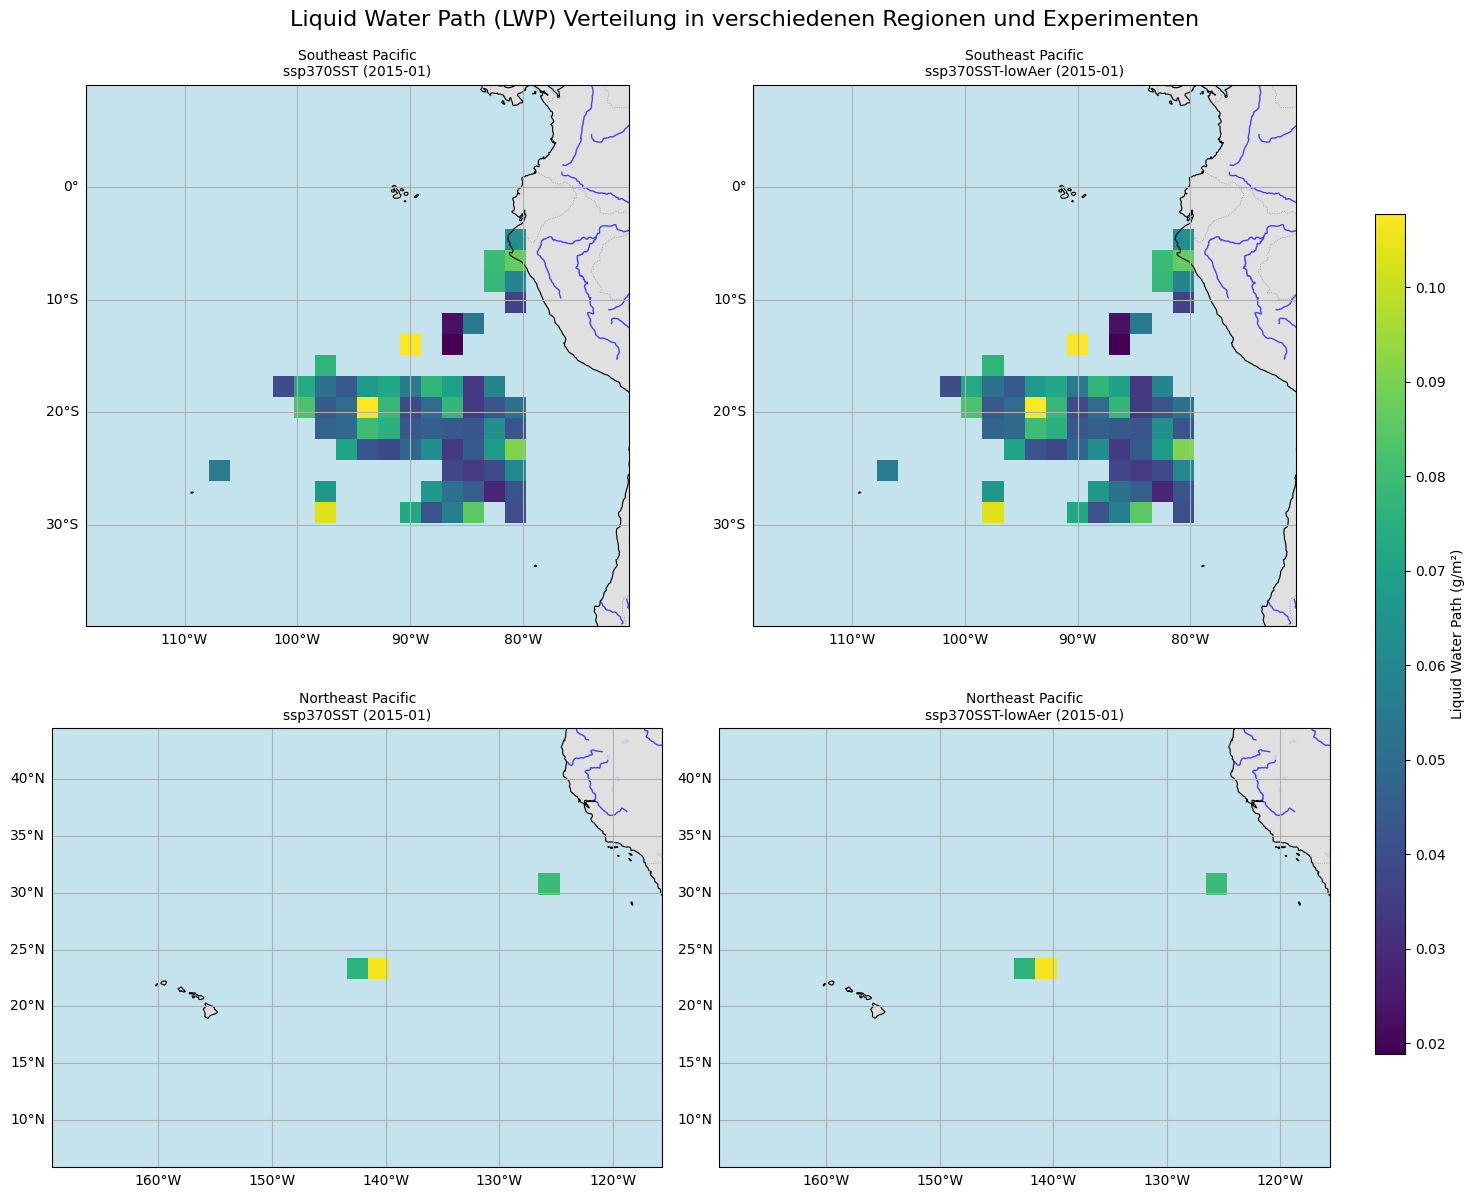


Alle LWP-Karten wurden in einem 2x2 Grid generiert.


In [ ]:
# --- Plotting-Funktion ---
def plot_lwp_on_map(ax, data_array, region_name, exp_name, time_index=0, vmin=None, vmax=None, zoom_buffer=5):
    """
    Plottet den Liquid Water Path (LWP) für eine bestimmte Region auf einer Karte auf einer gegebenen Achse.
    Verwendet die ursprüngliche Auflösung der Daten und die Festlegung eines gemeinsamen Farbbereichs.
    Ermöglicht das Hinzufügen eines Puffers für den Kartenausschnitt, um "herauszuzoomen".

    Args:
        ax (matplotlib.axes.Axes): Die Achse, auf der geplottet werden soll.
        data_array (xr.DataArray): Das LWP DataArray für die Region (vor der räumlichen Mittelung).
                                   Sollte Dimensionen 'time', 'lat', 'lon' haben.
        region_name (str): Der Name der Region (z.B. 'Southeast Pacific').
        exp_name (str): Der Name des Experiments (z.B. 'ssp370SST').
        time_index (int): Der Index des Zeitpunkts, der geplottet werden soll.
                          Standardmäßig wird der erste Zeitpunkt (Index 0) verwendet.
        vmin (float, optional): Der minimale Wert für die Farbskala. Wenn None, wird er automatisch bestimmt.
        vmax (float, optional): Der maximale Wert für die Farbskala. Wenn None, wird er automatisch bestimmt.
        zoom_buffer (int/float): Gradzahl, um die der Kartenausschnitt über die Region hinaus erweitert wird.
                                 Ein größerer Wert zoomt weiter heraus. Standard ist 5 Grad.
    """
    # Wähle einen spezifischen Zeitpunkt zum Plotten aus den Daten
    lwp_to_plot = data_array.isel(time=time_index)

    # Extrahiere Längen- und Breitengrade der zu plottenden Daten
    lons = lwp_to_plot.lon.values
    lats = lwp_to_plot.lat.values

    # Bestimme den minimalen und maximalen Längen- und Breitengrad für den Kartenausschnitt
    # Füge den zoom_buffer hinzu, um herauszuzoomen
    min_lon_plot = lons.min() - zoom_buffer
    max_lon_plot = lons.max() + zoom_buffer
    min_lat_plot = lats.min() - zoom_buffer
    max_lat_plot = lats.max() + zoom_buffer

    # Füge verschiedene geografische Features zur Karte hinzu, um einen Hintergrund zu schaffen
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8, edgecolor='black') # Küstenlinien
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='gray') # Landesgrenzen
    ax.add_feature(cfeature.OCEAN, color='lightblue', alpha=0.7) # Ozeane
    ax.add_feature(cfeature.LAND, color='lightgray', alpha=0.7) # Landmassen
    ax.add_feature(cfeature.LAKES, color='lightblue', alpha=0.7) # Seen
    ax.add_feature(cfeature.RIVERS, color='blue', alpha=0.7) # Flüsse

    # Setze den sichtbaren Bereich der Karte
    # Cartopy erwartet [lon_min, lon_max, lat_min, lat_max] für set_extent.
    # Das crs=ccrs.PlateCarree() gibt an, dass diese Koordinaten in Längen- und Breitengraden sind.
    ax.set_extent([min_lon_plot, max_lon_plot, min_lat_plot, max_lat_plot], crs=ccrs.PlateCarree())

    # Plotten der LWP-Daten auf der Karte
    # Verwende vmin und vmax für eine gemeinsame Farbskala
    mesh = lwp_to_plot.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                       cmap='viridis', add_colorbar=False,
                                       vmin=vmin, vmax=vmax)

    # Füge Gitterlinien (für Längen- und Breitengrade) und Beschriftungen hinzu
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False # Beschriftungen oben ausblenden
    gl.right_labels = False # Beschriftungen rechts ausblenden

    # Erstelle den Titel des Plots
    title_time = lwp_to_plot.time.dt.strftime("%Y-%m").item()
    ax.set_title(f'{region_name}\n{exp_name} ({title_time})', fontsize=10)

    return mesh # Rückgabe des Mesh-Objekts für die Farbskala


# --- Schleife zum Plotten der LWP-Daten für jede Region und jedes Experiment in einem 2x2 Grid ---
print("\nErstelle Plots für LWP in den definierten Regionen in einem 2x2 Grid...")

# Sammle alle LWP-Daten für die Bestimmung des globalen vmin/vmax
all_lwp_data_for_range = []

# Iteriere einmal, um alle relevanten DataArrays zu sammeln
for region_name, coords in regions.items():
    for exp_name, ds in [('ssp370SST', ds_ssp370SST), ('ssp370SST-lowAer', ds_ssp370SST_lowAer)]:
        lwp_region_data = ds['lwp'].sel(lat=coords['lat_slice'], lon=coords['lon_slice']).isel(time=0)
        all_lwp_data_for_range.append(lwp_region_data)

# Bestimme den globalen minimalen und maximalen LWP-Wert über alle gesammelten Daten
# Verwende .compute().item(), um Dask-Arrays zu verarbeiten
global_vmin = min(data.min().compute().item() for data in all_lwp_data_for_range if not np.isnan(data.min().compute().item()))
global_vmax = max(data.max().compute().item() for data in all_lwp_data_for_range if not np.isnan(data.max().compute().item()))

print(f"Globaler LWP-Bereich für Plots: vmin={global_vmin:.2f}, vmax={global_vmax:.2f}")


# Erstelle eine einzige Figur mit 2 Reihen und 2 Spalten von Subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12),
                         subplot_kw={'projection': ccrs.PlateCarree()}) # Setze Projektion für alle Subplots

# Flache das Array der Achsen ab, um einfacher darüber zu iterieren
axes = axes.flatten()

# Eine Liste, um die Mesh-Objekte zu speichern, um eine gemeinsame Farbskala zu erstellen
all_meshes = []

# Zähler für die Subplots
plot_idx = 0

# Iteriere durch die definierten Regionen
for region_name, coords in regions.items():
    # Iteriere durch die beiden Datensätze (Experimente)
    for exp_name, ds in [('ssp370SST', ds_ssp370SST), ('ssp370SST-lowAer', ds_ssp370SST_lowAer)]:
        print(f"Plotting LWP für {exp_name} in {region_name} auf Subplot {plot_idx + 1}...")
        # Schneide die LWP-Daten für die aktuelle Region aus dem vollständigen Datensatz aus.
        lwp_region_data = ds['lwp'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])

        # Rufe die Plotting-Funktion auf, um die Karte auf dem aktuellen Subplot zu generieren.
        # Übergeben Sie die globalen vmin und vmax.
        # Passen Sie den zoom_buffer an, um mehr oder weniger herauszuzoomen.
        current_mesh = plot_lwp_on_map(axes[plot_idx], lwp_region_data, region_name, exp_name,
                                       time_index=0,
                                       vmin=global_vmin, vmax=global_vmax,
                                       zoom_buffer=10) # Hier können Sie den Wert anpassen
        all_meshes.append(current_mesh)
        plot_idx += 1

# Füge eine gemeinsame Farbskala für alle Plots hinzu
if all_meshes:
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) # [left, bottom, width, height]
    # Die Farbskala wird jetzt mit dem ersten Mesh-Objekt erstellt, das bereits
    # mit den globalen vmin/vmax Werten geplottet wurde.
    cbar = fig.colorbar(all_meshes[0], cax=cbar_ax, orientation='vertical')
    cbar.set_label('Liquid Water Path (g/m²)')


plt.tight_layout(rect=[0, 0, 0.9, 1]) # Passt das Layout an, um Platz für die Farbskala zu lassen
plt.suptitle('Liquid Water Path (LWP) Verteilung in verschiedenen Regionen und Experimenten', fontsize=16, y=1.02) # Haupttitel
plt.show()

print("\nAlle LWP-Karten wurden in einem 2x2 Grid generiert.")


Erstelle Plots für LWP in den definierten Regionen in einem 2x2 Grid...
Globaler LWP-Bereich für Plots: vmin=0.01, vmax=0.18

Generiere Plots für den Zeitpunkt: 2015-01
  Plotting LWP für ssp370SST in Southeast Pacific auf Subplot 1...
  Plotting LWP für ssp370SST-lowAer in Southeast Pacific auf Subplot 2...
  Plotting LWP für ssp370SST in Northeast Pacific auf Subplot 3...
  Plotting LWP für ssp370SST-lowAer in Northeast Pacific auf Subplot 4...


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/tmp/ipython-input-22-193775250.py:150: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results

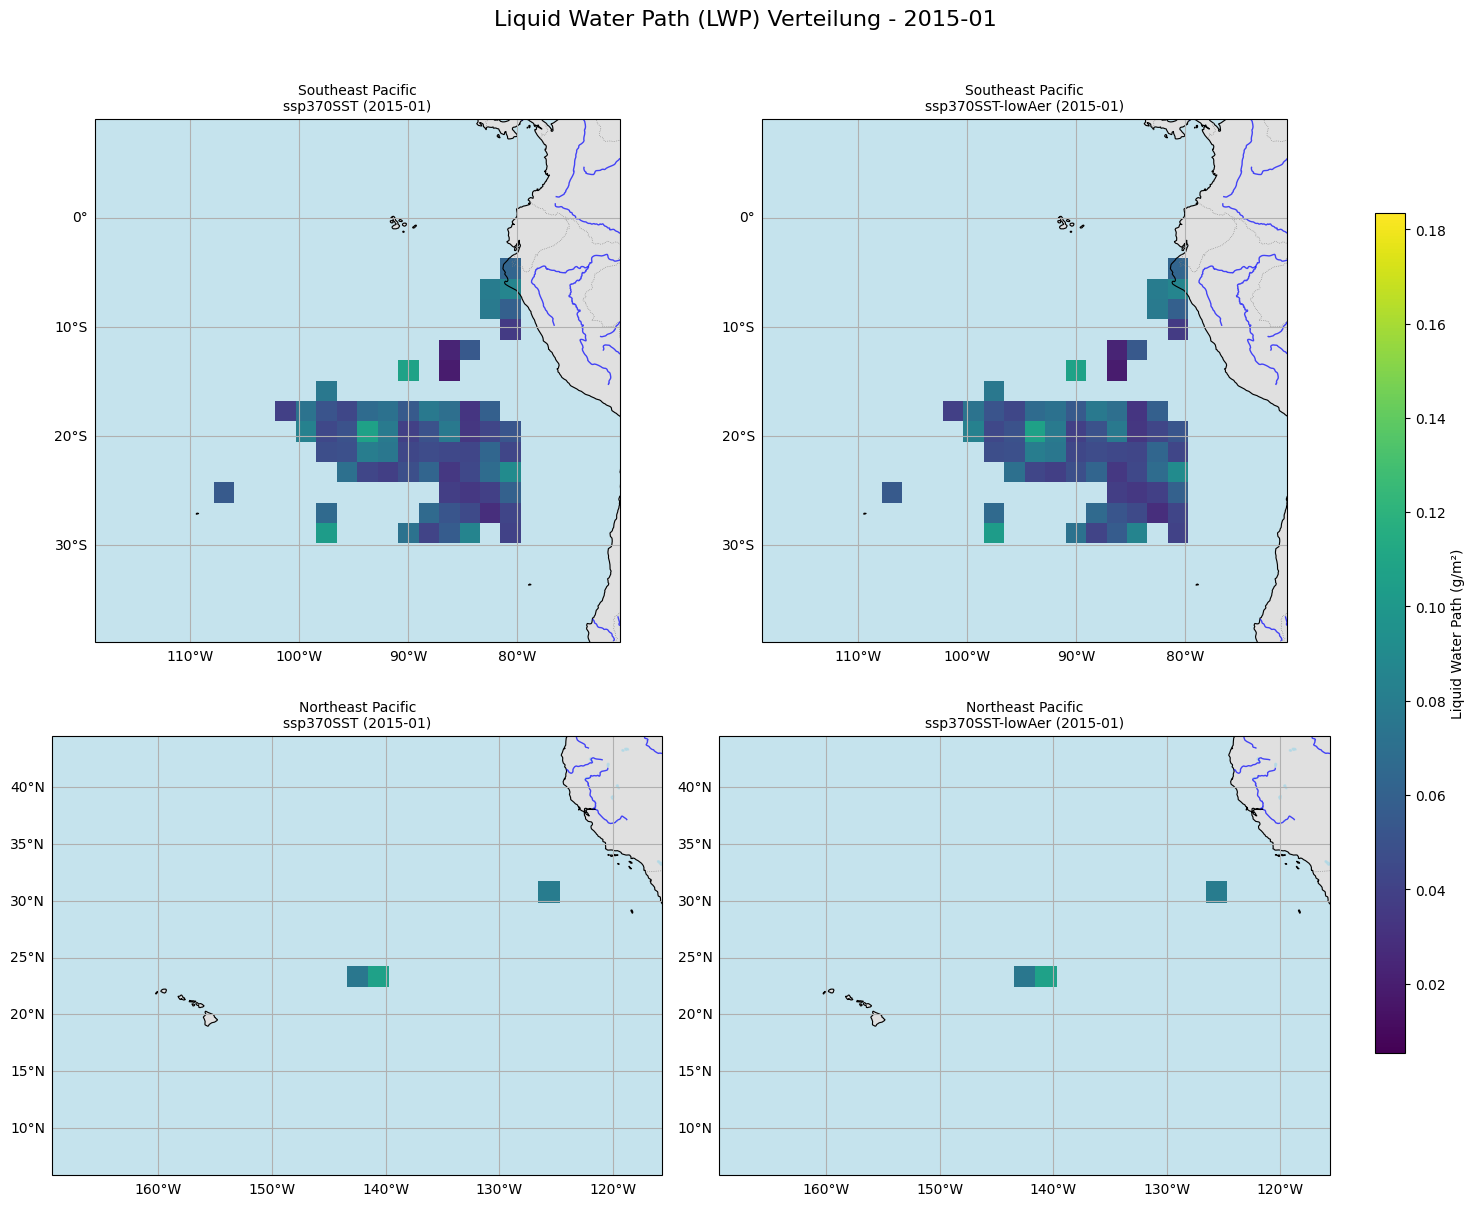


Generiere Plots für den Zeitpunkt: 2015-02
  Plotting LWP für ssp370SST in Southeast Pacific auf Subplot 1...
  Plotting LWP für ssp370SST-lowAer in Southeast Pacific auf Subplot 2...
  Plotting LWP für ssp370SST in Northeast Pacific auf Subplot 3...
  Plotting LWP für ssp370SST-lowAer in Northeast Pacific auf Subplot 4...


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/tmp/ipython-input-22-193775250.py:150: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results

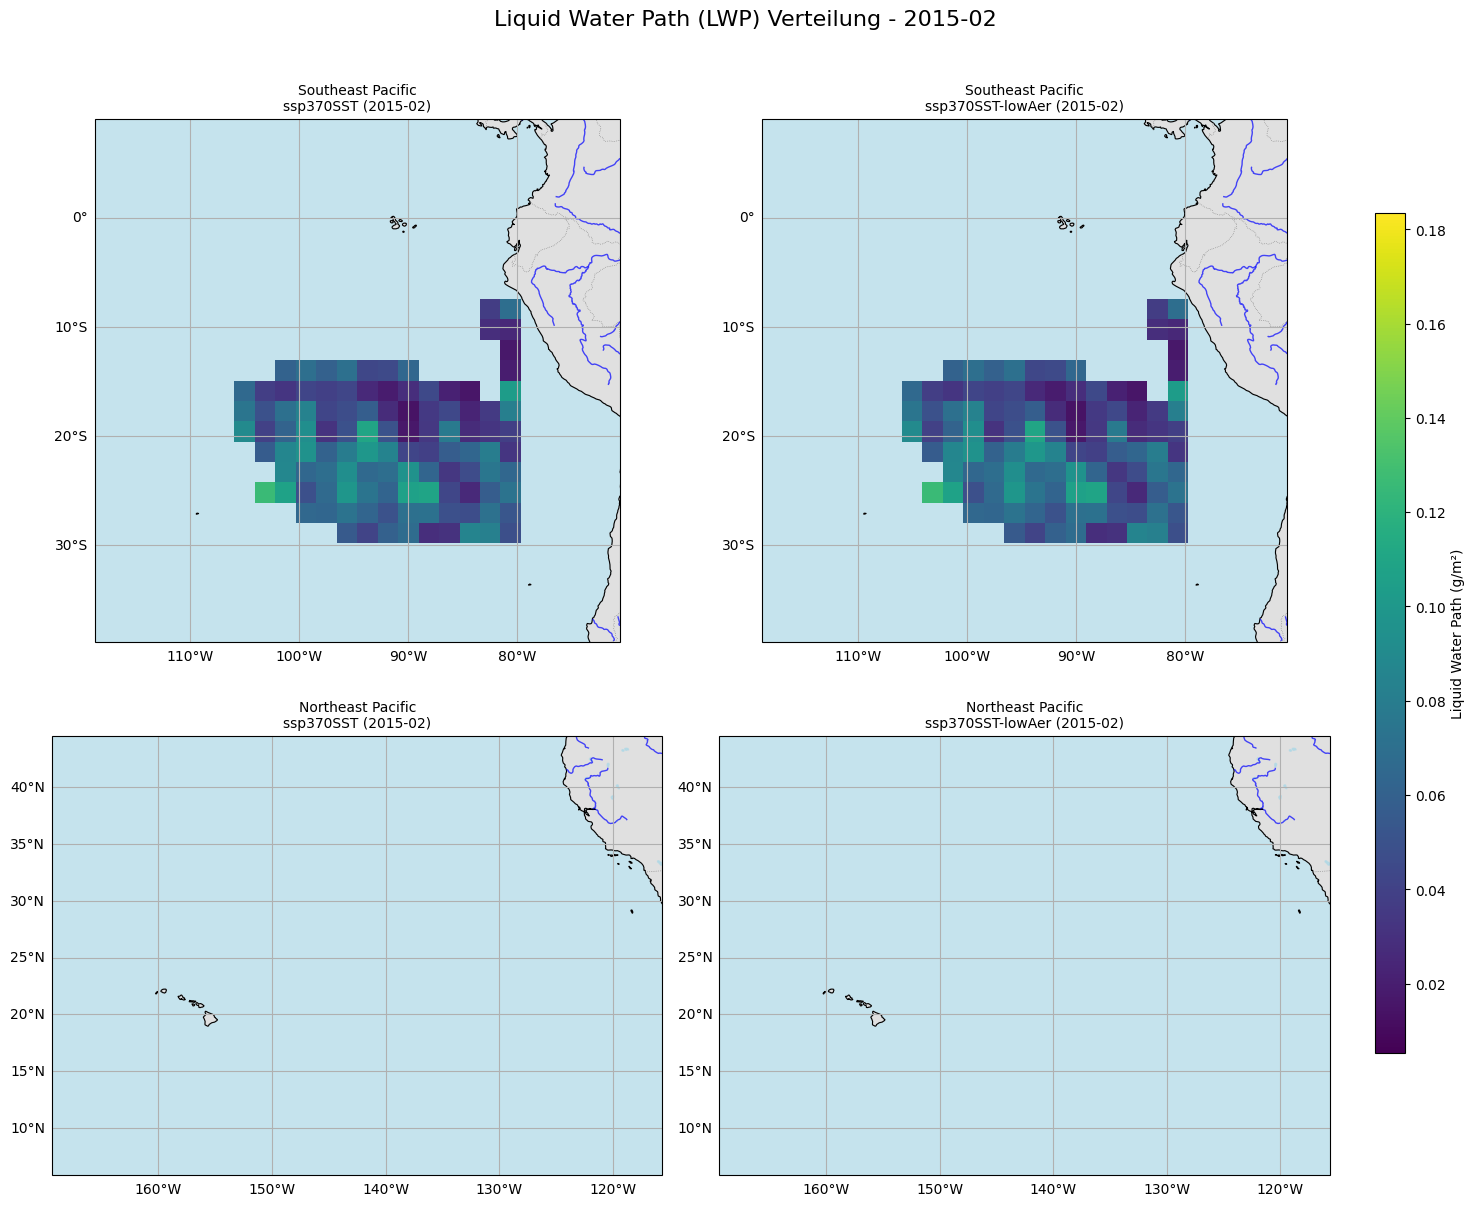


Generiere Plots für den Zeitpunkt: 2040-03
  Plotting LWP für ssp370SST in Southeast Pacific auf Subplot 1...
  Plotting LWP für ssp370SST-lowAer in Southeast Pacific auf Subplot 2...
  Plotting LWP für ssp370SST in Northeast Pacific auf Subplot 3...
  Plotting LWP für ssp370SST-lowAer in Northeast Pacific auf Subplot 4...


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/tmp/ipython-input-22-193775250.py:150: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results

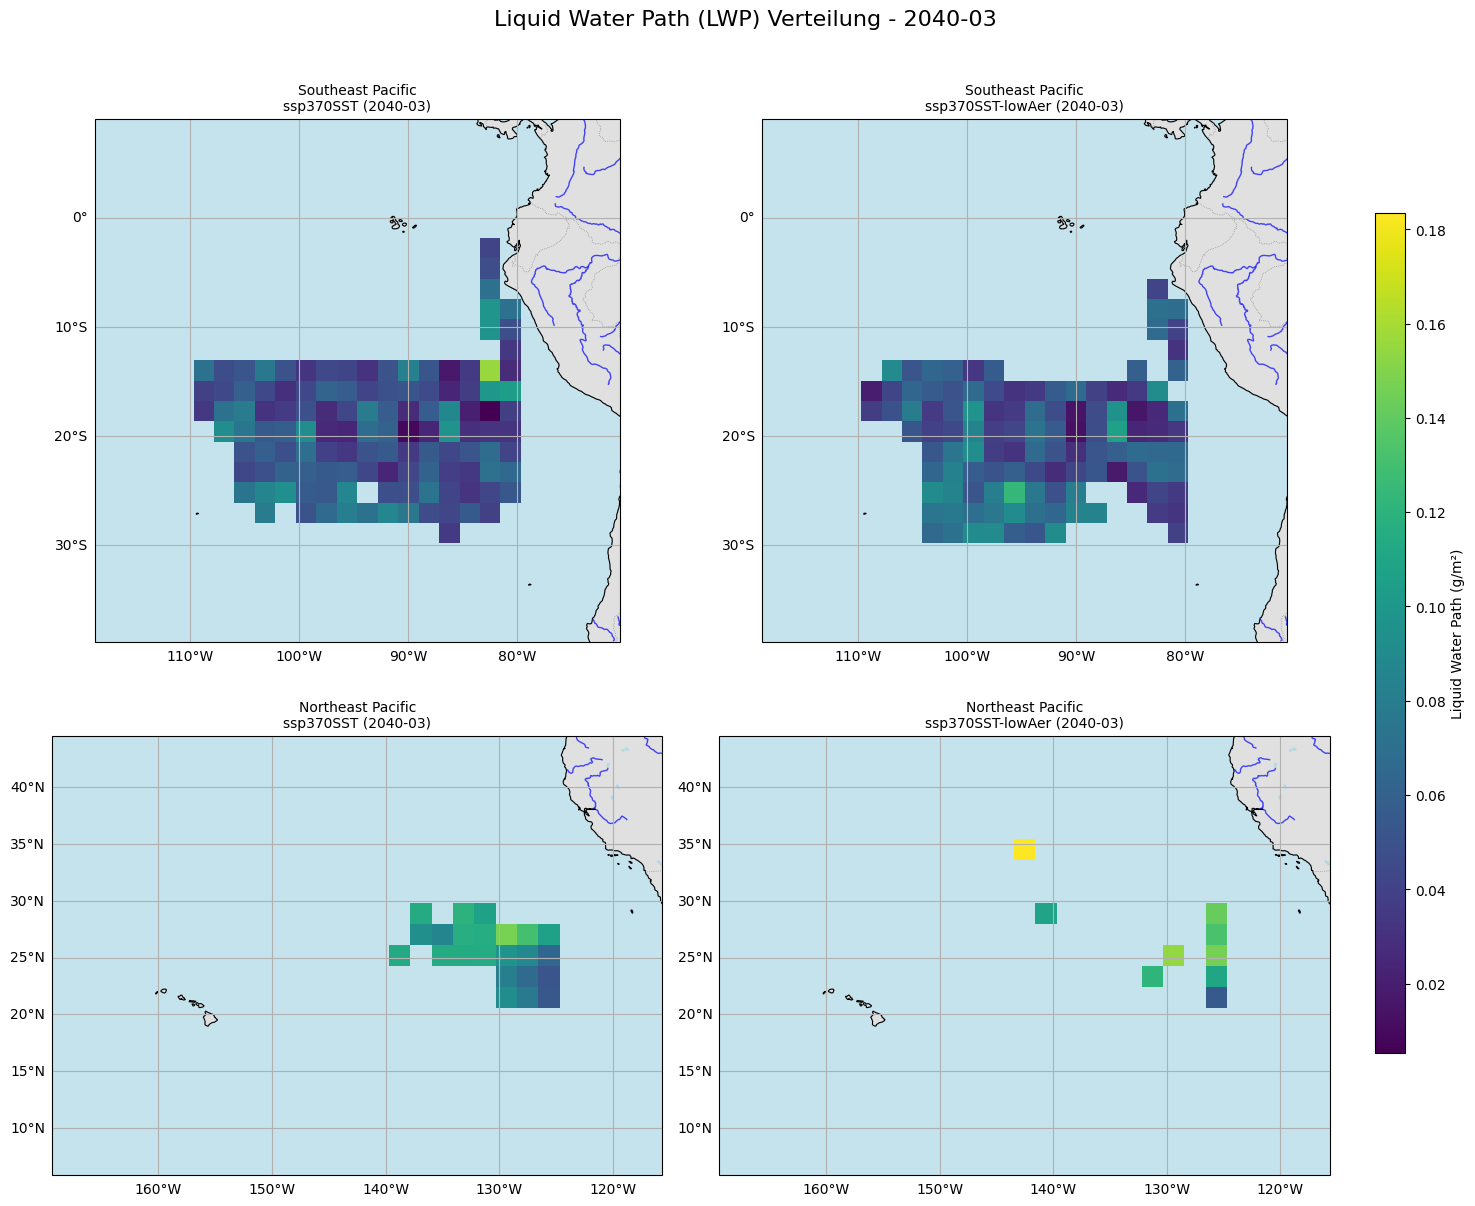


Alle LWP-Karten für die ausgewählten Zeitpunkte wurden generiert.


In [ ]:
# mehr Zeitpunkte und angepasste farbskala #
# --- Plotting-Funktion ---

def plot_lwp_on_map(ax, data_array, region_name, exp_name, time_index=0, vmin=None, vmax=None, zoom_buffer=5):
    """
    Plottet den Liquid Water Path (LWP) für eine bestimmte Region auf einer Karte auf einer gegebenen Achse.
    Verwendet die ursprüngliche Auflösung der Daten und die Festlegung eines gemeinsamen Farbbereichs.
    Ermöglicht das Hinzufügen eines Puffers für den Kartenausschnitt, um "herauszuzoomen".

    Args:
        ax (matplotlib.axes.Axes): Die Achse, auf der geplottet werden soll.
        data_array (xr.DataArray): Das LWP DataArray für die Region (vor der räumlichen Mittelung).
                                   Sollte Dimensionen 'time', 'lat', 'lon' haben.
        region_name (str): Der Name der Region (z.B. 'Southeast Pacific').
        exp_name (str): Der Name des Experiments (z.B. 'ssp370SST').
        time_index (int): Der Index des Zeitpunkts, der geplottet werden soll.
                          Standardmäßig wird der erste Zeitpunkt (Index 0) verwendet.
        vmin (float, optional): Der minimale Wert für die Farbskala. Wenn None, wird er automatisch bestimmt.
        vmax (float, optional): Der maximale Wert für die Farbskala. Wenn None, wird er automatisch bestimmt.
        zoom_buffer (int/float): Gradzahl, um die der Kartenausschnitt über die Region hinaus erweitert wird.
                                 Ein größerer Wert zoomt weiter heraus. Standard ist 5 Grad.
    """
    # Wähle einen spezifischen Zeitpunkt zum Plotten aus den Daten
    lwp_to_plot = data_array.isel(time=time_index)

    # Extrahiere Längen- und Breitengrade der zu plottenden Daten
    lons = lwp_to_plot.lon.values
    lats = lwp_to_plot.lat.values

    # Bestimme den minimalen und maximalen Längen- und Breitengrad für den Kartenausschnitt
    # Füge den zoom_buffer hinzu, um herauszuzoomen
    min_lon_plot = lons.min() - zoom_buffer
    max_lon_plot = lons.max() + zoom_buffer
    min_lat_plot = lats.min() - zoom_buffer
    max_lat_plot = lats.max() + zoom_buffer

    # Füge verschiedene geografische Features zur Karte hinzu, um einen Hintergrund zu schaffen
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8, edgecolor='black') # Küstenlinien
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='gray') # Landesgrenzen
    ax.add_feature(cfeature.OCEAN, color='lightblue', alpha=0.7) # Ozeane
    ax.add_feature(cfeature.LAND, color='lightgray', alpha=0.7) # Landmassen
    ax.add_feature(cfeature.LAKES, color='lightblue', alpha=0.7) # Seen
    ax.add_feature(cfeature.RIVERS, color='blue', alpha=0.7) # Flüsse

    # Setze den sichtbaren Bereich der Karte
    # Cartopy erwartet [lon_min, lon_max, lat_min, lat_max] für set_extent.
    # Das crs=ccrs.PlateCarree() gibt an, dass diese Koordinaten in Längen- und Breitengraden sind.
    ax.set_extent([min_lon_plot, max_lon_plot, min_lat_plot, max_lat_plot], crs=ccrs.PlateCarree())

    # Plotten der LWP-Daten auf der Karte
    # Verwende vmin und vmax für eine gemeinsame Farbskala
    mesh = lwp_to_plot.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                       cmap='viridis', add_colorbar=False,
                                       vmin=vmin, vmax=vmax)

    # Füge Gitterlinien (für Längen- und Breitengrade) und Beschriftungen hinzu
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False # Beschriftungen oben ausblenden
    gl.right_labels = False # Beschriftungen rechts ausblenden

    # Erstelle den Titel des Plots
    title_time = lwp_to_plot.time.dt.strftime("%Y-%m").item()
    ax.set_title(f'{region_name}\n{exp_name} ({title_time})', fontsize=10)

    return mesh # Rückgabe des Mesh-Objekts für die Farbskala


# --- Schleife zum Plotten der LWP-Daten für jede Region und jedes Experiment in einem 2x2 Grid ---
print("\nErstelle Plots für LWP in den definierten Regionen in einem 2x2 Grid...")

# Definieren Sie die Zeitpunkte, die Sie plotten möchten.
# Beispiel: Die ersten drei Zeitpunkte (Indizes 0, 1, 2)
#Index = (Zieljahr - Startjahr) * 12 + (Monatsnummer - 1)
#März 2024: Index = (2040 - 2015) * 12 + (3 - 1)
time_indices_to_plot = [0, 1, 302] # Passen Sie diese Liste nach Bedarf an

# Sammle alle LWP-Daten für die Bestimmung des globalen vmin/vmax über alle ausgewählten Zeitpunkte
all_lwp_data_for_range = []

# Iteriere einmal über alle ausgewählten Zeitpunkte, Regionen und Experimente, um den globalen Bereich zu finden
for t_idx in time_indices_to_plot:
    for region_name, coords in regions.items():
        for exp_name, ds in [('ssp370SST', ds_ssp370SST), ('ssp370SST-lowAer', ds_ssp370SST_lowAer)]:
            lwp_region_data_slice = ds['lwp'].sel(lat=coords['lat_slice'], lon=coords['lon_slice']).isel(time=t_idx)
            all_lwp_data_for_range.append(lwp_region_data_slice)

# Manuelle Anpassung der Farbskala (optional)
# Setzen Sie hier Werte, wenn Sie einen festen Minimum- und Maximumwert wünschen.
# Wenn None, wird der Bereich automatisch aus den Daten bestimmt.
manual_vmin = None # Beispiel: 0
manual_vmax = None # Beispiel: 150

# Bestimme den globalen minimalen und maximalen LWP-Wert über alle gesammelten Daten
if manual_vmin is not None:
    global_vmin = manual_vmin
else:
    global_vmin = min(data.min().compute().item() for data in all_lwp_data_for_range if not np.isnan(data.min().compute().item()))

if manual_vmax is not None:
    global_vmax = manual_vmax
else:
    global_vmax = max(data.max().compute().item() for data in all_lwp_data_for_range if not np.isnan(data.max().compute().item()))

print(f"Globaler LWP-Bereich für Plots: vmin={global_vmin:.2f}, vmax={global_vmax:.2f}")


# Äußere Schleife für die Zeitpunkte
for current_time_index in time_indices_to_plot:
    print(f"\nGeneriere Plots für den Zeitpunkt: {ds_ssp370SST.time.isel(time=current_time_index).dt.strftime('%Y-%m').item()}")

    # Erstelle eine einzige Figur mit 2 Reihen und 2 Spalten von Subplots für jeden Zeitpunkt
    fig, axes = plt.subplots(2, 2, figsize=(15, 12),
                             subplot_kw={'projection': ccrs.PlateCarree()}) # Setze Projektion für alle Subplots

    # Flache das Array der Achsen ab, um einfacher darüber zu iterieren
    axes = axes.flatten()

    # Eine Liste, um die Mesh-Objekte zu speichern, um eine gemeinsame Farbskala zu erstellen
    all_meshes = []

    # Zähler für die Subplots
    plot_idx = 0

    # Iteriere durch die definierten Regionen
    for region_name, coords in regions.items():
        # Iteriere durch die beiden Datensätze (Experimente)
        for exp_name, ds in [('ssp370SST', ds_ssp370SST), ('ssp370SST-lowAer', ds_ssp370SST_lowAer)]:
            print(f"  Plotting LWP für {exp_name} in {region_name} auf Subplot {plot_idx + 1}...")
            # Schneide die LWP-Daten für die aktuelle Region aus dem vollständigen Datensatz aus.
            lwp_region_data = ds['lwp'].sel(lat=coords['lat_slice'], lon=coords['lon_slice'])

            # Rufe die Plotting-Funktion auf, um die Karte auf dem aktuellen Subplot zu generieren.
            # Übergeben Sie den aktuellen Zeitindex und die globalen vmin und vmax.
            current_mesh = plot_lwp_on_map(axes[plot_idx], lwp_region_data, region_name, exp_name,
                                           time_index=current_time_index,
                                           vmin=global_vmin, vmax=global_vmax,
                                           zoom_buffer=10) # Hier können Sie den Wert anpassen
            all_meshes.append(current_mesh)
            plot_idx += 1

    # Füge eine gemeinsame Farbskala für alle Plots in dieser Figur hinzu
    if all_meshes:
        cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) # [left, bottom, width, height]
        cbar = fig.colorbar(all_meshes[0], cax=cbar_ax, orientation='vertical')
        cbar.set_label('Liquid Water Path (g/m²)')

    # Haupttitel für die aktuelle Zeit
    current_time_str = ds_ssp370SST.time.isel(time=current_time_index).dt.strftime("%Y-%m").item()
    plt.suptitle(f'Liquid Water Path (LWP) Verteilung - {current_time_str}', fontsize=16, y=1.02)
    plt.tight_layout(rect=[0, 0, 0.9, 1]) # Passt das Layout an, um Platz für die Farbskala zu lassen
    plt.show()

print("\nAlle LWP-Karten für die ausgewählten Zeitpunkte wurden generiert.")


Berechne saisonale Mittelwerte des LWP und erstelle Plots in einem 2x2 Grid pro Jahreszeit...
Globaler LWP-Bereich für Plots (saisonaler Mittelwert): vmin=0.02, vmax=0.42

Generiere Plots für die Jahreszeit: Winter (DJF)
  Plotting saisonalen Mittelwert LWP für ssp370SST in Southeast Pacific auf Subplot 1...


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


  Plotting saisonalen Mittelwert LWP für ssp370SST-lowAer in Southeast Pacific auf Subplot 2...


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


  Plotting saisonalen Mittelwert LWP für ssp370SST in Northeast Pacific auf Subplot 3...


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


  Plotting saisonalen Mittelwert LWP für ssp370SST-lowAer in Northeast Pacific auf Subplot 4...


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/tmp/ipython-input-23-4284979657.py:178: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1]) # Passt das Layout an, um Platz für die Farbskala zu lassen


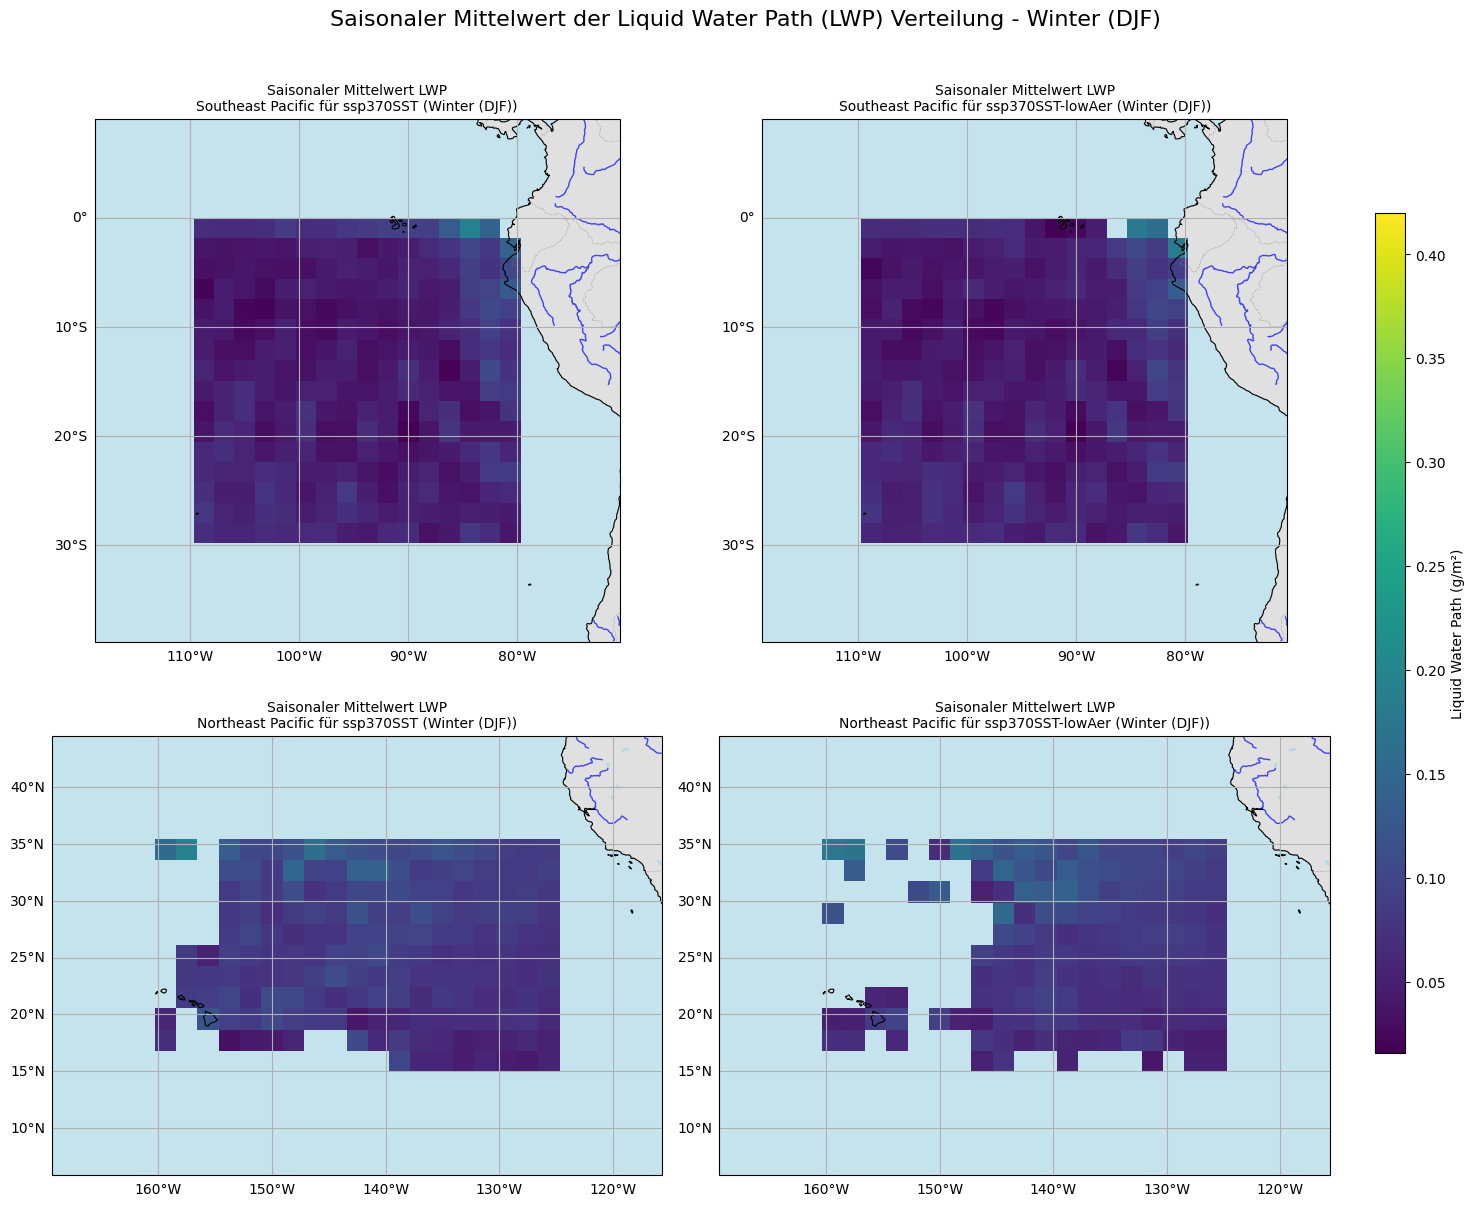


Generiere Plots für die Jahreszeit: Frühling (MAM)
  Plotting saisonalen Mittelwert LWP für ssp370SST in Southeast Pacific auf Subplot 1...


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


  Plotting saisonalen Mittelwert LWP für ssp370SST-lowAer in Southeast Pacific auf Subplot 2...


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


  Plotting saisonalen Mittelwert LWP für ssp370SST in Northeast Pacific auf Subplot 3...


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


  Plotting saisonalen Mittelwert LWP für ssp370SST-lowAer in Northeast Pacific auf Subplot 4...


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/tmp/ipython-input-23-4284979657.py:178: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1]) # Passt das Layout an, um Platz für die Farbskala zu lassen


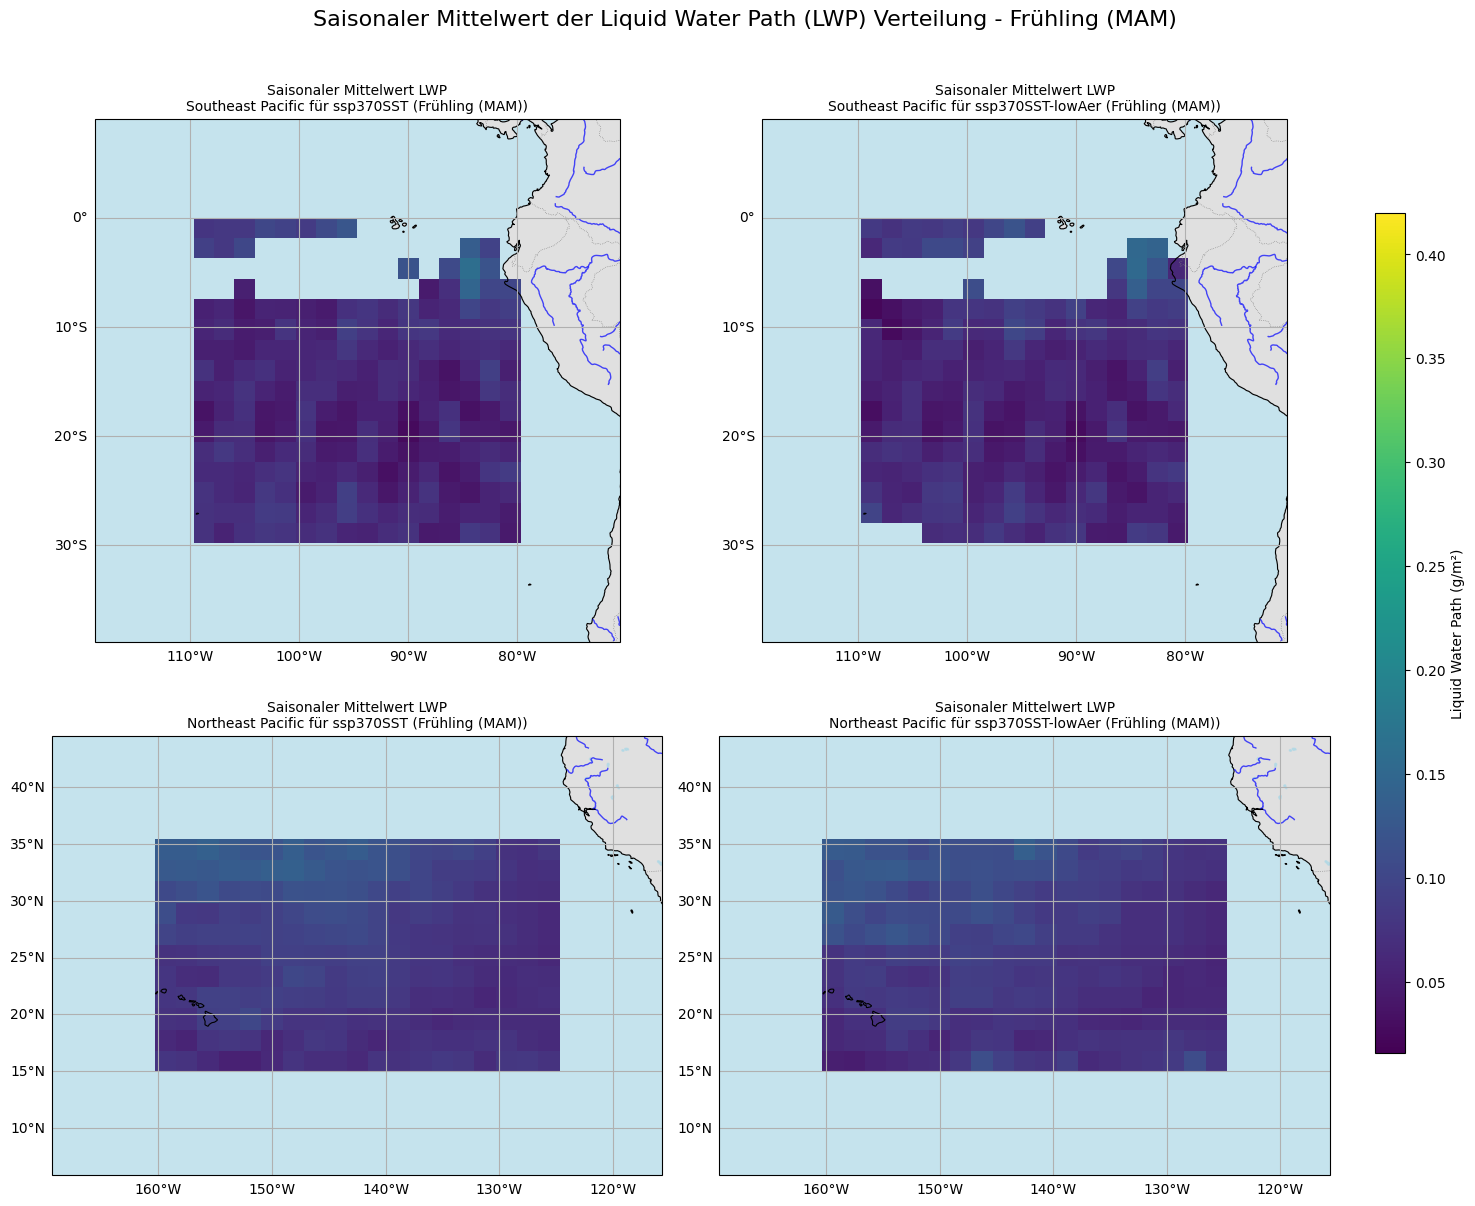


Generiere Plots für die Jahreszeit: Sommer (JJA)
  Plotting saisonalen Mittelwert LWP für ssp370SST in Southeast Pacific auf Subplot 1...


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


  Plotting saisonalen Mittelwert LWP für ssp370SST-lowAer in Southeast Pacific auf Subplot 2...


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


  Plotting saisonalen Mittelwert LWP für ssp370SST in Northeast Pacific auf Subplot 3...


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


  Plotting saisonalen Mittelwert LWP für ssp370SST-lowAer in Northeast Pacific auf Subplot 4...


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/tmp/ipython-input-23-4284979657.py:178: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1]) # Passt das Layout an, um Platz für die Farbskala zu lassen


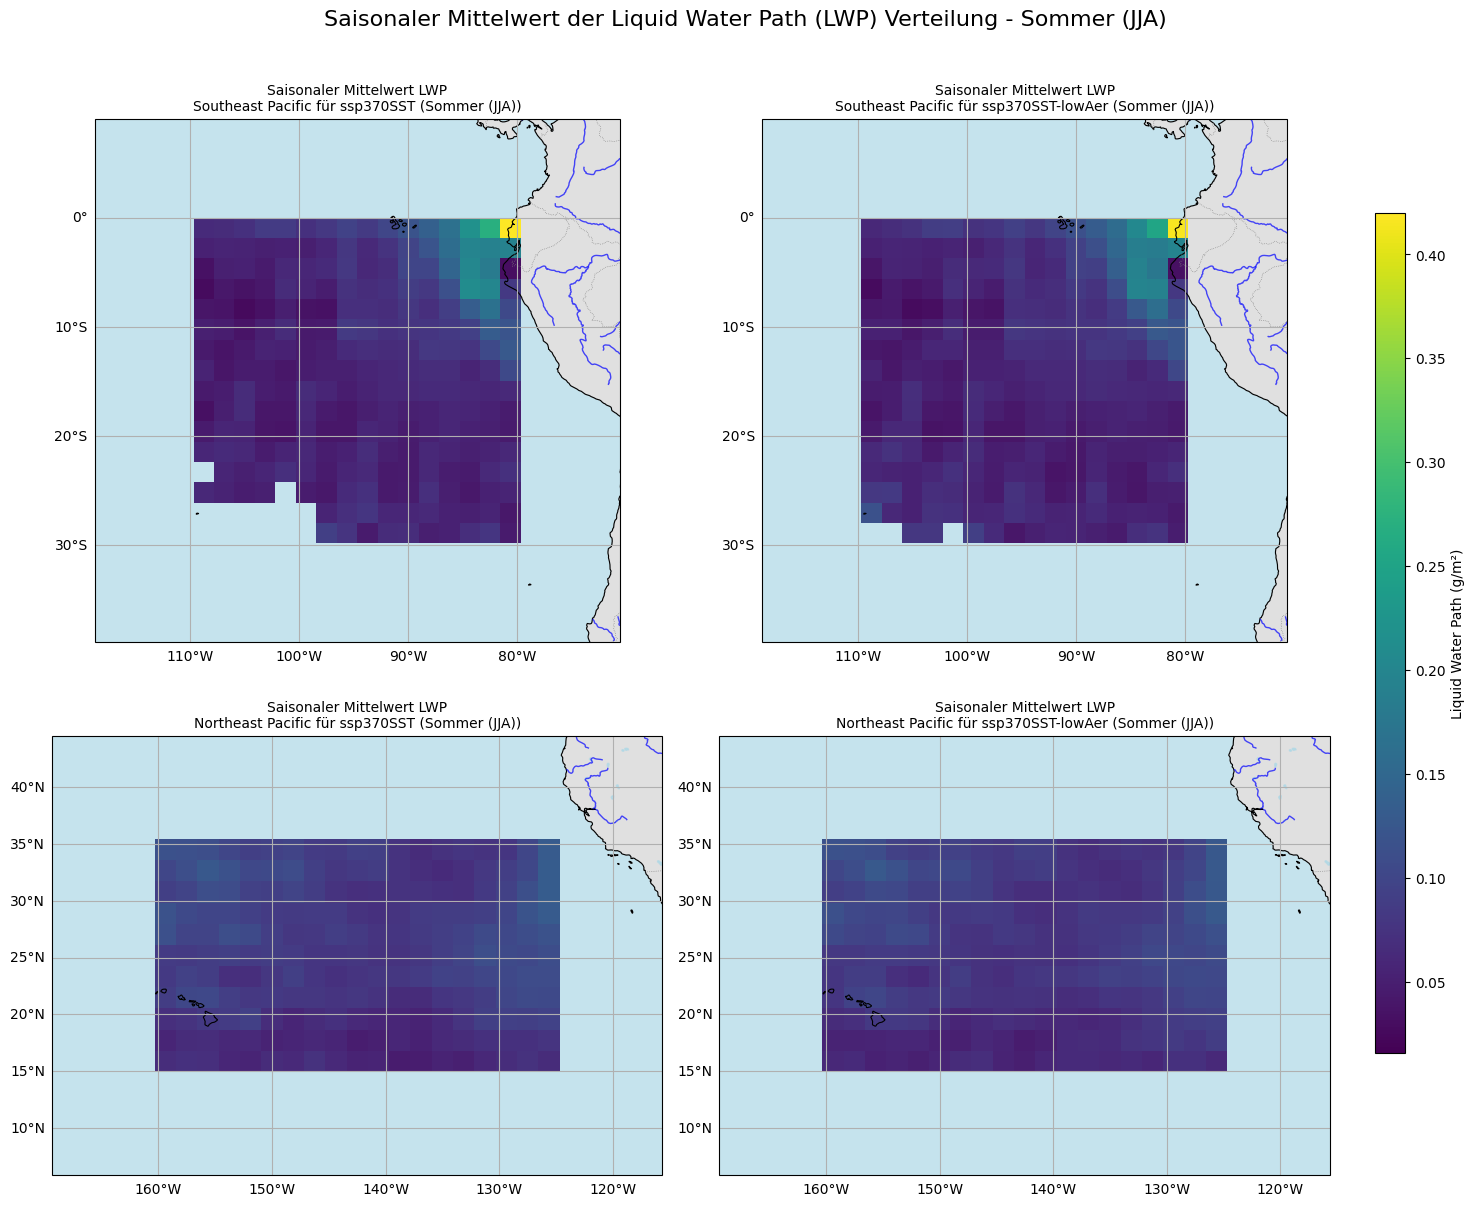


Generiere Plots für die Jahreszeit: Herbst (SON)
  Plotting saisonalen Mittelwert LWP für ssp370SST in Southeast Pacific auf Subplot 1...


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


  Plotting saisonalen Mittelwert LWP für ssp370SST-lowAer in Southeast Pacific auf Subplot 2...


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


  Plotting saisonalen Mittelwert LWP für ssp370SST in Northeast Pacific auf Subplot 3...


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


  Plotting saisonalen Mittelwert LWP für ssp370SST-lowAer in Northeast Pacific auf Subplot 4...


/usr/local/lib/python3.11/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/tmp/ipython-input-23-4284979657.py:178: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1]) # Passt das Layout an, um Platz für die Farbskala zu lassen


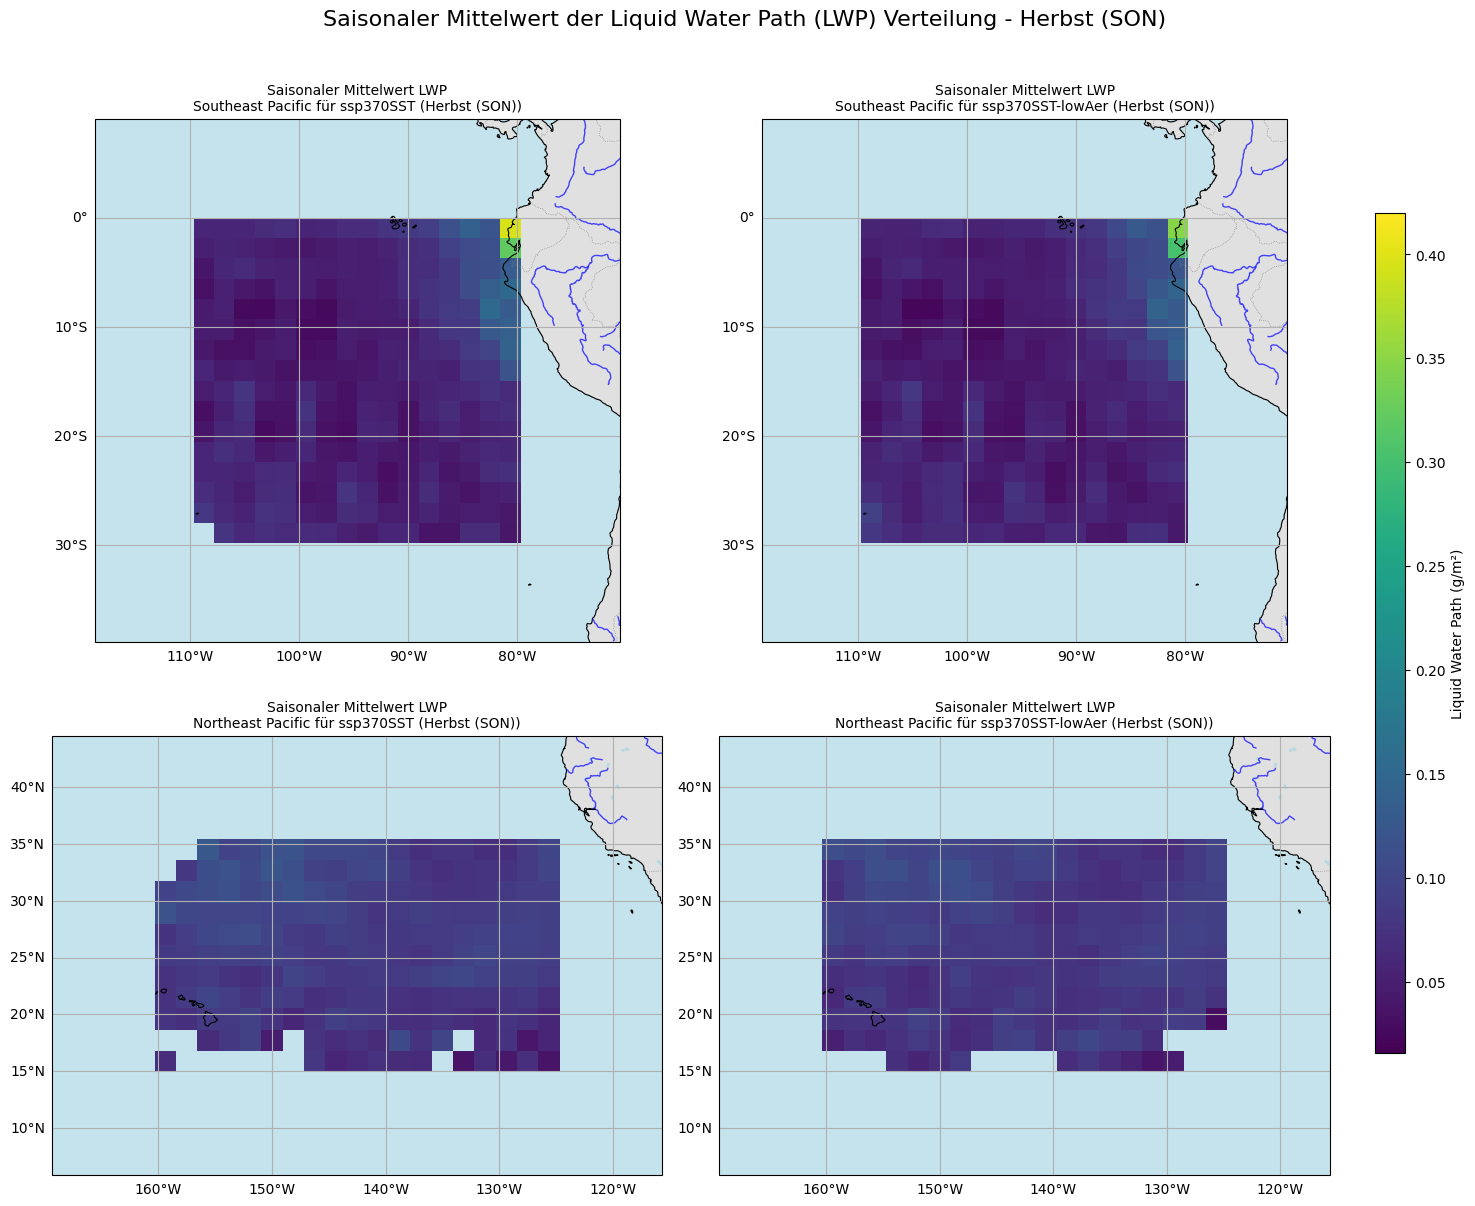


Alle LWP-Karten der saisonalen Mittelwerte wurden generiert.


In [ ]:
# zeitlich aufsummieren, also Mittelwert bilden
# separat für 4 jahreszeiten
# --- Plotting-Funktion ---
def plot_lwp_on_map(ax, data_array, region_name, exp_name, vmin=None, vmax=None, zoom_buffer=5, season_name=""):
    """
    Plottet den Liquid Water Path (LWP) für eine bestimmte Region auf einer Karte auf einer gegebenen Achse.
    Verwendet die ursprüngliche Auflösung der Daten und die Festlegung eines gemeinsamen Farbbereichs.
    Ermöglicht das Hinzufügen eines Puffers für den Kartenausschnitt, um "herauszuzoomen".

    Args:
        ax (matplotlib.axes.Axes): Die Achse, auf der geplottet werden soll.
        data_array (xr.DataArray): Das LWP DataArray für die Region (bereits zeitlich gemittelt).
                                   Sollte Dimensionen 'lat', 'lon' haben.
        region_name (str): Der Name der Region (z.B. 'Southeast Pacific').
        exp_name (str): Der Name des Experiments (z.B. 'ssp370SST').
        vmin (float, optional): Der minimale Wert für die Farbskala. Wenn None, wird er automatisch bestimmt.
        vmax (float, optional): Der maximale Wert für die Farbskala. Wenn None, wird er automatisch bestimmt.
        zoom_buffer (int/float): Gradzahl, um die der Kartenausschnitt über die Region hinaus erweitert wird.
                                 Ein größerer Wert zoomt weiter heraus. Standard ist 5 Grad.
        season_name (str): Der Name der Jahreszeit, der im Titel angezeigt werden soll.
    """
    # data_array ist hier bereits der zeitliche Mittelwert, hat also keine Zeitdimension mehr
    lwp_to_plot = data_array

    # Extrahiere Längen- und Breitengrade der zu plottenden Daten
    lons = lwp_to_plot.lon.values
    lats = lwp_to_plot.lat.values

    # Bestimme den minimalen und maximalen Längen- und Breitengrad für den Kartenausschnitt
    # Füge den zoom_buffer hinzu, um herauszuzoomen
    min_lon_plot = lons.min() - zoom_buffer
    max_lon_plot = lons.max() + zoom_buffer
    min_lat_plot = lats.min() - zoom_buffer
    max_lat_plot = lats.max() + zoom_buffer

    # Füge verschiedene geografische Features zur Karte hinzu, um einen Hintergrund zu schaffen
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8, edgecolor='black') # Küstenlinien
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='gray') # Landesgrenzen
    ax.add_feature(cfeature.OCEAN, color='lightblue', alpha=0.7) # Ozeane
    ax.add_feature(cfeature.LAND, color='lightgray', alpha=0.7) # Landmassen
    ax.add_feature(cfeature.LAKES, color='lightblue', alpha=0.7) # Seen
    ax.add_feature(cfeature.RIVERS, color='blue', alpha=0.7) # Flüsse

    # Setze den sichtbaren Bereich der Karte
    # Cartopy erwartet [lon_min, lon_max, lat_min, lat_max] für set_extent.
    # Das crs=ccrs.PlateCarree() gibt an, dass diese Koordinaten in Längen- und Breitengraden sind.
    ax.set_extent([min_lon_plot, max_lon_plot, min_lat_plot, max_lat_plot], crs=ccrs.PlateCarree())

    # Plotten der LWP-Daten auf der Karte
    # Verwende vmin und vmax für eine gemeinsame Farbskala
    mesh = lwp_to_plot.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                       cmap='viridis', add_colorbar=False,
                                       vmin=vmin, vmax=vmax)

    # Füge Gitterlinien (für Längen- und Breitengrade) und Beschriftungen hinzu
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False # Beschriftungen oben ausblenden
    gl.right_labels = False # Beschriftungen rechts ausblenden

    # Erstelle den Titel des Plots
    # Der Titel zeigt nun an, dass es sich um einen saisonalen Mittelwert handelt
    title_text = f'Saisonaler Mittelwert LWP\n{region_name} für {exp_name}'
    if season_name:
        title_text += f' ({season_name})'
    ax.set_title(title_text, fontsize=10)

    return mesh # Rückgabe des Mesh-Objekts für die Farbskala


# --- Definition der Jahreszeiten ---
seasons = {
    'Winter (DJF)': [12, 1, 2],  # Dezember, Januar, Februar
    'Frühling (MAM)': [3, 4, 5],   # März, April, Mai
    'Sommer (JJA)': [6, 7, 8],    # Juni, Juli, August
    'Herbst (SON)': [9, 10, 11]    # September, Oktober, November
}

# --- Berechnung der saisonalen Mittelwerte und Plotting in einem 2x2 Grid pro Jahreszeit ---
print("\nBerechne saisonale Mittelwerte des LWP und erstelle Plots in einem 2x2 Grid pro Jahreszeit...")

# Sammle alle saisonal gemittelten LWP-Daten für die Bestimmung des globalen vmin/vmax
all_seasonal_lwp_data_for_range = []

# Iteriere einmal über alle Jahreszeiten, Regionen und Experimente, um die saisonalen Mittelwerte zu berechnen
# und den globalen Bereich zu finden
for season_name, months in seasons.items():
    for region_name, coords in regions.items():
        for exp_name, ds in [('ssp370SST', ds_ssp370SST), ('ssp370SST-lowAer', ds_ssp370SST_lowAer)]:
            # Schneide die LWP-Daten für die aktuelle Region aus dem vollständigen Datensatz aus.
            # Filtere nach Monaten und berechne dann den zeitlichen Mittelwert über die 'time'-Dimension.
            # Sicherstellen, dass die Zeitdimension vorhanden ist, bevor groupby aufgerufen wird
            if 'time' in ds['lwp'].dims:
                lwp_region_data_season_mean = ds['lwp'].sel(lat=coords['lat_slice'], lon=coords['lon_slice']).isel(time=ds['lwp'].time.dt.month.isin(months)).mean(dim='time', skipna=True)
                all_seasonal_lwp_data_for_range.append(lwp_region_data_season_mean)
            else:
                print(f"Warnung: Zeitdimension nicht gefunden in {exp_name} für {region_name}. Überspringe saisonale Mittelwertbildung.")


# Manuelle Anpassung der Farbskala (optional)
# Setzen Sie hier Werte, wenn Sie einen festen Minimum- und Maximumwert wünschen.
# Wenn None, wird der Bereich automatisch aus den Daten bestimmt.
manual_vmin = None # Beispiel: 0
manual_vmax = None # Beispiel: 150

# Bestimme den globalen minimalen und maximalen LWP-Wert über alle gesammelten saisonalen Daten
if all_seasonal_lwp_data_for_range: # Nur berechnen, wenn Daten gesammelt wurden
    if manual_vmin is not None:
        global_vmin = manual_vmin
    else:
        global_vmin = min(data.min().compute().item() for data in all_seasonal_lwp_data_for_range if not np.isnan(data.min().compute().item()))

    if manual_vmax is not None:
        global_vmax = manual_vmax
    else:
        global_vmax = max(data.max().compute().item() for data in all_seasonal_lwp_data_for_range if not np.isnan(data.max().compute().item()))
    print(f"Globaler LWP-Bereich für Plots (saisonaler Mittelwert): vmin={global_vmin:.2f}, vmax={global_vmax:.2f}")
else:
    print("Keine Daten für die Farbskala-Berechnung gesammelt. Farbskala wird automatisch pro Plot gesetzt.")
    global_vmin = None
    global_vmax = None


# Äußere Schleife für die Jahreszeiten
for season_name, months in seasons.items():
    print(f"\nGeneriere Plots für die Jahreszeit: {season_name}")

    # Erstelle eine einzige Figur mit 2 Reihen und 2 Spalten von Subplots für jede Jahreszeit
    fig, axes = plt.subplots(2, 2, figsize=(15, 12),
                             subplot_kw={'projection': ccrs.PlateCarree()}) # Setze Projektion für alle Subplots

    # Flache das Array der Achsen ab, um einfacher darüber zu iterieren
    axes = axes.flatten()

    # Eine Liste, um die Mesh-Objekte zu speichern, um eine gemeinsame Farbskala zu erstellen
    all_meshes = []

    # Zähler für die Subplots
    plot_idx = 0

    # Iteriere durch die definierten Regionen
    for region_name, coords in regions.items():
        # Iteriere durch die beiden Datensätze (Experimente)
        for exp_name, ds in [('ssp370SST', ds_ssp370SST), ('ssp370SST-lowAer', ds_ssp370SST_lowAer)]:
            print(f"  Plotting saisonalen Mittelwert LWP für {exp_name} in {region_name} auf Subplot {plot_idx + 1}...")
            # Schneide die LWP-Daten für die aktuelle Region aus dem vollständigen Datensatz aus
            # und berechne den saisonalen Mittelwert.
            # Sicherstellen, dass die Zeitdimension vorhanden ist, bevor groupby aufgerufen wird
            if 'time' in ds['lwp'].dims:
                lwp_region_data_season_mean = ds['lwp'].sel(lat=coords['lat_slice'], lon=coords['lon_slice']).isel(time=ds['lwp'].time.dt.month.isin(months)).mean(dim='time', skipna=True)
            else:
                print(f"Fehler: Zeitdimension nicht gefunden in {exp_name} für {region_name}. Kann saisonalen Mittelwert nicht berechnen.")
                # Wenn keine Zeitdimension vorhanden ist, kann hier ein Platzhalter oder eine Fehlermeldung eingefügt werden.
                # Für diese Demonstration wird der Plot übersprungen, wenn keine Zeitdimension vorhanden ist.
                plot_idx += 1
                continue

            # Rufe die Plotting-Funktion auf, um die Karte auf dem aktuellen Subplot zu generieren.
            current_mesh = plot_lwp_on_map(axes[plot_idx], lwp_region_data_season_mean, region_name, exp_name,
                                           vmin=global_vmin, vmax=global_vmax,
                                           zoom_buffer=10, season_name=season_name) # Jahreszeit im Titel
            all_meshes.append(current_mesh)
            plot_idx += 1

    # Füge eine gemeinsame Farbskala für alle Plots in dieser Figur hinzu
    if all_meshes and global_vmin is not None and global_vmax is not None:
        cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) # [left, bottom, width, height]
        cbar = fig.colorbar(all_meshes[0], cax=cbar_ax, orientation='vertical')
        cbar.set_label('Liquid Water Path (g/m²)')
    elif all_meshes:
        print("Hinweis: Keine globalen vmin/vmax Werte gesetzt oder berechnet. Farbskala könnte variieren.")
        # Fallback für Farbskala, wenn keine globalen Werte verfügbar sind
        cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
        cbar = fig.colorbar(all_meshes[0], cax=cbar_ax, orientation='vertical')
        cbar.set_label('Liquid Water Path (g/m²)')


    plt.suptitle(f'Saisonaler Mittelwert der Liquid Water Path (LWP) Verteilung - {season_name}', fontsize=16, y=1.02)
    plt.tight_layout(rect=[0, 0, 0.9, 1]) # Passt das Layout an, um Platz für die Farbskala zu lassen
    plt.show()

print("\nAlle LWP-Karten der saisonalen Mittelwerte wurden generiert.")



In [ ]:
# --- Zelle 24: Residuenanalyse ---
# Diese Zelle durchläuft die zuvor erstellte Liste 'all_results'
# und erstellt für jede Analyse Residuen-Plots.

if 'all_results' in locals() and all_results:
    print("--- Erstelle Plots für die Residuenanalyse ---")

    # Die Funktion wird hier definiert, damit die Zelle unabhängig ist.
    def plot_residuals(results):
        """
        Führt eine Residuenanalyse durch und plottet die Ergebnisse.
        """
        # Berechne die vorhergesagten Werte und die Residuen aus den gespeicherten Ergebnissen
        predicted_lwp = results['slope'] * results['ccn_data_log10'] + results['intercept']
        residuals = results['lwp_data'] - predicted_lwp

        scenario_name = results['scenario']
        region_name = results['region']

        print(f"\n--- Residuen-Analyse für {region_name} ({scenario_name}) ---")
        print(f"Mittelwert der Residuen: {residuals.mean():.2e}") # Sollte nahe Null sein

        # Erstelle die Plots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

        # Plot 1: Residuen vs. Vorhergesagter LWP (zur Prüfung auf Homoskedastizität)
        # Suchen Sie nach einer zufälligen Punktwolke um y=0 ohne erkennbares Muster.
        sns.scatterplot(x=predicted_lwp, y=residuals, alpha=0.5, ax=ax1)
        ax1.axhline(0, color='red', linestyle='--')
        ax1.set_title(f'Residuen vs. Vorhergesagter LWP\n{region_name} - {scenario_name}', fontsize=14)
        ax1.set_xlabel('Vorhergesagter LWP [kg m⁻²]', fontsize=12)
        ax1.set_ylabel('Residuen', fontsize=12)

        # Plot 2: Histogramm der Residuen (zur Prüfung auf Normalverteilung)
        # Suchen Sie nach einer glockenförmigen Verteilung.
        sns.histplot(residuals, kde=True, ax=ax2)
        ax2.set_title(f'Verteilung der Residuen\n{region_name} - {scenario_name}', fontsize=14)
        ax2.set_xlabel('Residuen', fontsize=12)
        ax2.set_ylabel('Häufigkeit', fontsize=12)

        plt.tight_layout()
        plt.show()

    # Führe die Plot-Funktion für jedes Ergebnis in der Liste aus
    for result_item in all_results:
        plot_residuals(result_item)

else:
    print("FEHLER: Die Liste 'all_results' wurde nicht gefunden oder ist leer.")
    print("Bitte stellen Sie sicher, dass alle vorherigen Zellen (insbesondere 17-20) erfolgreich ausgeführt wurden.")

FEHLER: Die Liste 'all_results' wurde nicht gefunden oder ist leer.
Bitte stellen Sie sicher, dass alle vorherigen Zellen (insbesondere 17-20) erfolgreich ausgeführt wurden.
